Introduzione

Nella sola Italia, nel periodo che va 1° Gennaio 1998 al 31 Dicembre 2017, secondo uno studio condotto dall'ISS (https://www.epicentro.iss.it/ben/2019/aprile/epidemiologia-intossicazione-funghi), circa 18500 persone si sono rivolte a un centro antiveleni per dei casi clinici. 

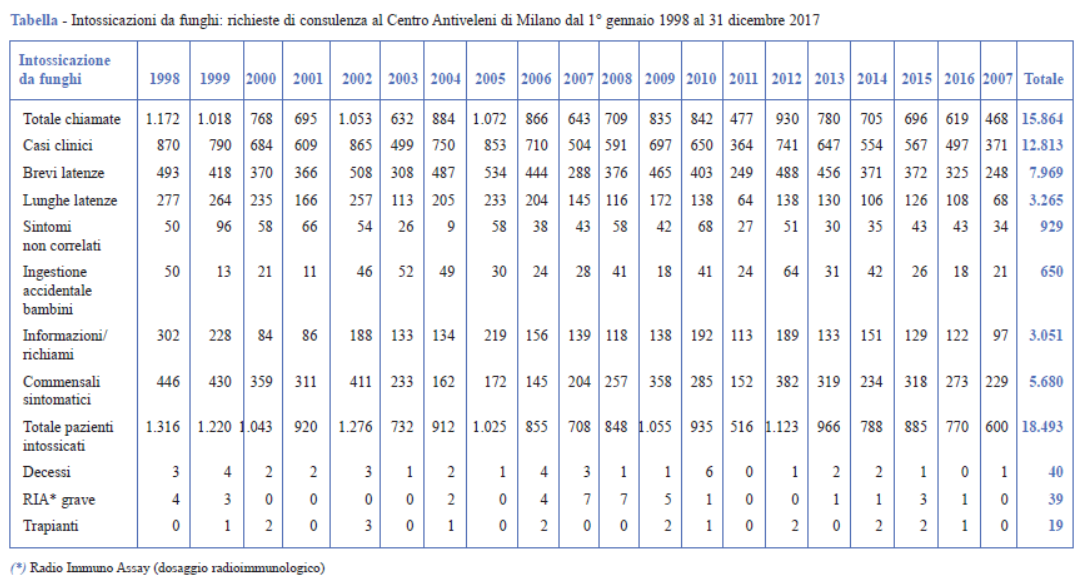

Di queste, fortunatamente la maggior parte sviluppa sintomi lievi come vomito, diarrea o grave disidratazione, anche se, nello stesso periodo, hanno sviluppato sintomi gravi circa 100 individui (di essi, 40 sono deceduti e 19 hanno avuto bisogno di un trapianto di organi).
La maggior parte (85%) delle persone che si sono rivolte ai centri antiveleni hanno riferito di essere entrate aver consumato delle specie di funghi spontanee raccolte nei giorni precedenti.

Per questo motivo, il caso di studio si propone di classificare i funghi in base alle caratteristiche fisiche, partendo da un dataset etichettato che presenta 8124 specie di funghi. Su questo verranno applicati un insieme di algoritmi di classificazione supervisionata, che dovranno essere capaci di etichettare al meglio i funghi, partendo dai valori assunti dalle diverse features.

1. Operazioni preliminari e importazione del dataset mushrooms.

In [543]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Importo il dataset all'interno di pandas
df = pd.read_csv('C:/Users/matte/dataset/mushroom/mushrooms.csv') 
#Settiamo pandas in modo che possano essere visualizzati tutti gli attributi del dataset
pd.set_option("display.max_columns",23)
df


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l


Il Dataframe corrente è formato da 8124 specie di funghi differenti, ognuno è caratterizzato da 22 attributi che riguardano cappuccio, gambo, ecc.
Il dataframe presenta un attributo target che sarebbe la class, ovvero classificato come velenoso o non velenoso

Elenchiamo tutti e 23 gli attributi del dataset

In [544]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Descrizione degli attributi
 
 0    class                     è l'attributo target, e può assumere valori:
                                e='edible' (commestibile) e p='poisonous' (velenoso)
                                
 1   cap-shape                  può assumere i valori:
                                bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s

 2   cap-surface                può assumere i valori:
                                fibrous=f, grooves=g, scaly=y, smooth=s

 3   cap-color                  può assumere i valori:
                                brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y

 4   bruises                    può assumere i valori:
                                bruises=t, no=f

 5   odor                       può assumere i valori:
                                almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s

 6   gill-attachment            può assumere i valori:
                                attached=a, descending=d, free=f, notched=n

 7   gill-spacing               può assumere i valori:
                                close=c, crowded=w, distant=d

 8   gill-size                  può assumere i valori:
                                broad=b, narrow=n

 9   gill-color                 può assumere i valori:
                                black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y

 10  stalk-shape                può assumere i valori:
                                enlarging=e, tapering=t

 11  stalk-root                 può assumere i valori:
                                bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?

 12  stalk-surface-above-ring   può assumere i valori:
                                fibrous=f, scaly=y, silky=k, smooth=s

 13  stalk-surface-below-ring   può assumere i valori:
                                fibrous=f, scaly=y, silky=k, smooth=s

 14  stalk-color-above-ring     può assumere i valori:
                                brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

 15  stalk-color-below-ring     può assumere i valori:
                                brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y

 16  veil-type                  può assumere i valori:
                                partial=p, universal=u

 17  veil-color                 può assumere i valori:
                                brown=n, orange=o, white=w, yellow=y

 18  ring-number                può assumere i valori:
                                none=n, one=o, two=t

 19  ring-type                  può assumere i valori:
                                cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z

 20  spore-print-color          può assumere i valori:
                                black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y

 21  population                 può assumere i valori:
                                abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
                                
 22  habitat                    può assumere i valori:
                                grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

2. Pre-Processing dei dati

Come prima cosa effettuiamo una pulizia dei dati presenti nel dataframe. Verifichiamo quindi che non siano presenti dei valori null all'interno del dataset.

In [545]:
df.isna().value_counts()

class  cap-shape  cap-surface  cap-color  bruises  odor   gill-attachment  gill-spacing  gill-size  gill-color  stalk-shape  stalk-root  stalk-surface-above-ring  stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  ring-number  ring-type  spore-print-color  population  habitat
False  False      False        False      False    False  False            False         False      False       False        False       False                     False                     False                   False                   False      False       False        False      False              False       False      8124
dtype: int64

Pur non essendo presenti dei valori null, notiamo che sono presenti dei valori "?" all'interno della series stalk-root.

In [546]:
df['stalk-root'].value_counts()


b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

Essendo presenti 2480 Specie di funghi con questo tipo di attributo, sostituiamo questo valore con la lettera 'n', in quanto l'eliminazione di tutte le tuple contenenti quel valore ridurrebbe di oltre il 30% il numero di specie di funghi presenti nel dataset.


In [547]:
df['stalk-root'].replace('?','n')

0       e
1       c
2       c
3       e
4       e
       ..
8119    n
8120    n
8121    n
8122    n
8123    n
Name: stalk-root, Length: 8124, dtype: object

Dopo aver fatto ciò, verifichiamo che non siano presenti dei valori duplicati all'interno del dataset

In [548]:

duplicated = df.duplicated()
duplicated.value_counts()



False    8124
dtype: int64

Notiamo che non sono presenti delle tuple duplicate attraverso il metodo duplicated, quindi le 8124 specie di funghi sono tutte diverse.

Adesso, per verificare quale siano gli attributi principali all'interno utilizziamo un grafico, bisogna verificare le correlazioni tra le singole features, e la classe (edible = 0 , poisonous = 1), effettuiamo una trasformazione dei valori delle variabili da string a int

<Axes: >

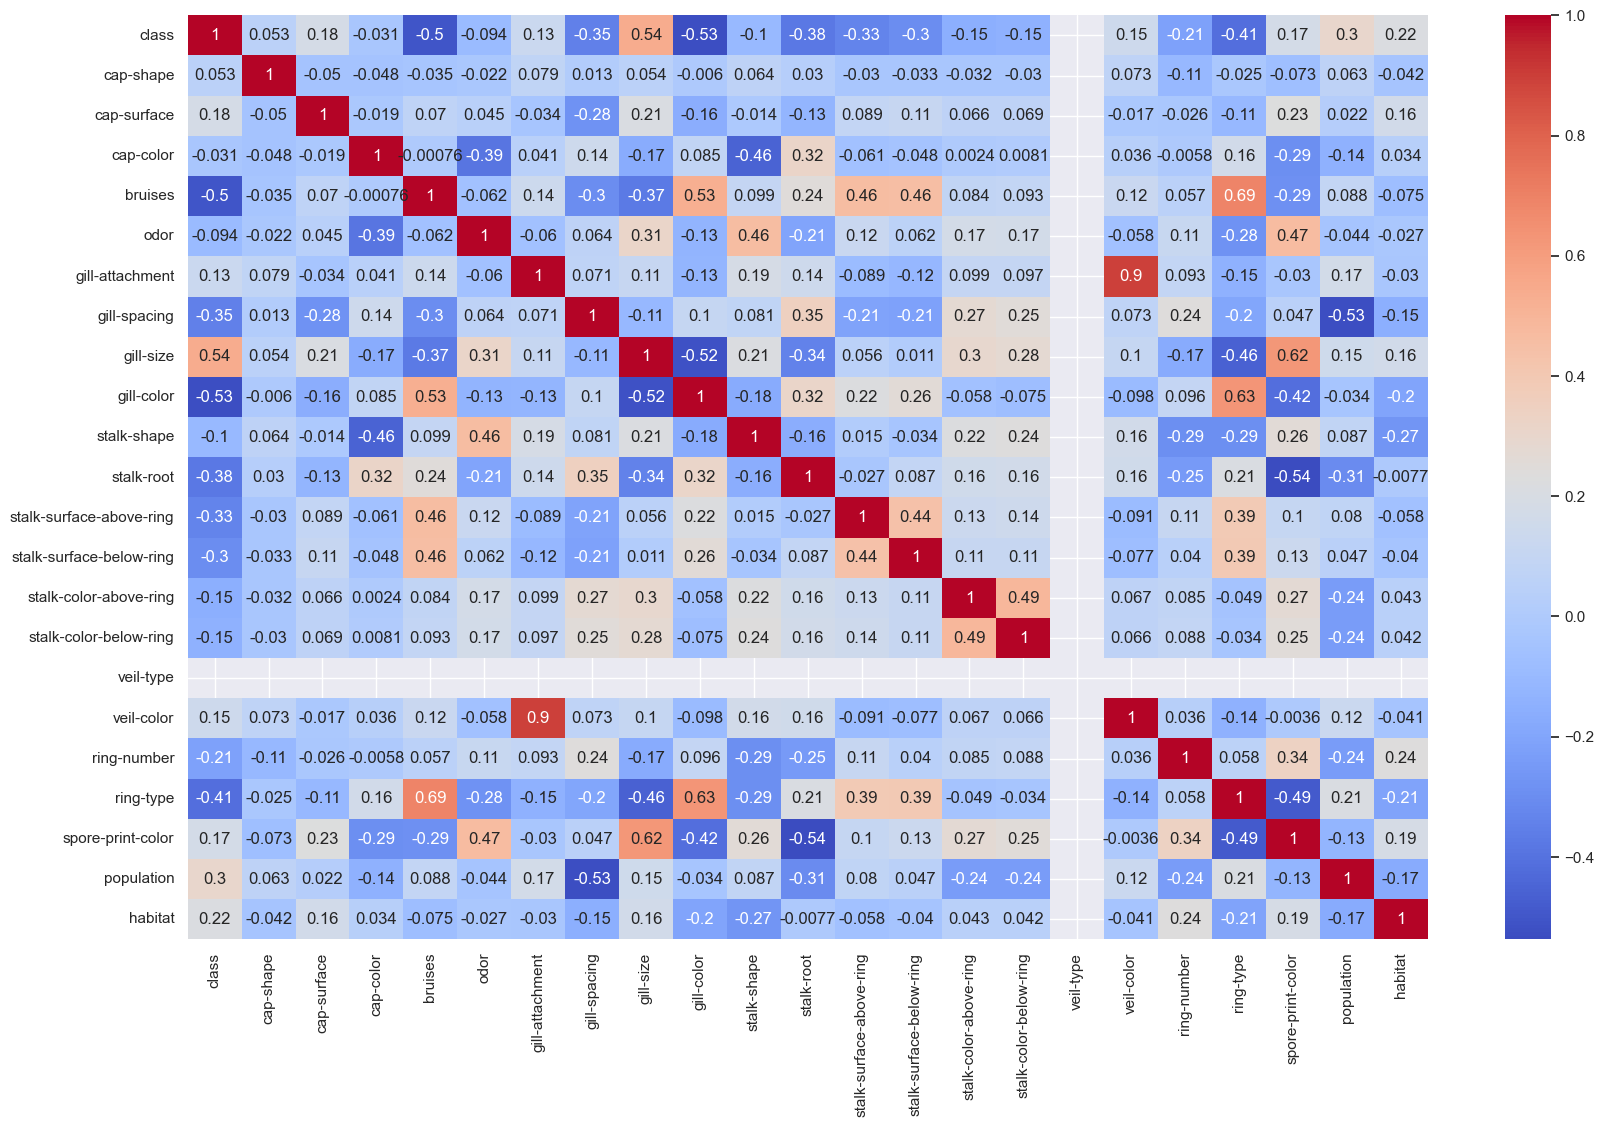

In [549]:

from sklearn.preprocessing import LabelEncoder 
df_number = df.apply(LabelEncoder().fit_transform)
#Esse sono in ordine crescente, quindi, ad esempio, in presenza sia di a e b e d, essere saranno sostituite da 0 , 1 , 2

#Inseriamo in una variabile le correlazioni tra i singoli attributi
correlazioni = df_number.corr()
correlazioni

#Rappresentiamo quindi queste correlazioni in un grafico heatmap, che rende il tutto più leggibile rispetto ai dati tabellari
sns.set(rc={'figure.figsize': (20, 12)})
sns.heatmap(data=correlazioni, annot = True, cmap='coolwarm')


Dalle correlazioni tra i diversi attributi, ho notato che il valore del campo veil-type assume sempre valore p,ovvero partial.
Possiamo quindi eliminare tutta la series, dato che ovviamente, assumendo un solo valore, è irrilevante all'interno dello studio

In [550]:

df['veil-type'].value_counts()

df.drop('veil-type', axis=1, inplace=True)
df_number.drop('veil-type', axis=1, inplace=True)
df_number

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,0,0,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,0,0,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,1,0,2,1,7,7,2,1,0,7,4,2


Stampiamo quindi le correlazioni tra class e il resto degli attributi con il coefficiente di kendall (poco cambia con gli altri 2 presenti
ovvero pearson e spearman)

<Axes: >

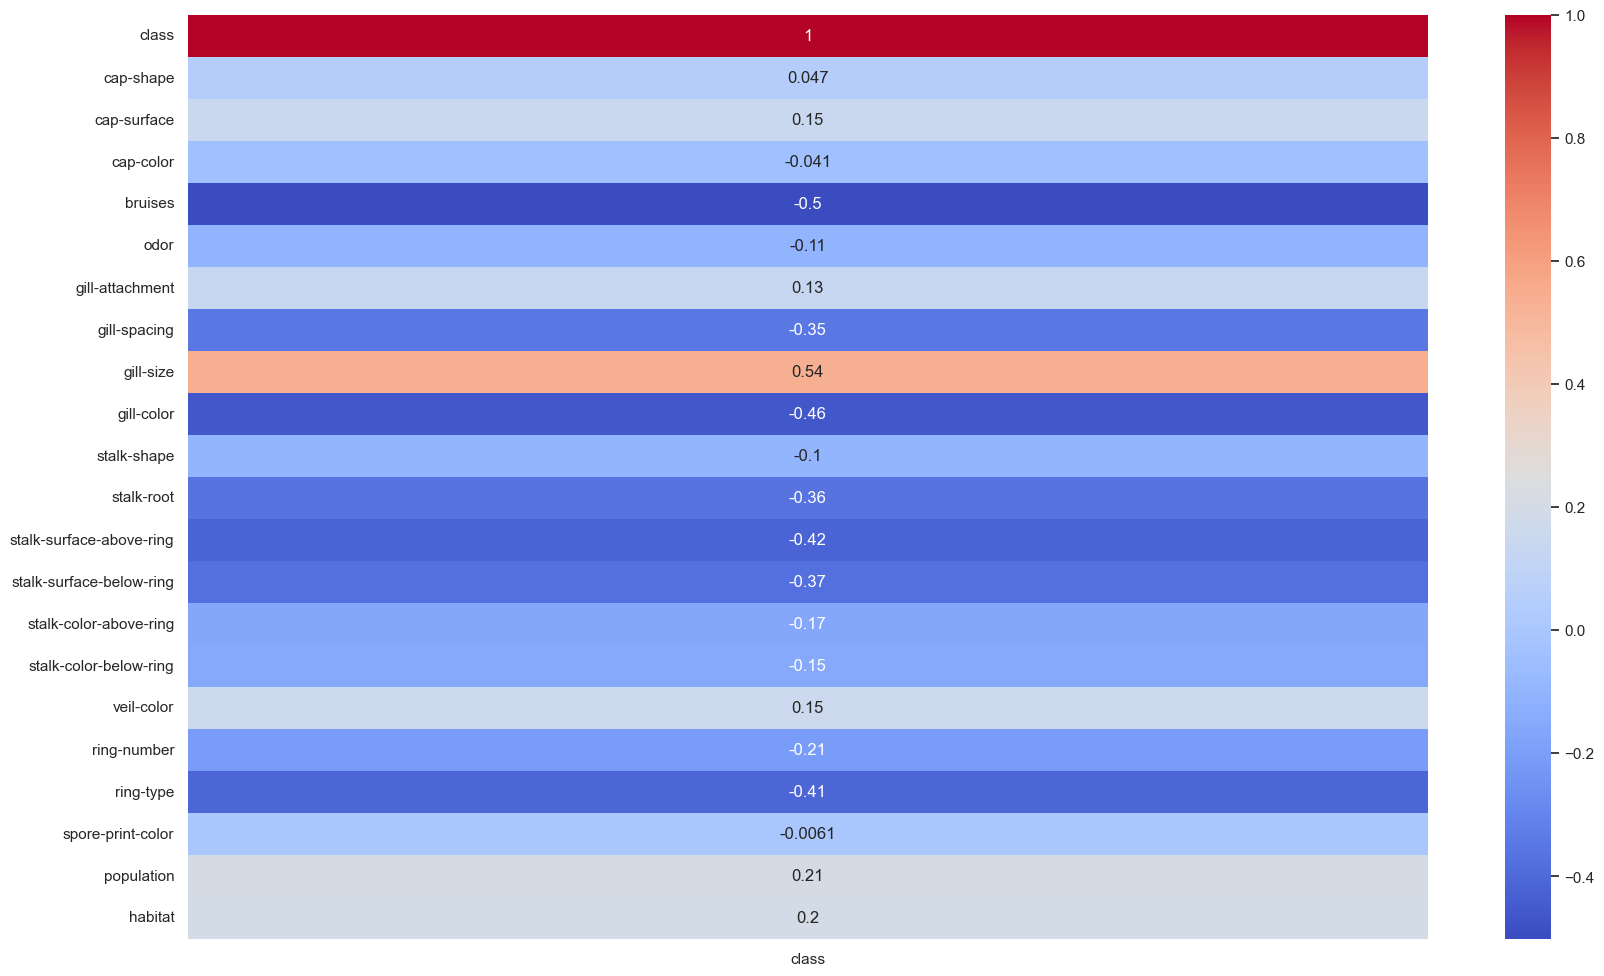

In [551]:

sns.heatmap(df_number.corr(method='kendall')[['class']], annot = True, cmap='coolwarm')



Utilizziamo l'attributo describe per visualizzare i valori delle distribuzioni dei singoli valori di attributi all'interno del dataset

Notiamo che  non ha molto senso effettuare questo tipo di misurazioni, dato che vengono effettuate delle medie utilizzando i valori interi
che rappresentano effettivamente i valori discreti di quel particolare tipo di attributo, e non un valore "reale"

In [552]:

df_number.describe()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,1.109798,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,1.061106,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,4.000000,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


Per ricercare delle relazioni logiche all'interno del dataset verifico per ognuno dei 21 attributi, al variare dei valori assunti da essi, la classe di appartenenza

In [553]:
def raffiguraCorrelazioniPer(attributo):
    #Contiamo per ogni categoria quanti sono i funghi velenosi e non per le singole realizzazioni di "attributo" 
    velenoso = df[df['class'] == 'p'][attributo].value_counts()
    commestibile = df[df['class'] == 'e'][attributo].value_counts()
    #Li rappresentiamo all'interno di un dataframe
    dataframe = pd.DataFrame(data=[velenoso, commestibile], index=['velenoso','commestibile'])
    #Eliminiamo i valori Nan all'interno del nuovo dataframe
    dataframe.fillna(0, inplace=True)
    #E ritorniamo il dataframe
    return dataframe

,x,f,k,b,c,s
velenoso,1708.0,1556.0,600.0,48.0,4.0,0.0
commestibile,1948.0,1596.0,228.0,404.0,0.0,32.0


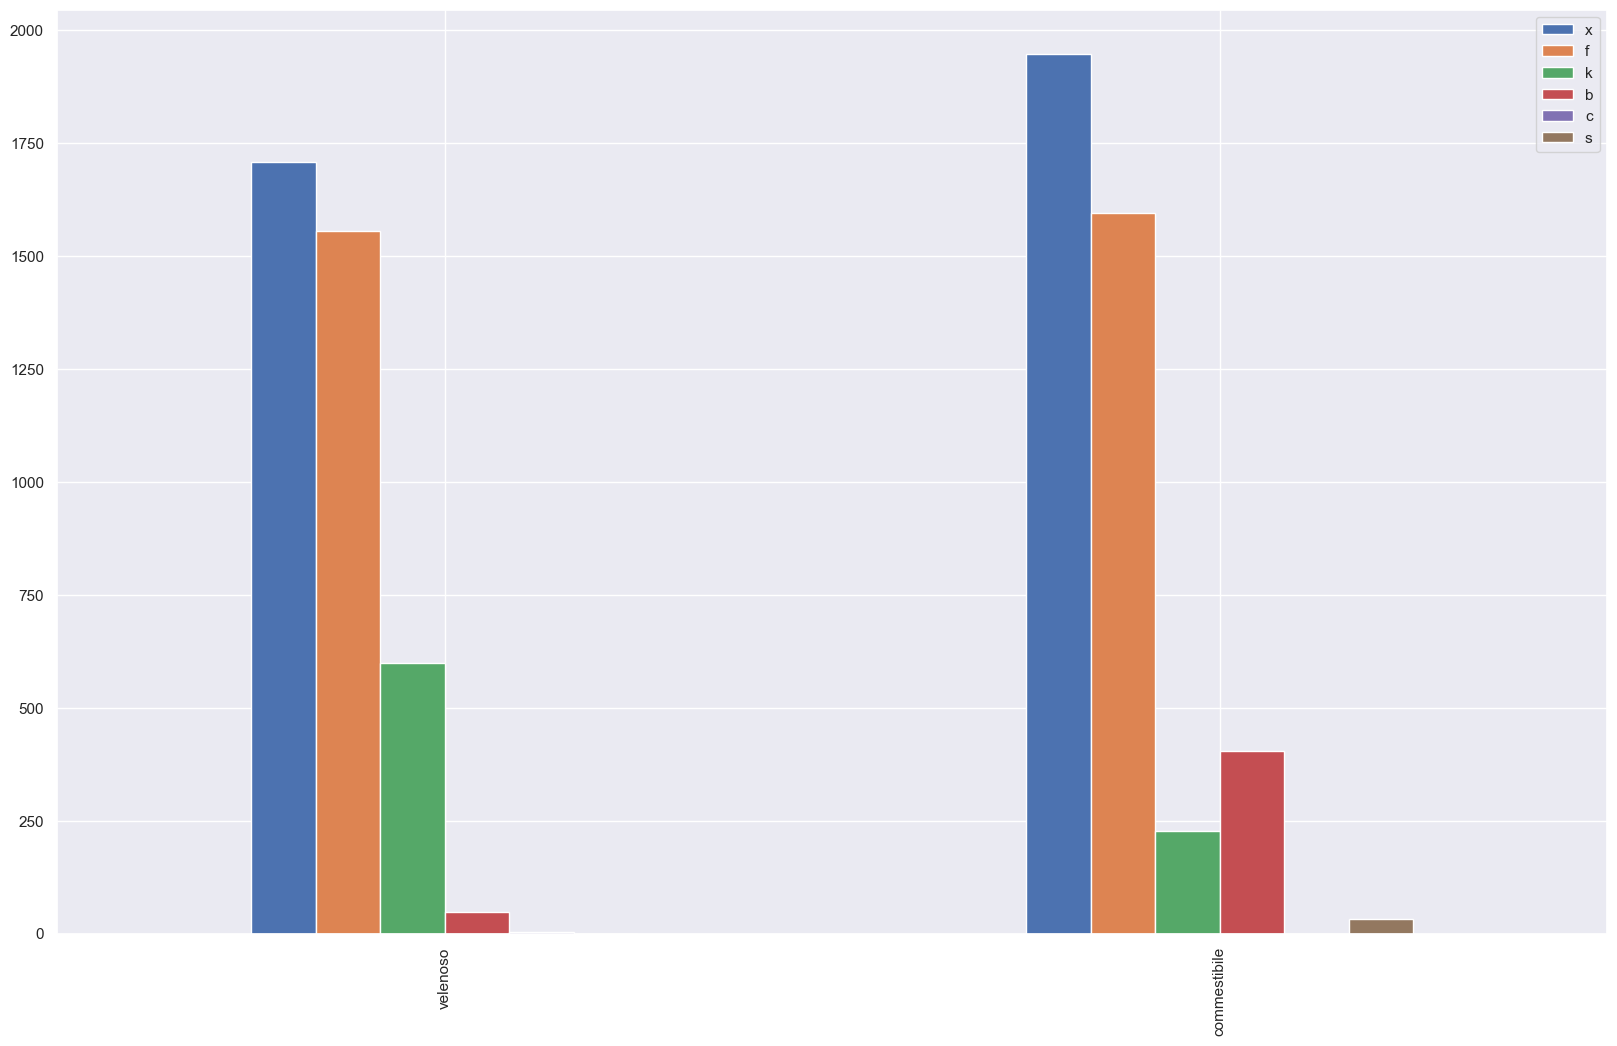

In [554]:

#Rappresentiamo quindi il numero di funghi velenosi e commestibili per l'attributo cap-shape
raffiguraCorrelazioniPer('cap-shape').plot(kind="bar")
raffiguraCorrelazioniPer('cap-shape')




Notiamo che se il fungo ha cap-shape = s (sunken) sono commestibili, mentre tutti i funghi che hanno la forma conica (valore c), sono velenosi
N.B. la quantità dei funghi di queste 2 categorie è bassa quindi potrebbero non essere delle regole affidabili
if (cap-shape == c) => velenoso , if (cap-shape == s) => commestibile

,y,s,f,g
velenoso,1740.0,1412.0,760.0,4.0
commestibile,1504.0,1144.0,1560.0,0.0


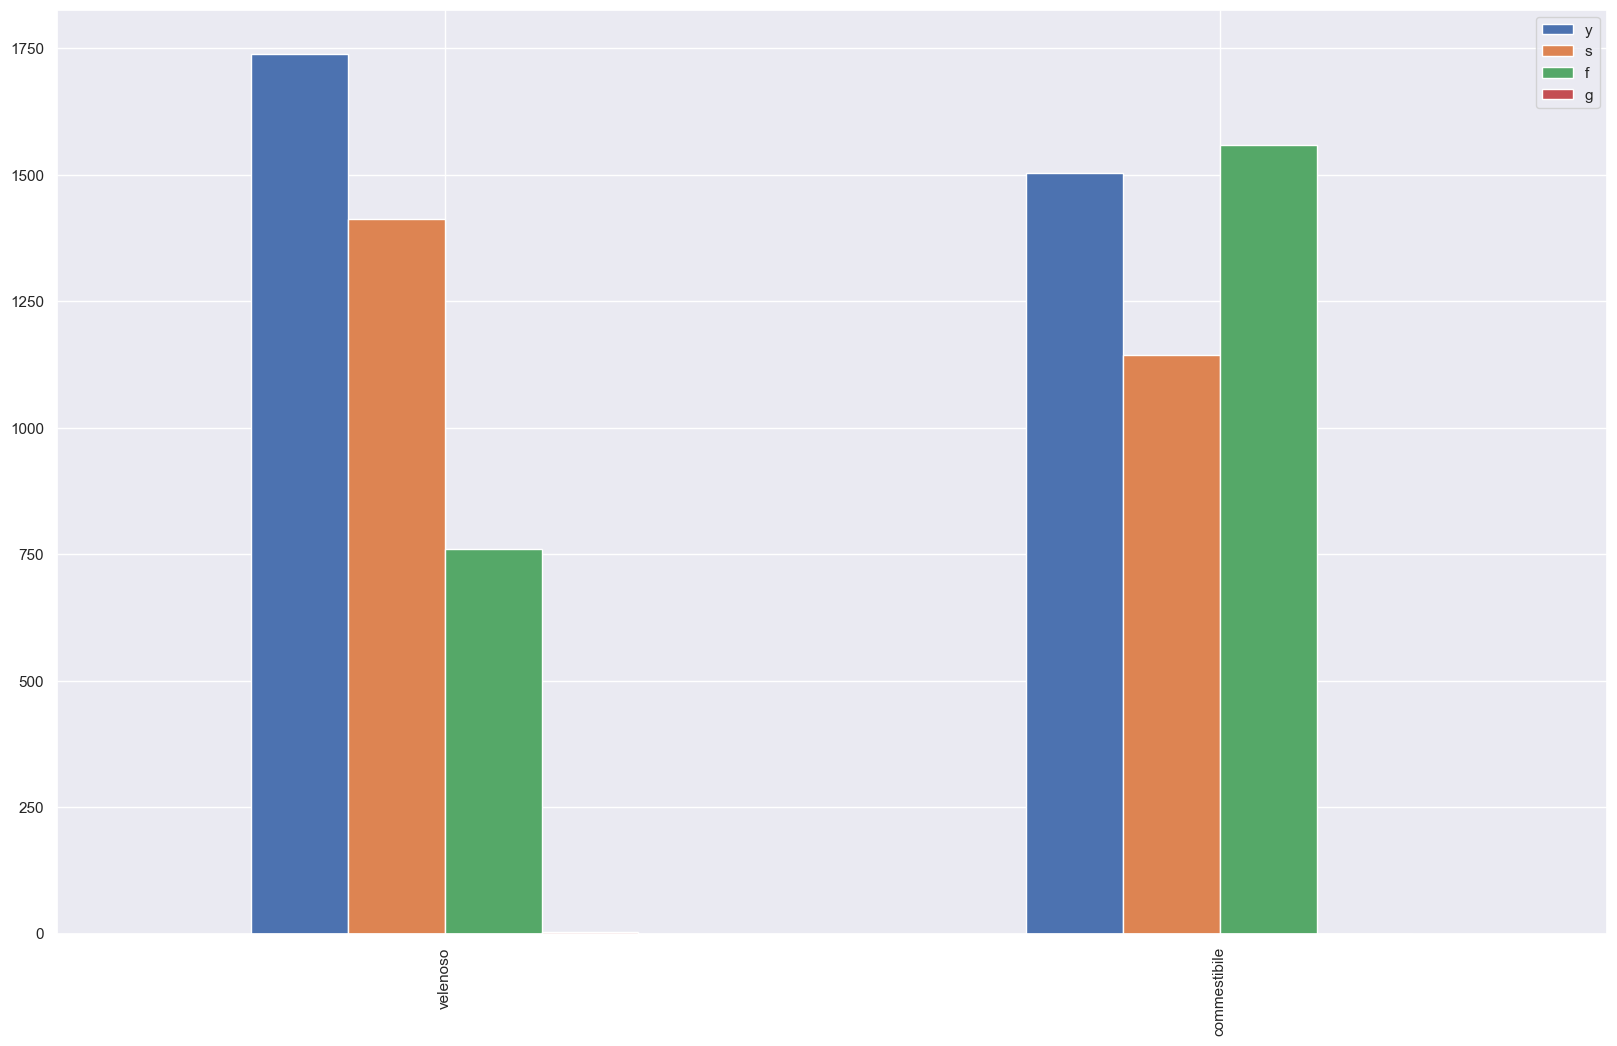

In [555]:
#Effettuiamo lo stesso procedimento per il secondo attributo
raffiguraCorrelazioniPer('cap-surface').plot(kind="bar")
raffiguraCorrelazioniPer('cap-surface')


Anche qui il numero di funghi con cap-surface = g sono solo 4, quindi la regola logica difficilmente può essere applicata in generale

,n,e,g,y,w,b,p,c,u,r
velenoso,1020.0,876.0,808.0,672.0,320.0,120.0,88.0,12.0,0.0,0.0
commestibile,1264.0,624.0,1032.0,400.0,720.0,48.0,56.0,32.0,16.0,16.0


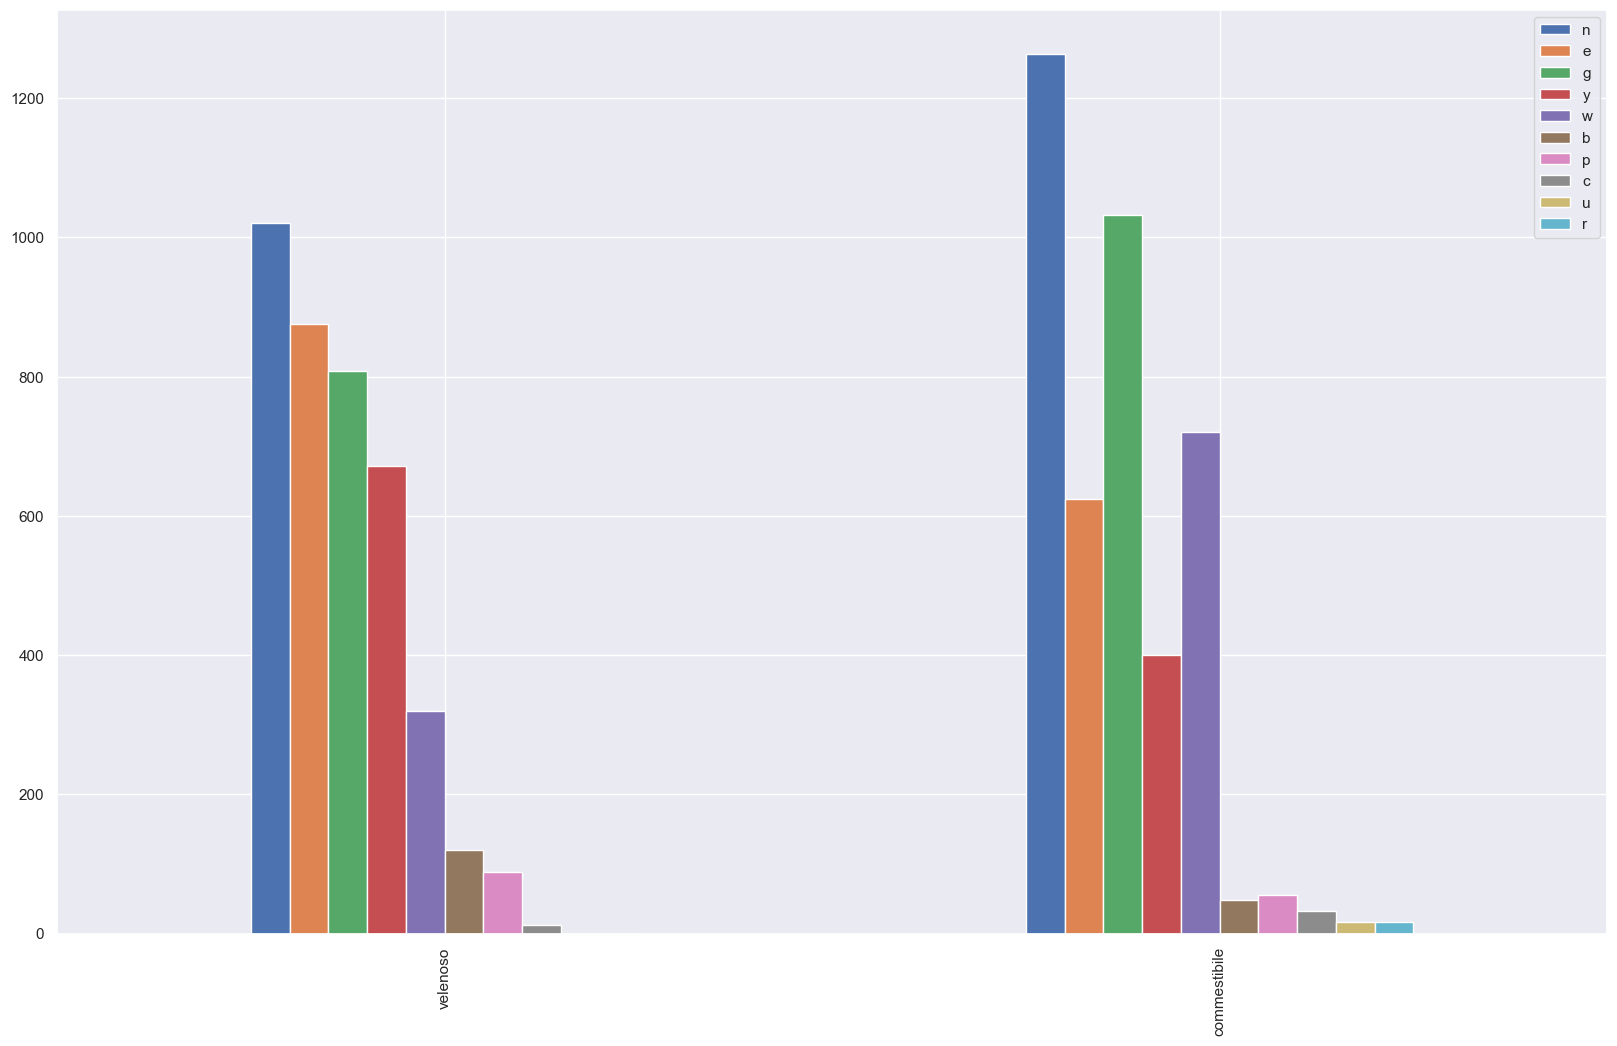

In [556]:
#Effettuiamo lo stesso procedimento per l'attributo cap-color
raffiguraCorrelazioniPer('cap-color').plot(kind="bar")
raffiguraCorrelazioniPer('cap-color')

,f,t
velenoso,3292,624
commestibile,1456,2752


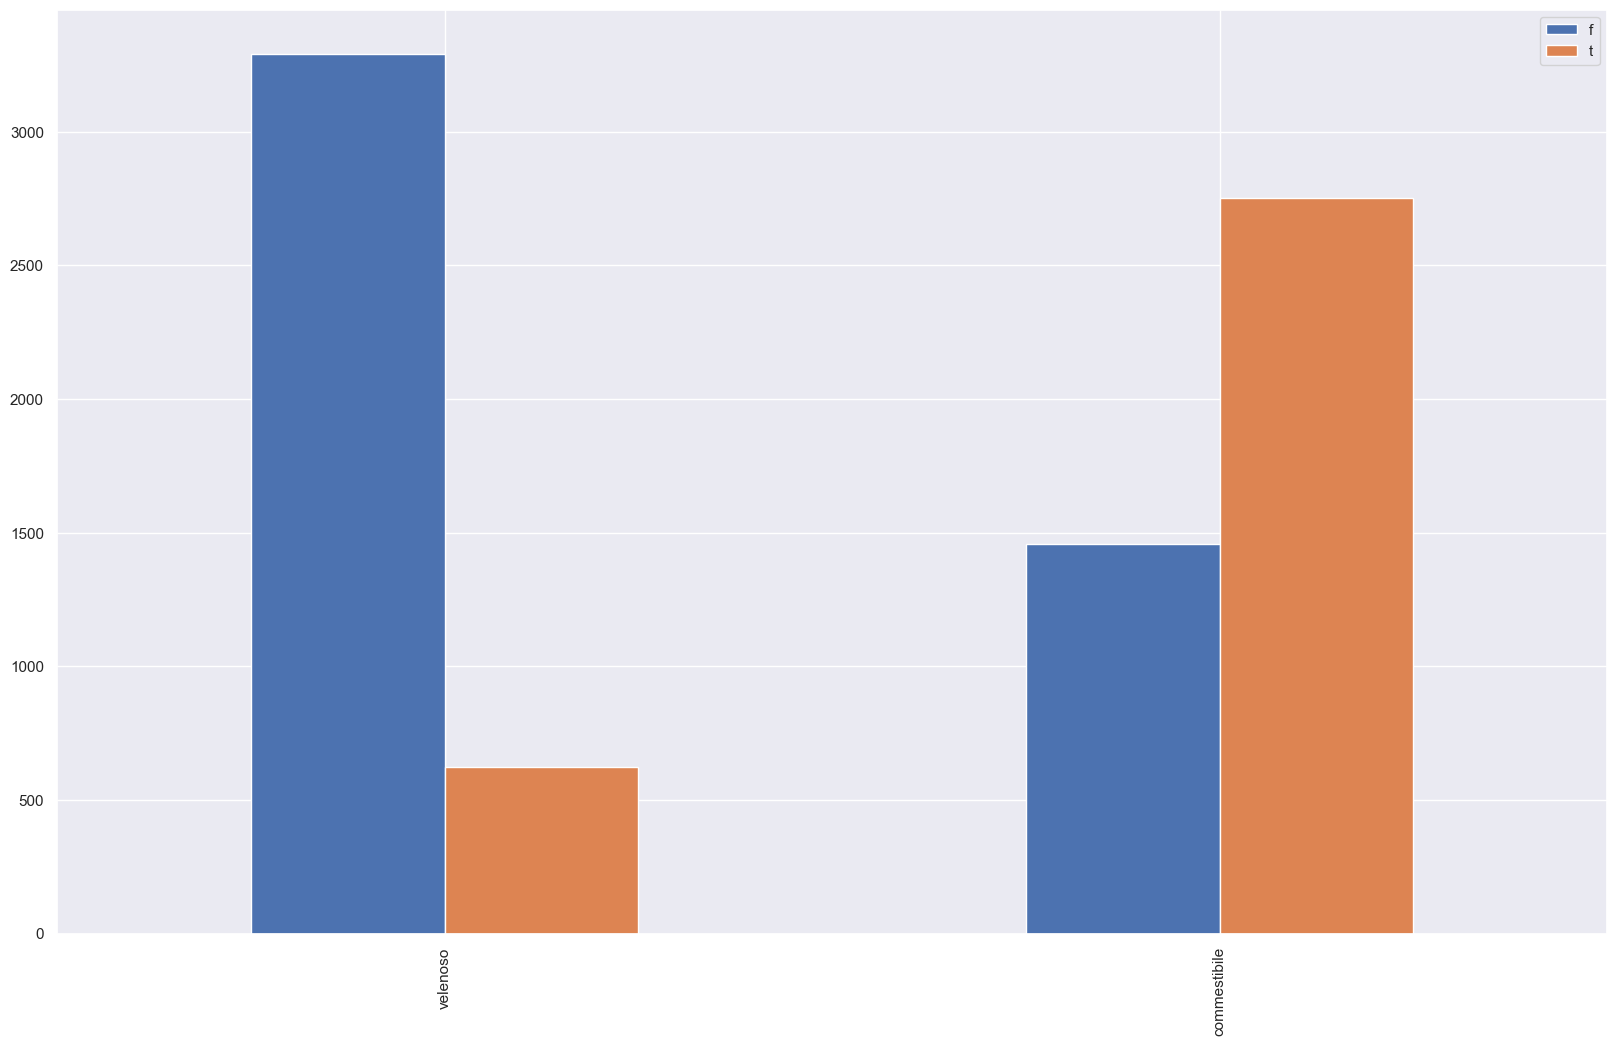

In [557]:
#Effettuiamo lo stesso procedimento per l'attributo bruises
raffiguraCorrelazioniPer('bruises').plot(kind="bar")
raffiguraCorrelazioniPer('bruises')

,f,y,s,p,c,n,m,a,l
velenoso,2160.0,576.0,576.0,256.0,192.0,120.0,36.0,0.0,0.0
commestibile,0.0,0.0,0.0,0.0,0.0,3408.0,0.0,400.0,400.0


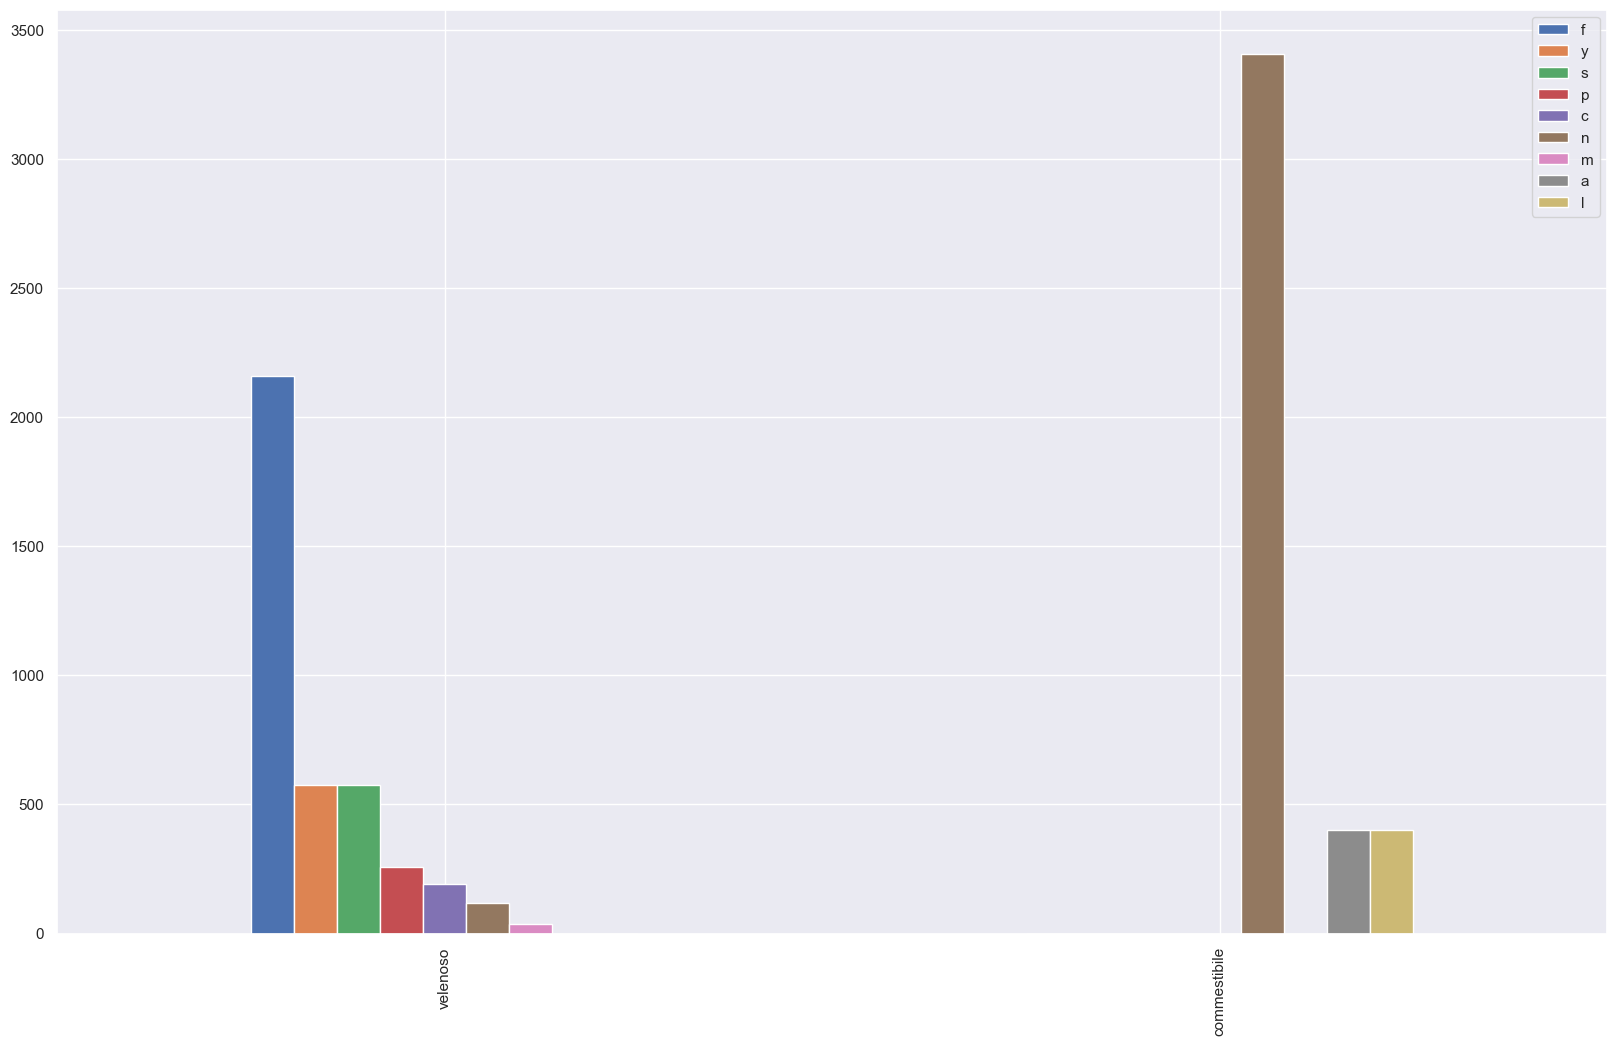

In [558]:
#Effettuiamo lo stesso procedimento per l'attributo odor
raffiguraCorrelazioniPer('odor').plot(kind="bar")
raffiguraCorrelazioniPer('odor')


Qui notiamo una cosa interessante, ovvero che la totalità dei funghi che presenta odor= a o l allora è commestibile, mentre la totalità dei funghi
che presenta attributi di odor = f, y, s, p, c, ed m sono velenosi
per quanto riguarda i funghi inodore (odor = n), la quasi totalità sono funghi commestibili
possiamo comunque ricavare le regole logiche
if (odor == f || y || s || p || c || m) => velenoso
if (odor = a || l) ==> commestibile
Oppure if (odor != n || a || l) => velenoso

,f,a
velenoso,3898,18
commestibile,4016,192


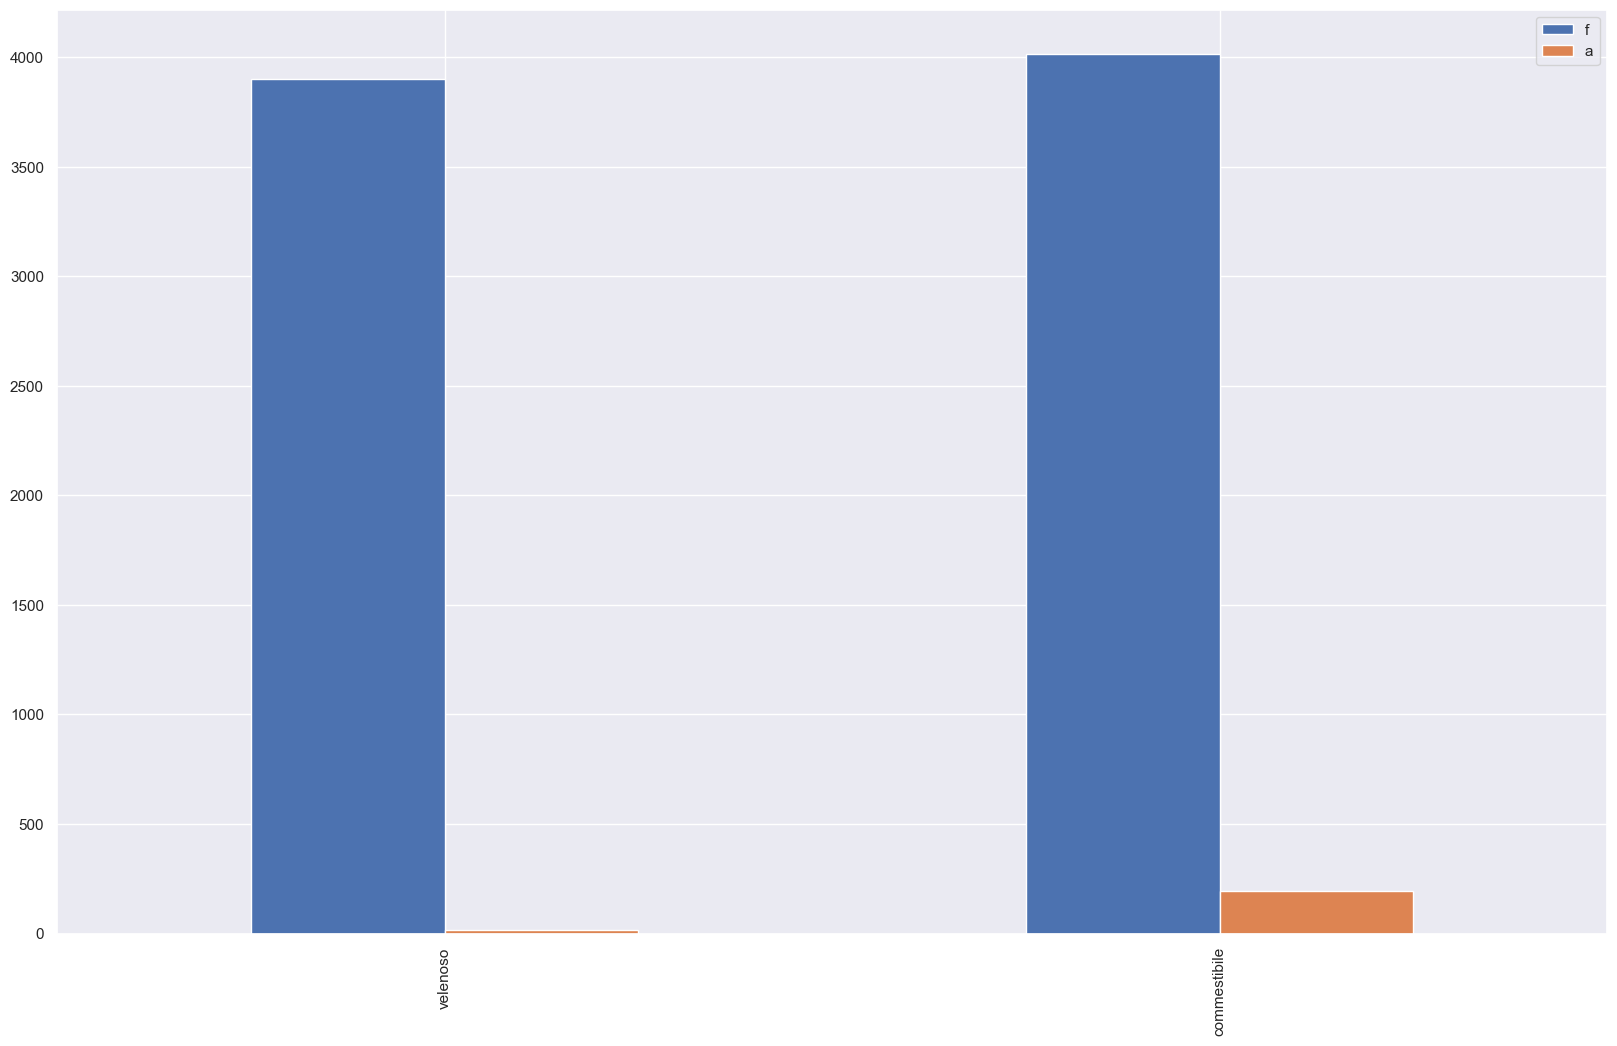

In [559]:
#Effettuiamo lo stesso procedimento per l'attributo gill-attachment
raffiguraCorrelazioniPer('gill-attachment').plot(kind="bar")
raffiguraCorrelazioniPer('gill-attachment')

,c,w
velenoso,3804,112
commestibile,3008,1200


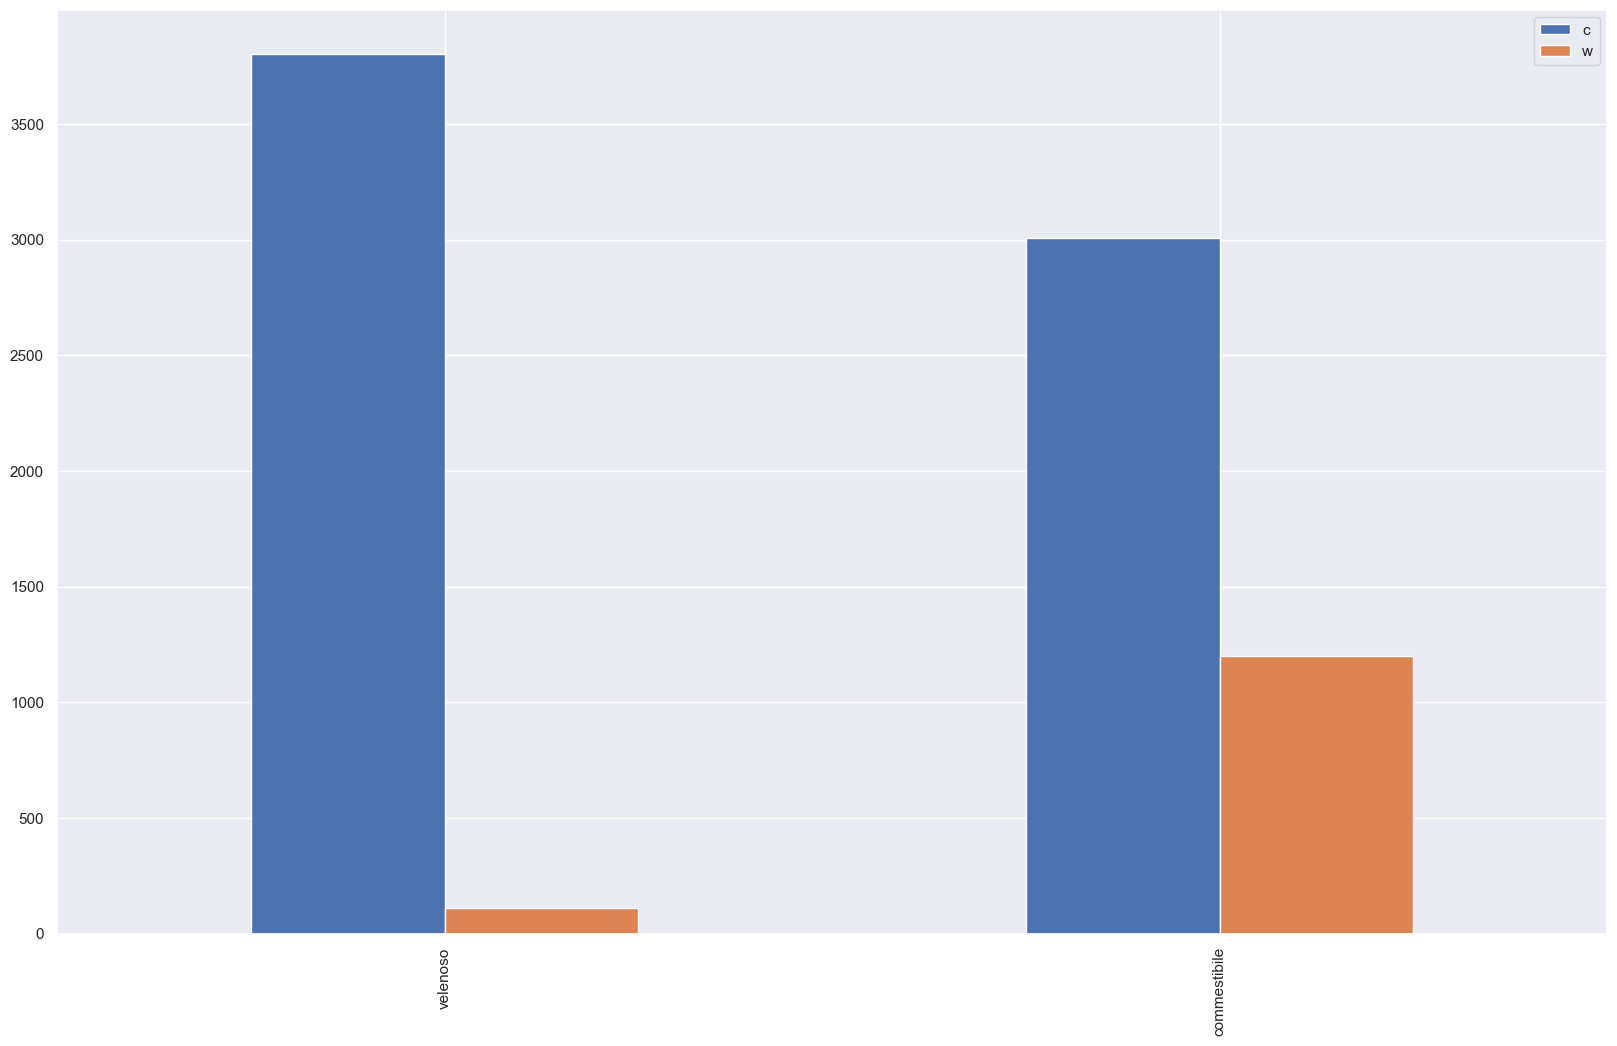

In [560]:
#Effettuiamo lo stesso procedimento per l'attributo gill-spacing
raffiguraCorrelazioniPer('gill-spacing').plot(kind="bar")
raffiguraCorrelazioniPer('gill-spacing')

,n,b
velenoso,2224,1692
commestibile,288,3920


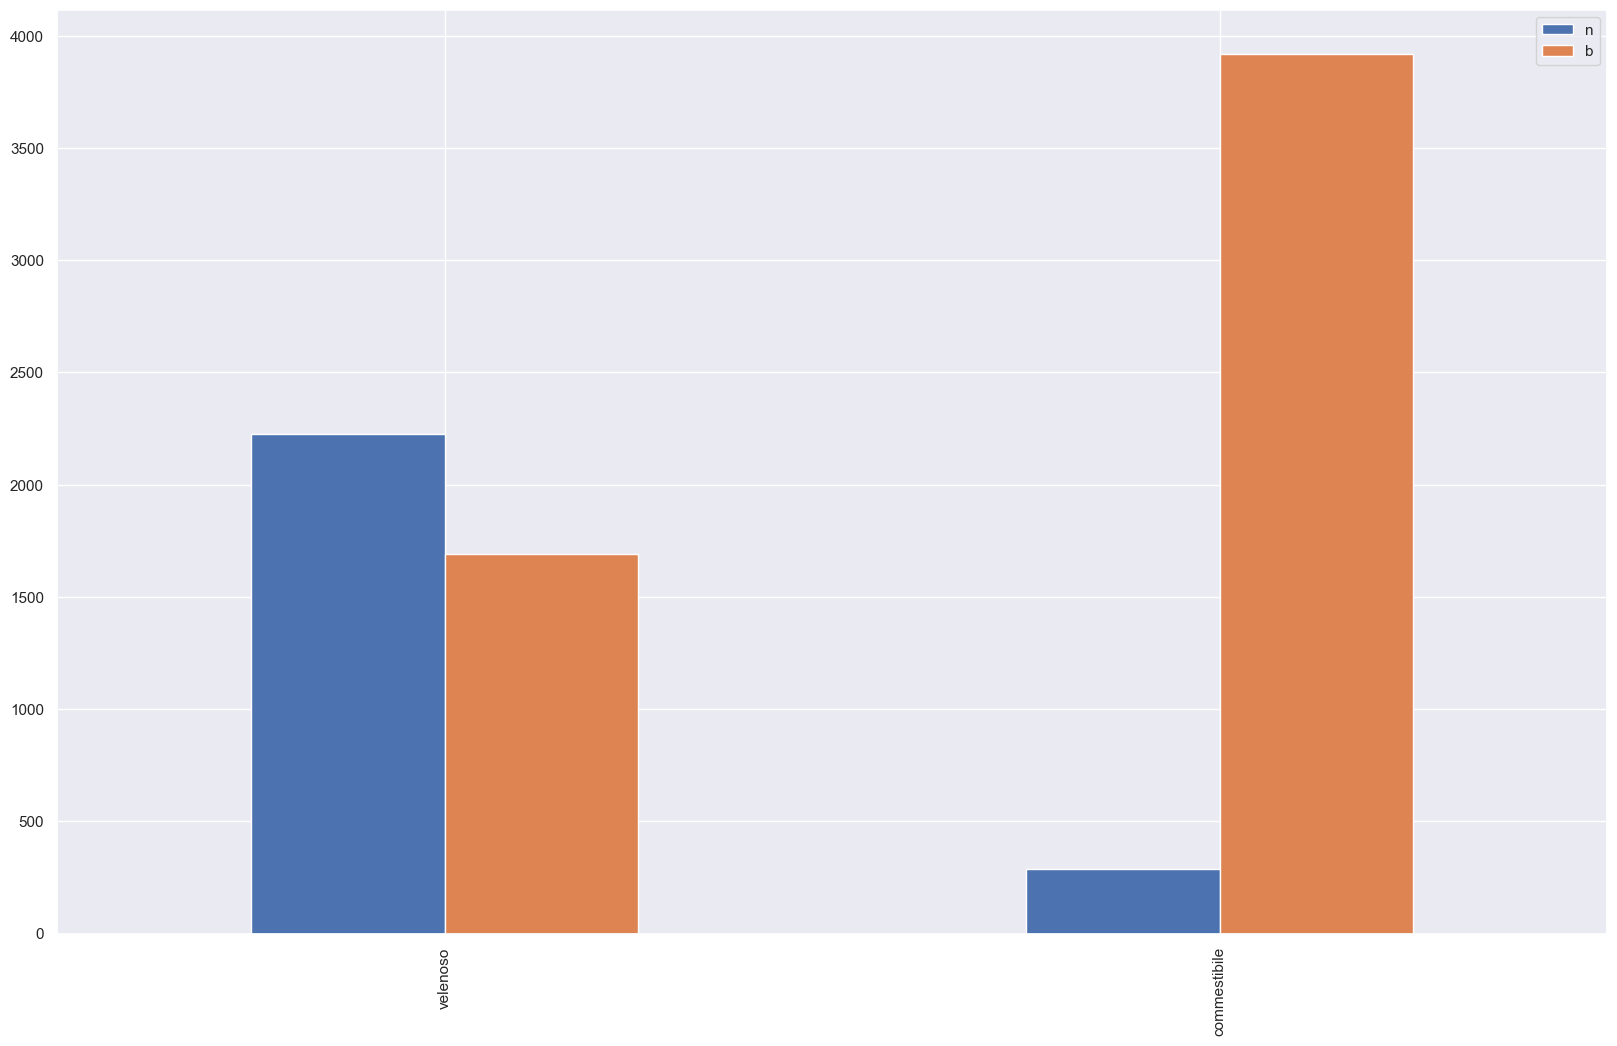

In [561]:
#Effettuiamo lo stesso procedimento per l'attributo gill-size
raffiguraCorrelazioniPer('gill-size').plot(kind="bar")
raffiguraCorrelazioniPer('gill-size')

,b,p,h,g,w,n,k,u,r,y,e,o
velenoso,1728.0,640.0,528.0,504.0,246.0,112.0,64.0,48.0,24.0,22.0,0.0,0.0
commestibile,0.0,852.0,204.0,248.0,956.0,936.0,344.0,444.0,0.0,64.0,96.0,64.0


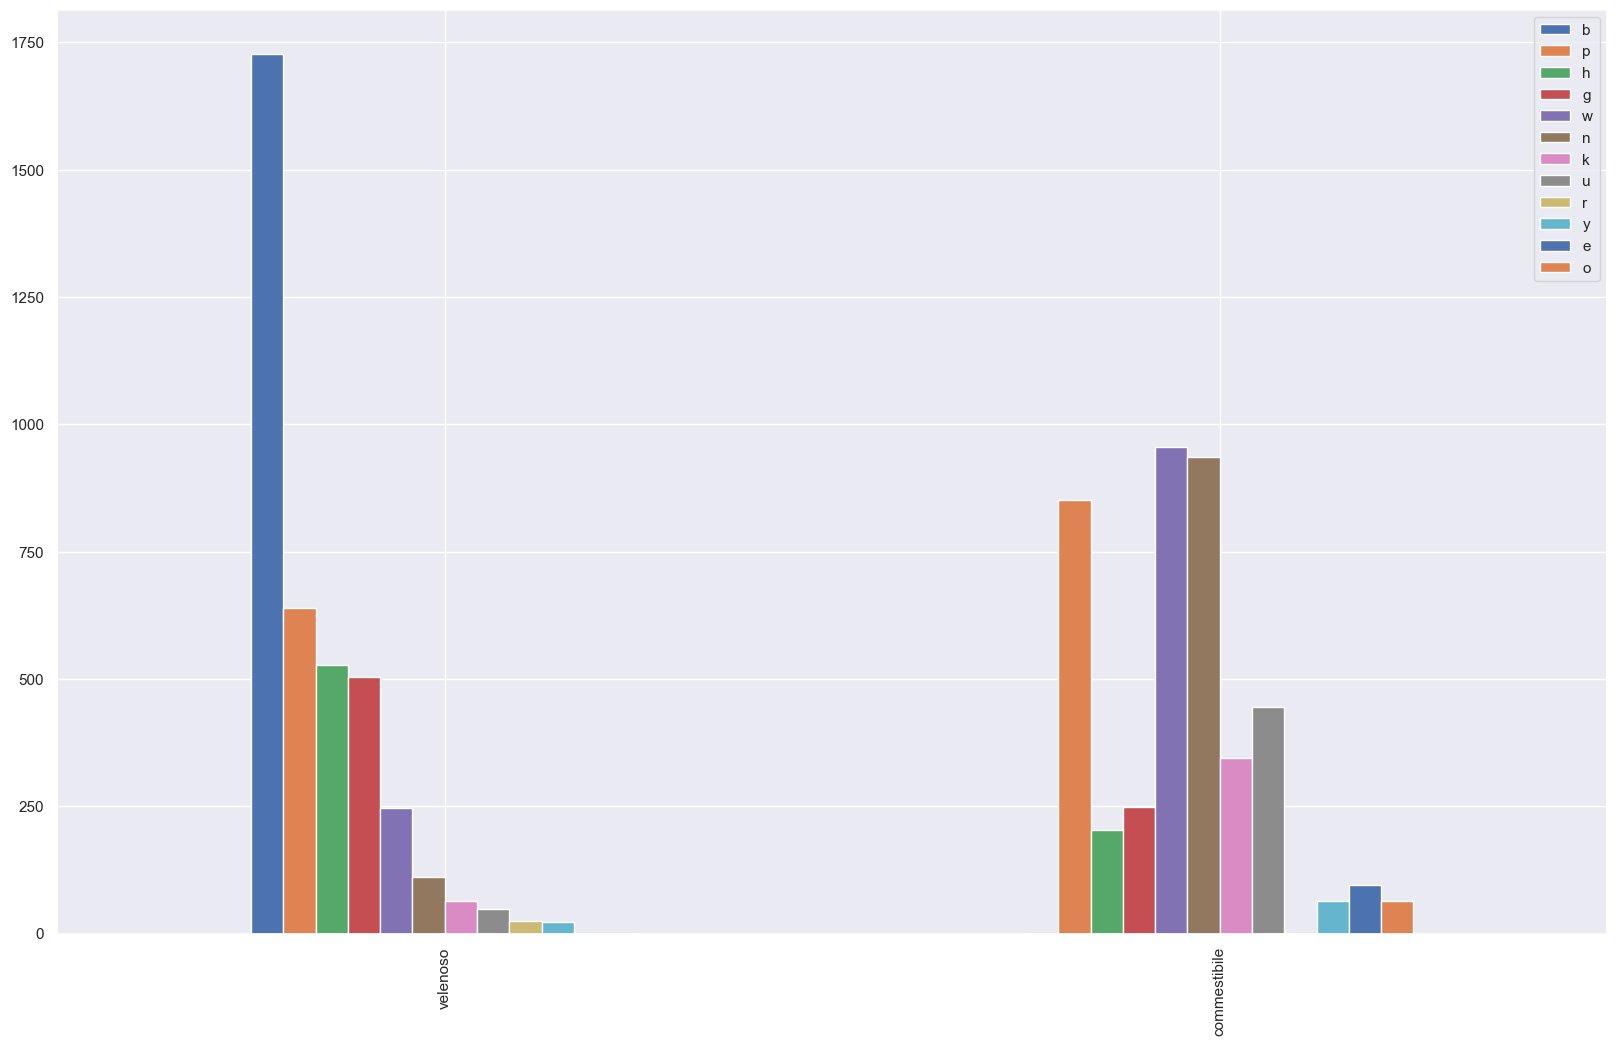

In [562]:
#Effettuiamo lo stesso procedimento per l'attributo gill-color
raffiguraCorrelazioniPer('gill-color').plot(kind="bar")
raffiguraCorrelazioniPer('gill-color')


Notiamo che if (gill-color = buff (camoscio)) => velenoso
if (gillcolor = e (rosso) || o (orange) || r (green)) => Commestibile

,t,e
velenoso,2016,1900
commestibile,2592,1616


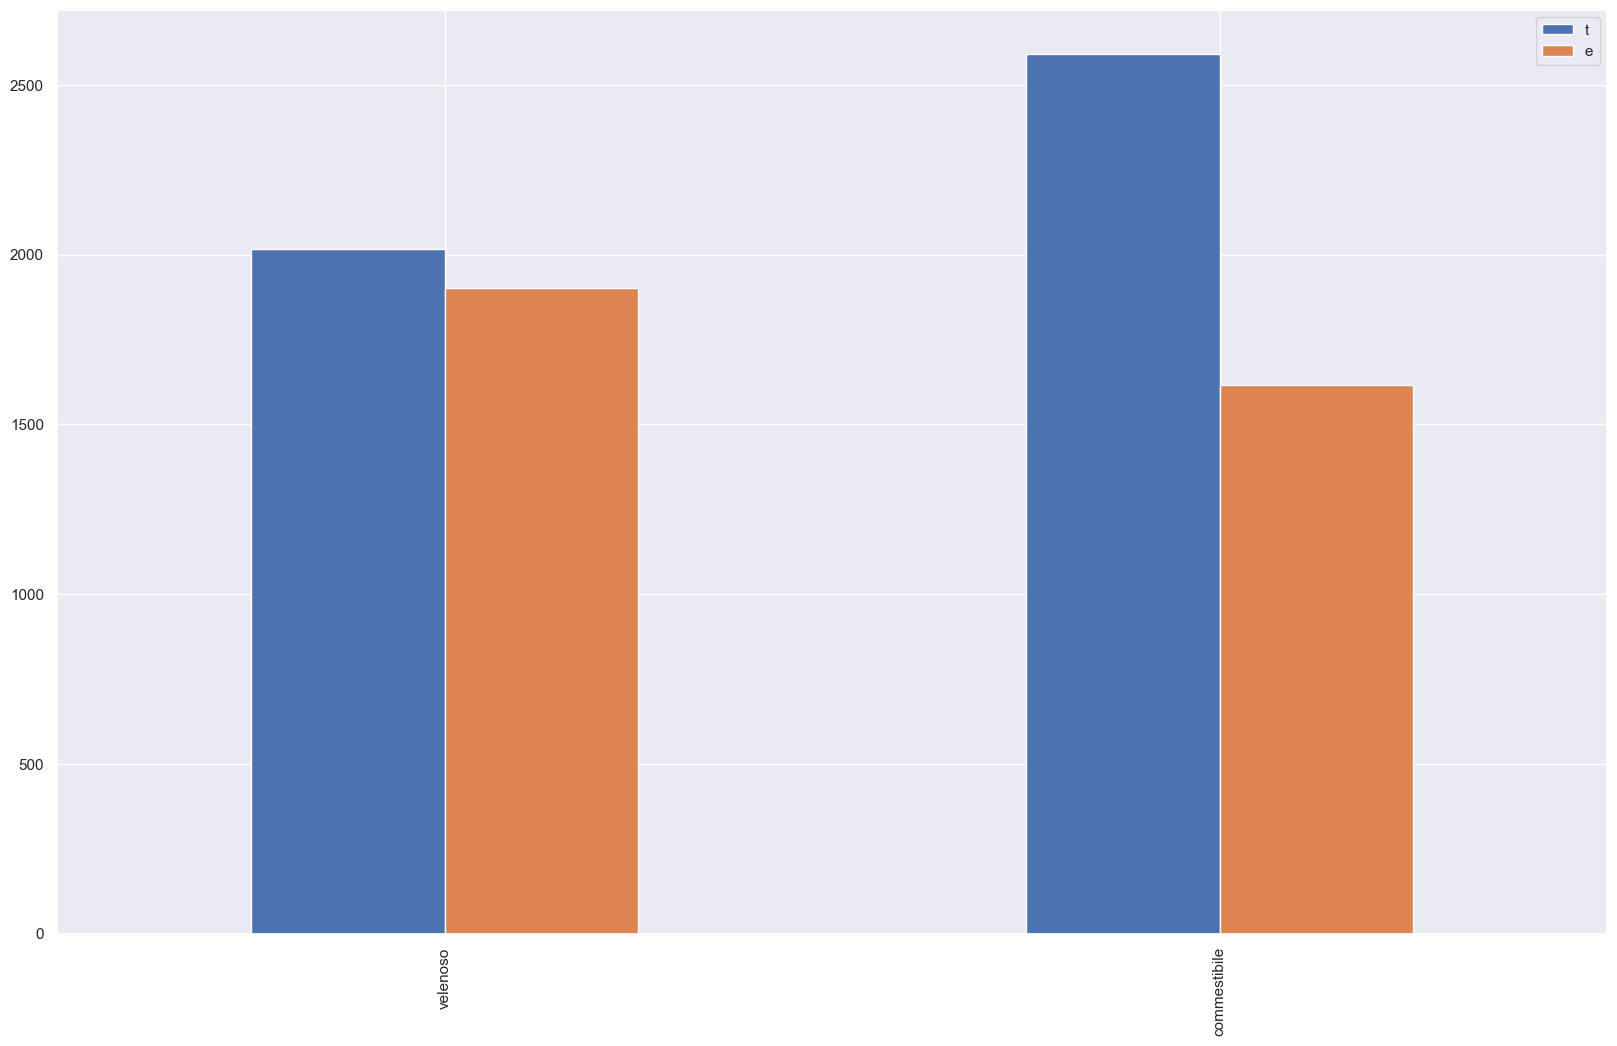

In [563]:
#Effettuiamo lo stesso procedimento per l'attributo stalk-shape
raffiguraCorrelazioniPer('stalk-shape').plot(kind="bar")
raffiguraCorrelazioniPer('stalk-shape')

,b,?,e,c,r
velenoso,1856.0,1760.0,256.0,44.0,0.0
commestibile,1920.0,720.0,864.0,512.0,192.0


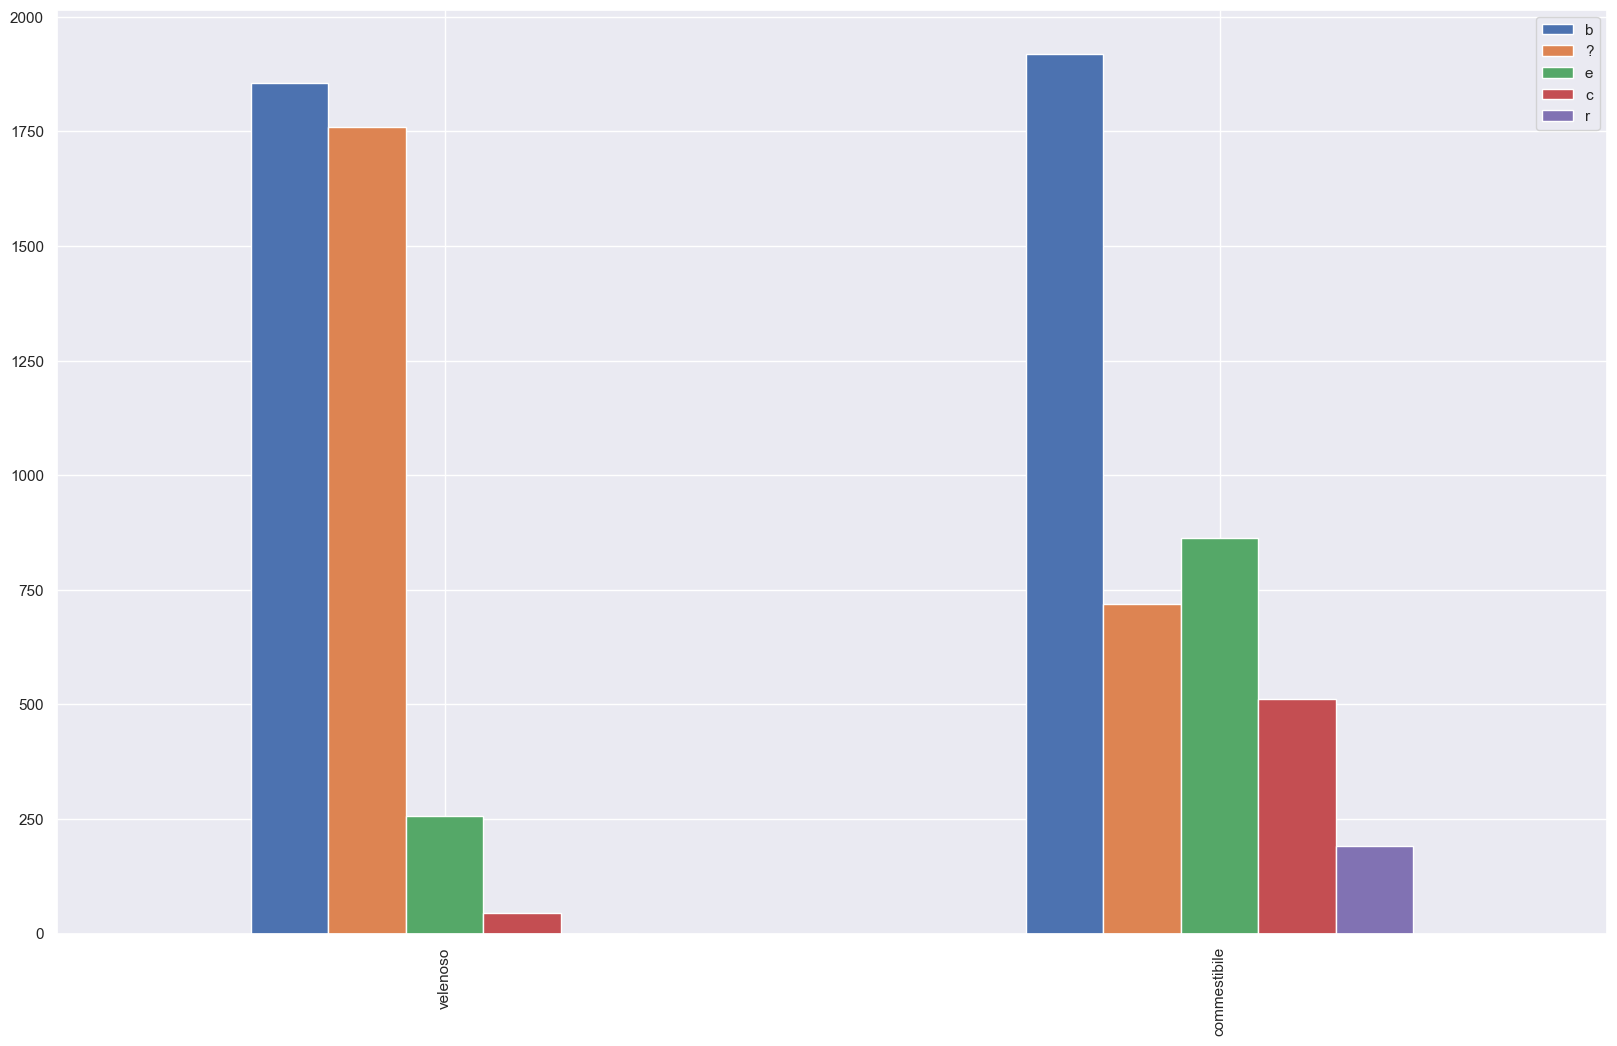

In [564]:
#Effettuiamo lo stesso procedimento per l'attributo stalk-root
raffiguraCorrelazioniPer('stalk-root').plot(kind="bar")
raffiguraCorrelazioniPer('stalk-root')


Notiamo che se if (stalk-root == r) => commestibile

,k,s,f,y
velenoso,2228,1536,144,8
commestibile,144,3640,408,16


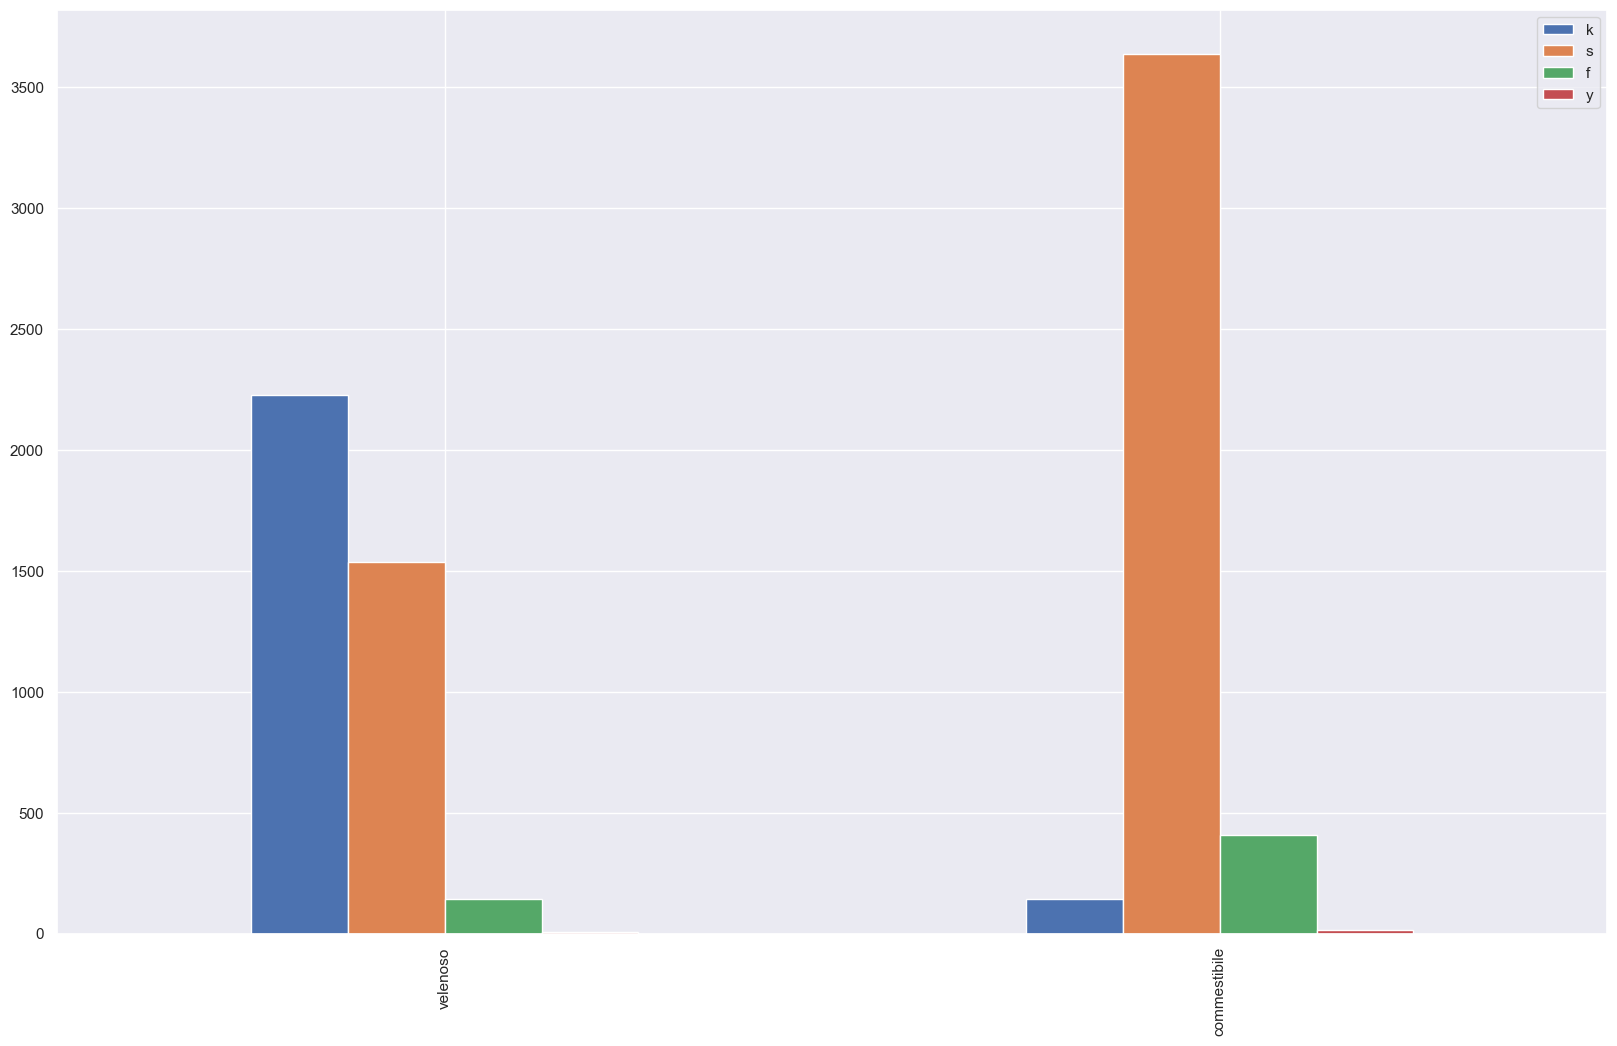

In [565]:
#Effettuiamo lo stesso procedimento per l'attributo stalk-surface-above-ring
raffiguraCorrelazioniPer('stalk-surface-above-ring').plot(kind="bar")
raffiguraCorrelazioniPer('stalk-surface-above-ring')

,k,s,f,y
velenoso,2160,1536,144,76
commestibile,144,3400,456,208


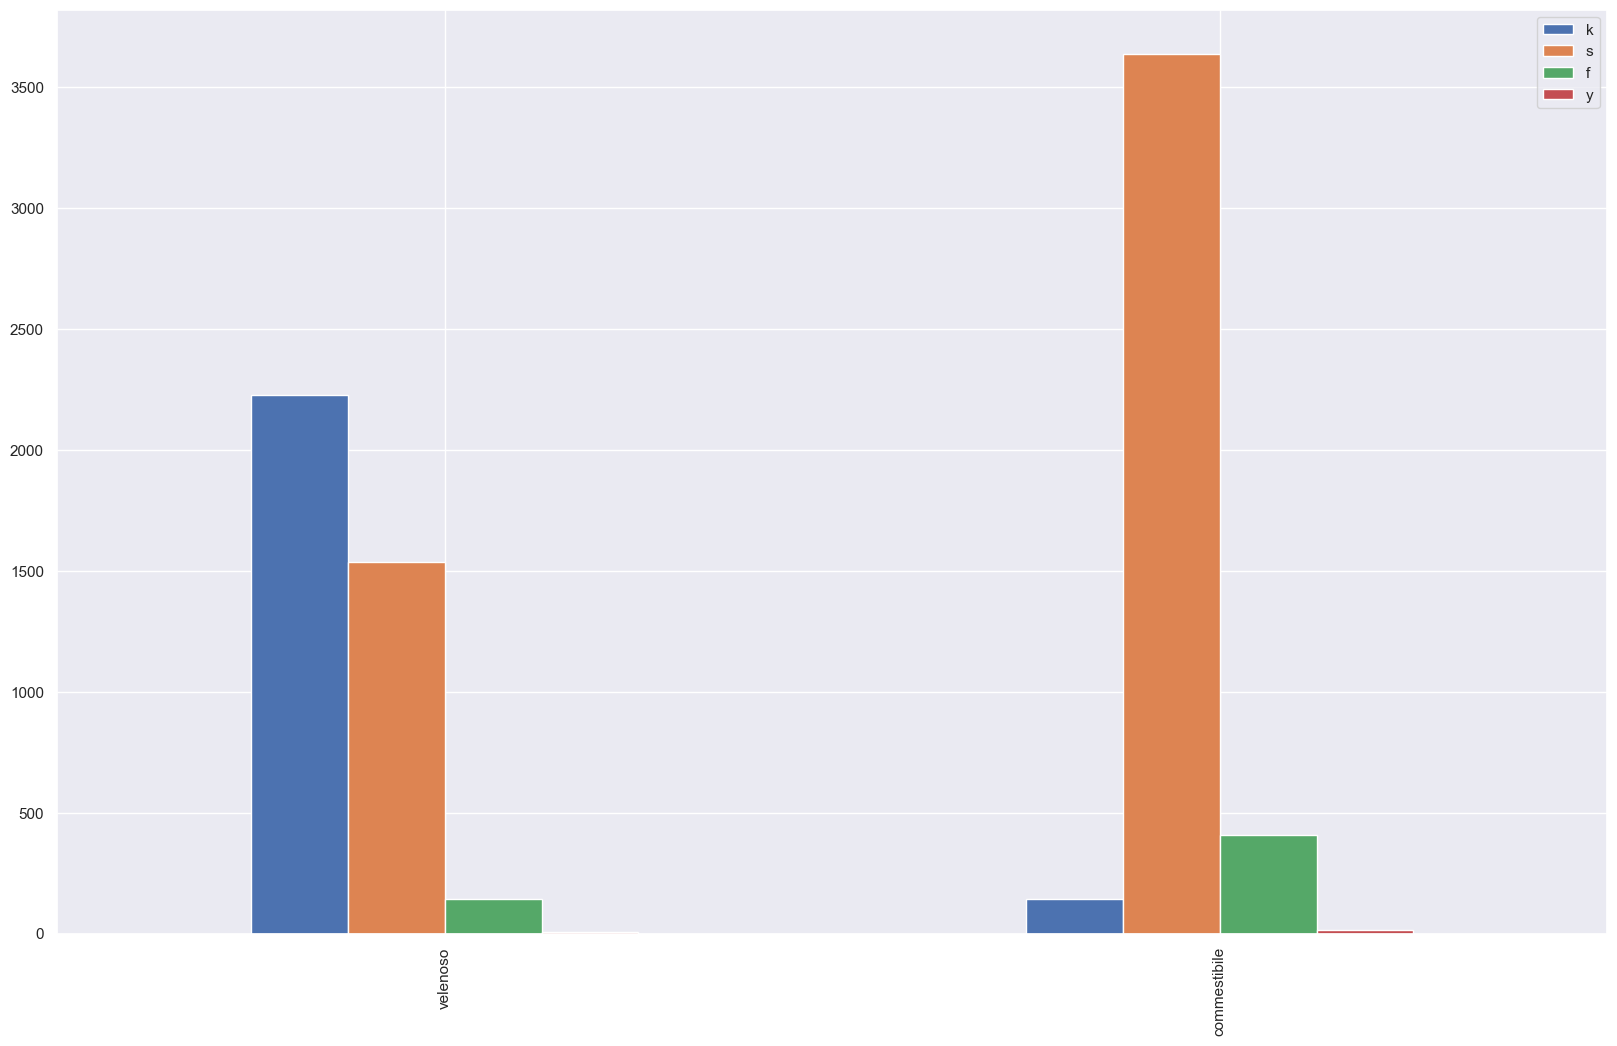

In [566]:
#Effettuiamo lo stesso procedimento per l'attributo stalk-surface-below-ring
raffiguraCorrelazioniPer('stalk-surface-above-ring').plot(kind="bar")
raffiguraCorrelazioniPer('stalk-surface-below-ring')

,w,p,n,b,c,y,g,o,e
velenoso,1712.0,1296.0,432.0,432.0,36.0,8.0,0.0,0.0,0.0
commestibile,2752.0,576.0,16.0,0.0,0.0,0.0,576.0,192.0,96.0


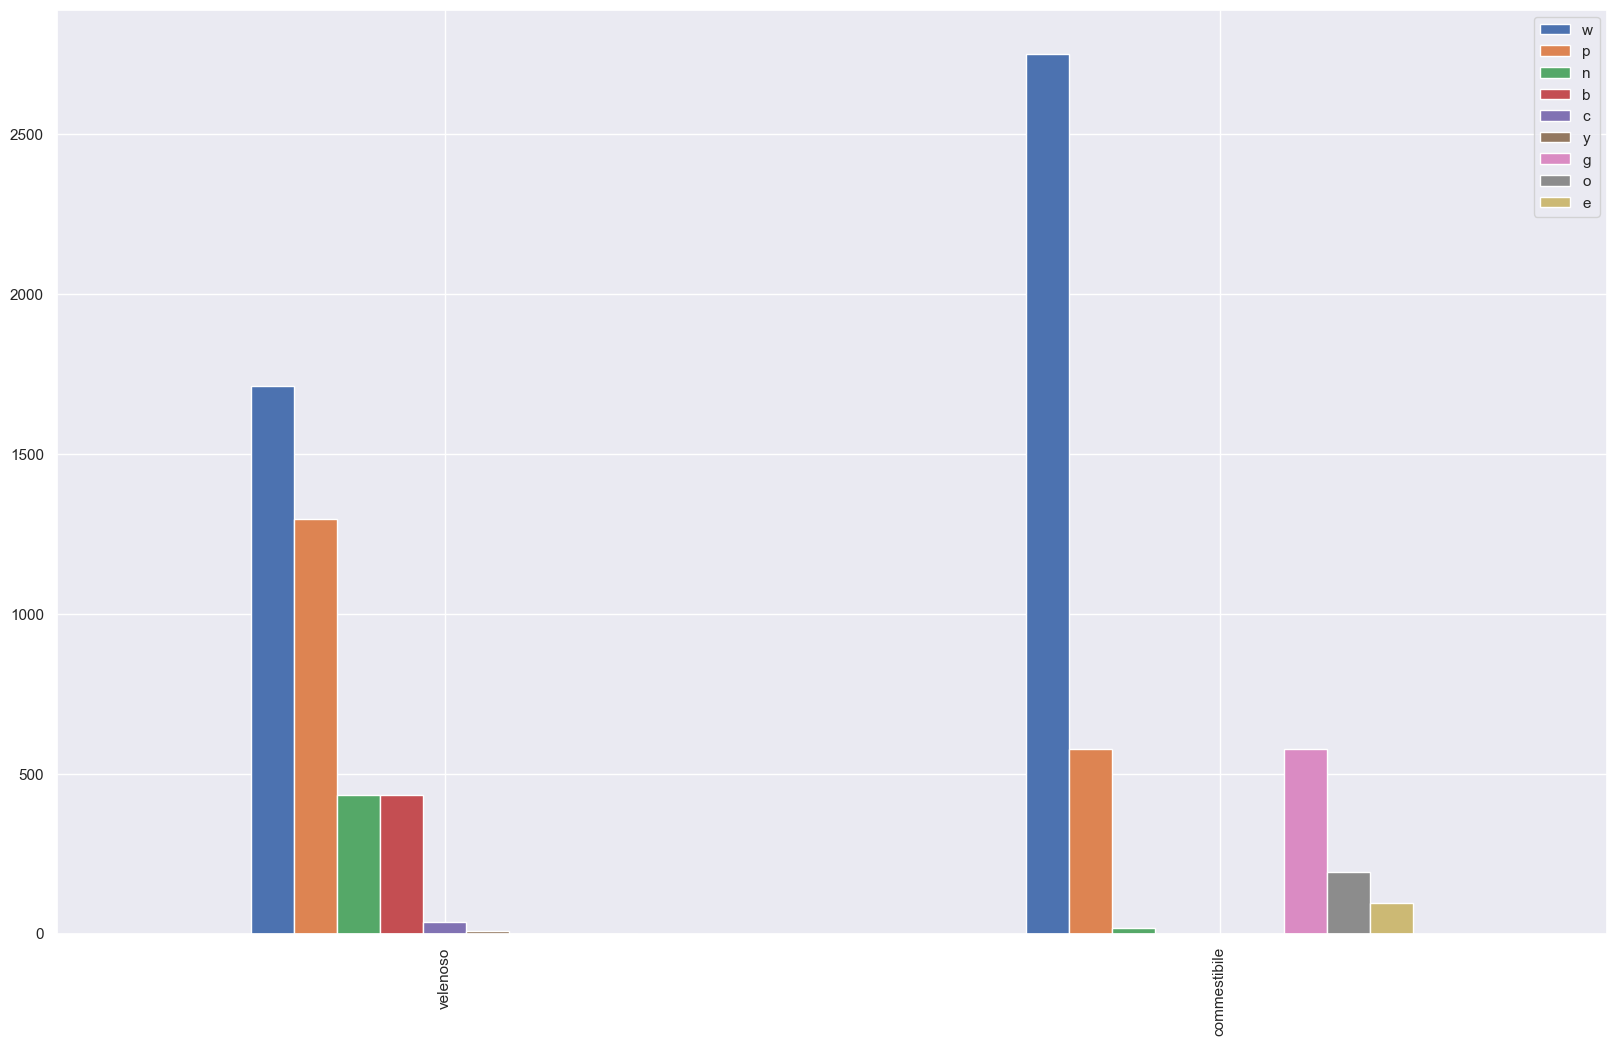

In [567]:
#Effettuiamo lo stesso procedimento per l'attributo stalk-color-above-ring
raffiguraCorrelazioniPer('stalk-color-above-ring').plot(kind="bar")
raffiguraCorrelazioniPer('stalk-color-above-ring')


Notiamo che if (stalk-color-above-ring == b,c y ) => velenoso
if (stalk-color-above-ring == g, o, e ) => commestibile
Notiamo anche che il valore y e c non sono molto rappresentativi (esitono pochi esemplari)

,w,p,n,b,c,y,g,o,e
velenoso,1680.0,1296.0,448.0,432.0,36.0,24.0,0.0,0.0,0.0
commestibile,2704.0,576.0,64.0,0.0,0.0,0.0,576.0,192.0,96.0


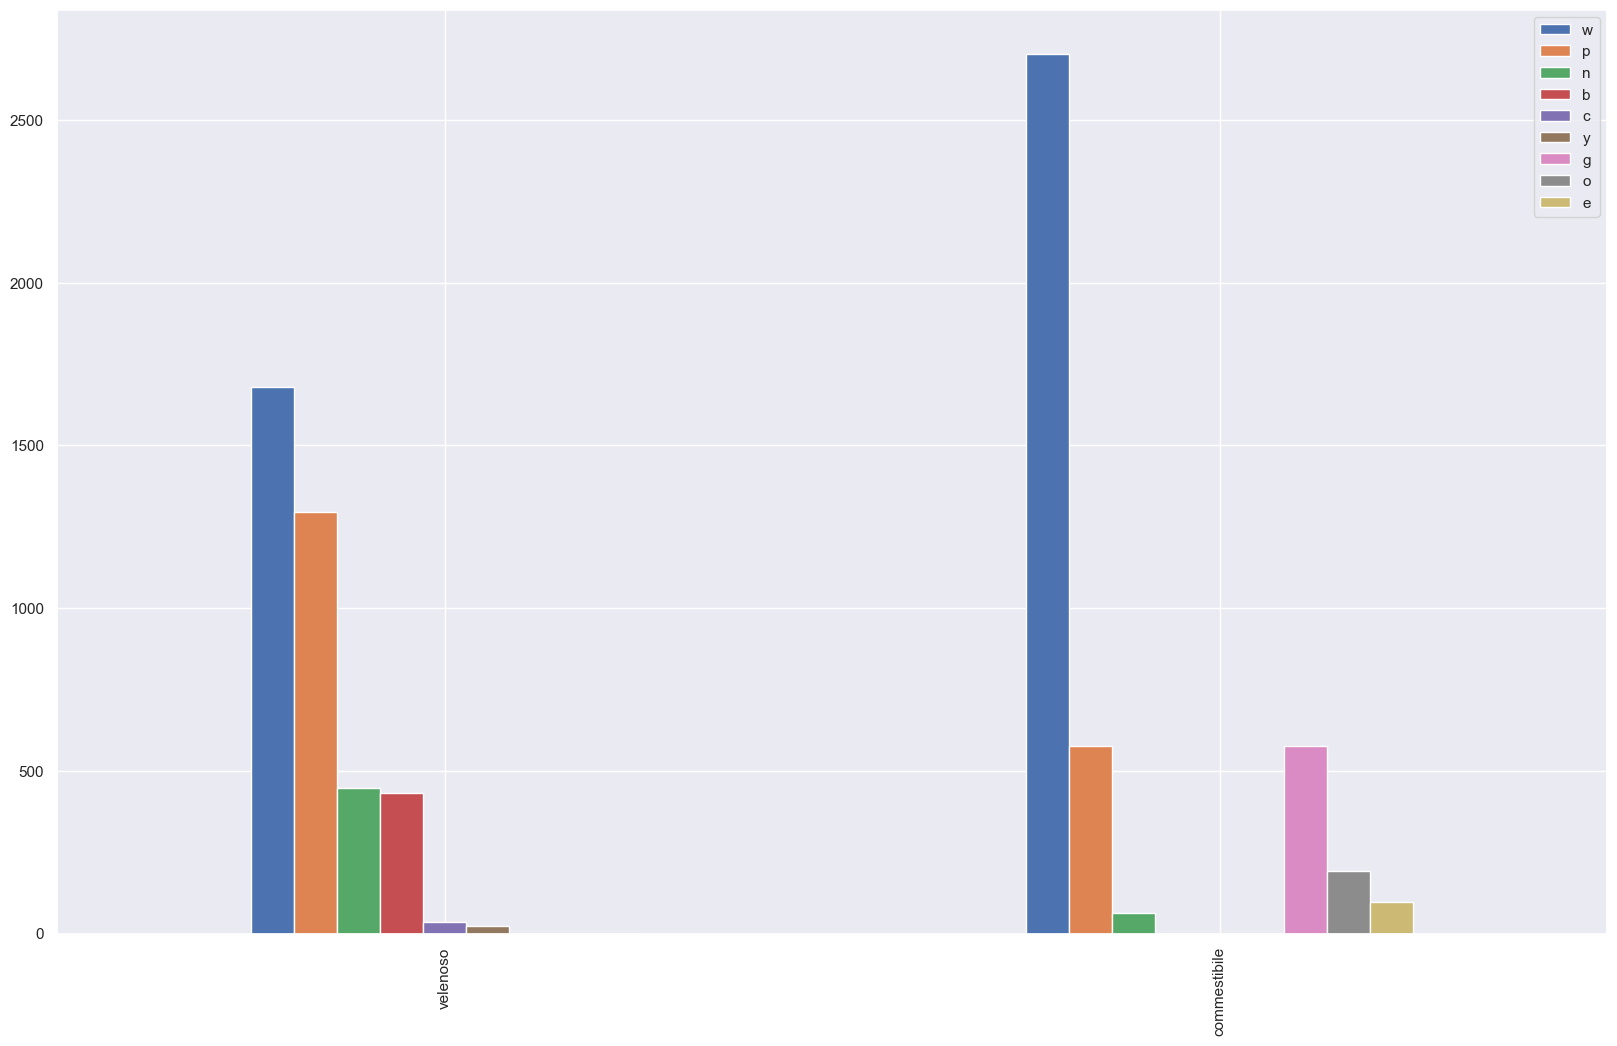

In [568]:
#Effettuiamo lo stesso procedimento per l'attributo stalk-color-below-ring
raffiguraCorrelazioniPer('stalk-color-below-ring').plot(kind="bar")
raffiguraCorrelazioniPer('stalk-color-below-ring')


Anche qui le stesse considerazioni dell'attributo precedente

,w,y,n,o
velenoso,3908.0,8.0,0.0,0.0
commestibile,4016.0,0.0,96.0,96.0


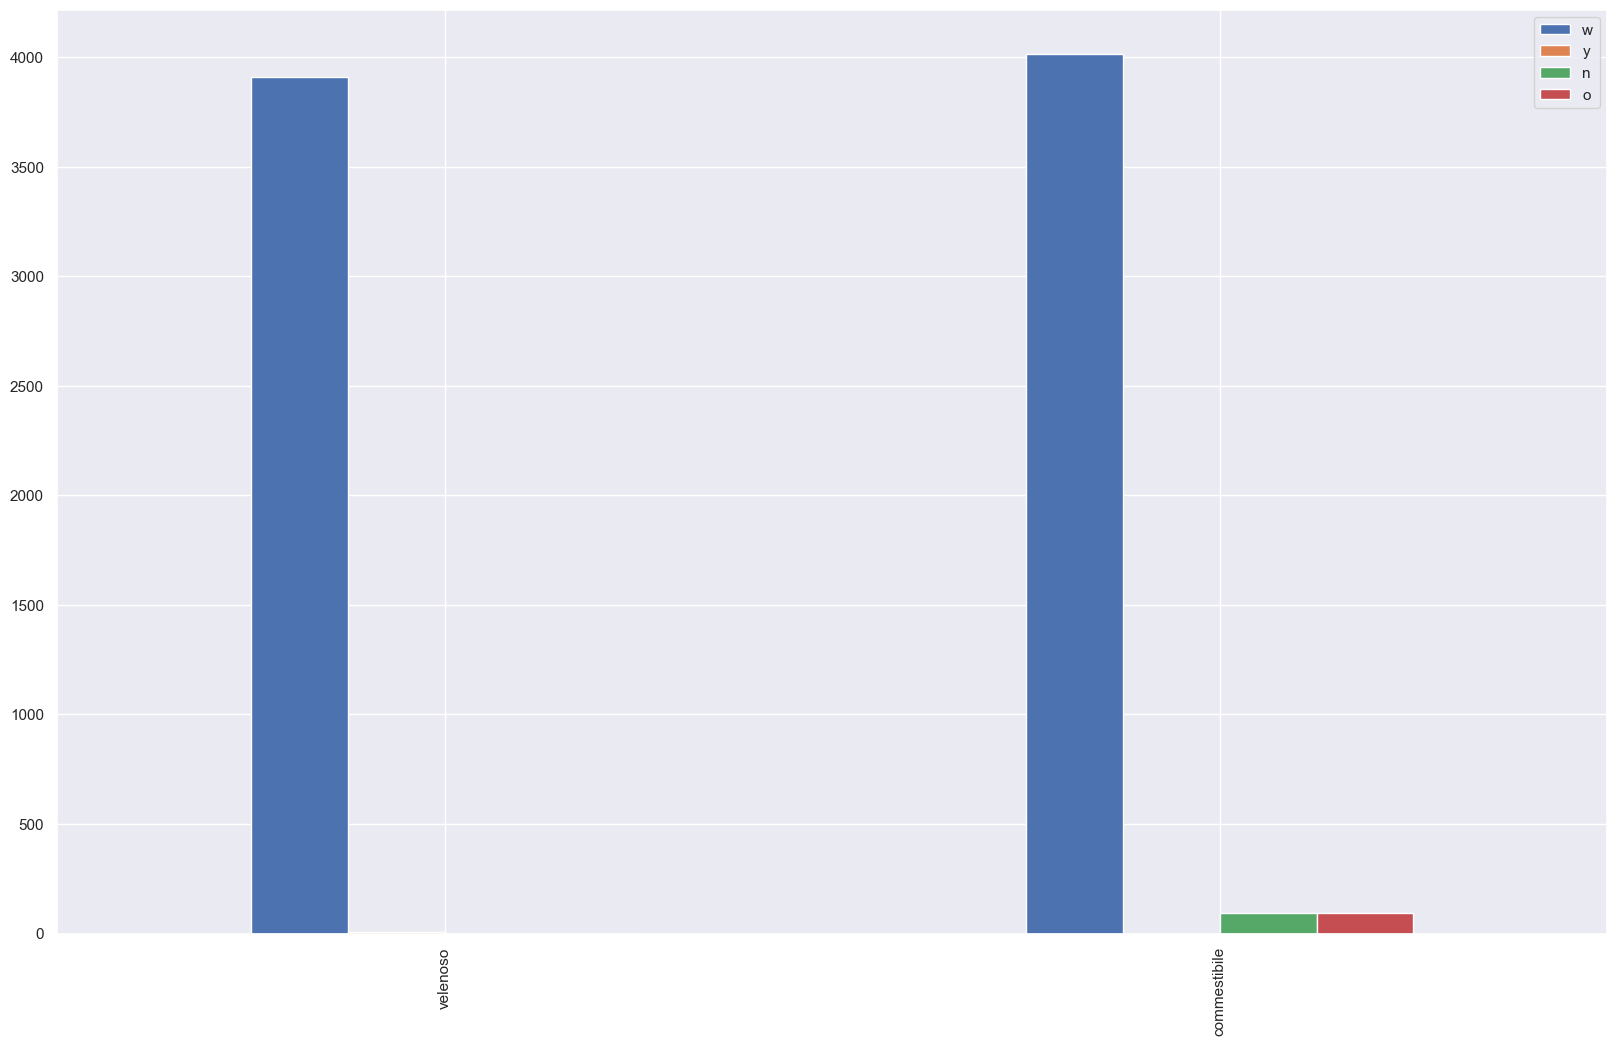

In [569]:
#Effettuiamo lo stesso procedimento per l'attributo veil-color
raffiguraCorrelazioniPer('veil-color').plot(kind="bar")
raffiguraCorrelazioniPer('veil-color')


Qui i casi sono troppo pochi per fare considerazion, qualcosa si può dire sui valori n o (commestibile) e direi nulla su y (velenoso)

,o,t,n
velenoso,3808.0,72.0,36.0
commestibile,3680.0,528.0,0.0


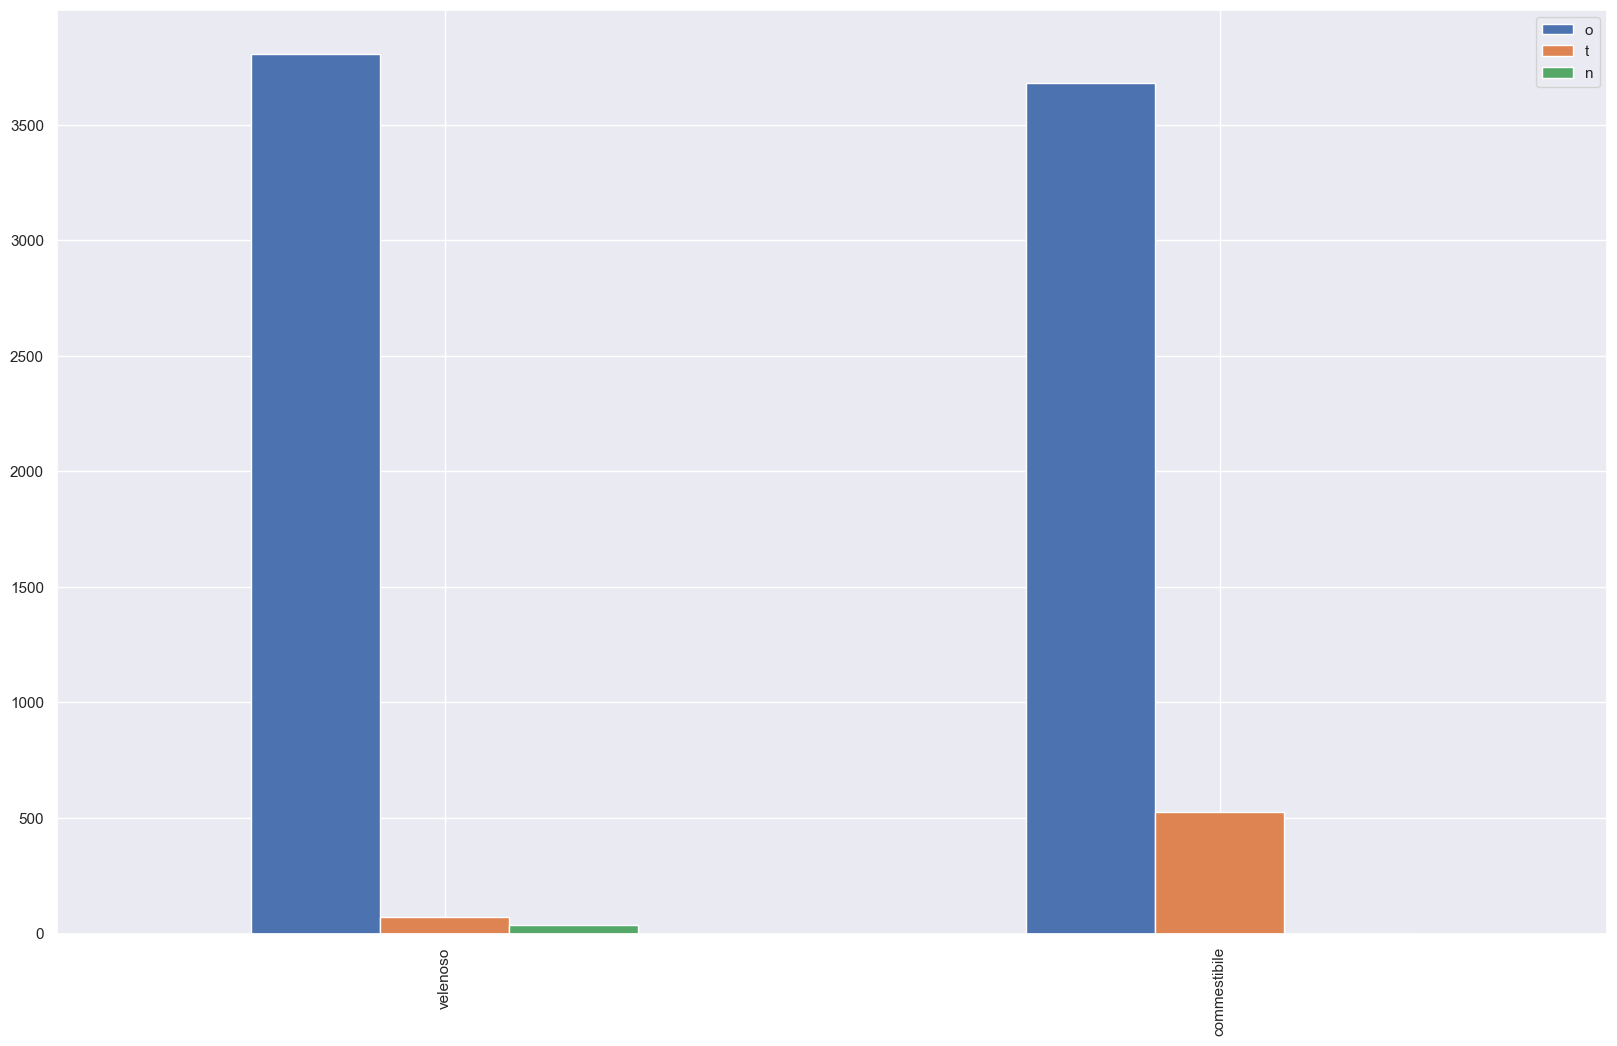

In [570]:
#Effettuiamo lo stesso procedimento per l'attributo ring-number
raffiguraCorrelazioniPer('ring-number').plot(kind="bar")
raffiguraCorrelazioniPer('ring-number')
#Qui si possono fare poche considerazioni

,e,l,p,n,f
velenoso,1768.0,1296.0,816.0,36.0,0.0
commestibile,1008.0,0.0,3152.0,0.0,48.0


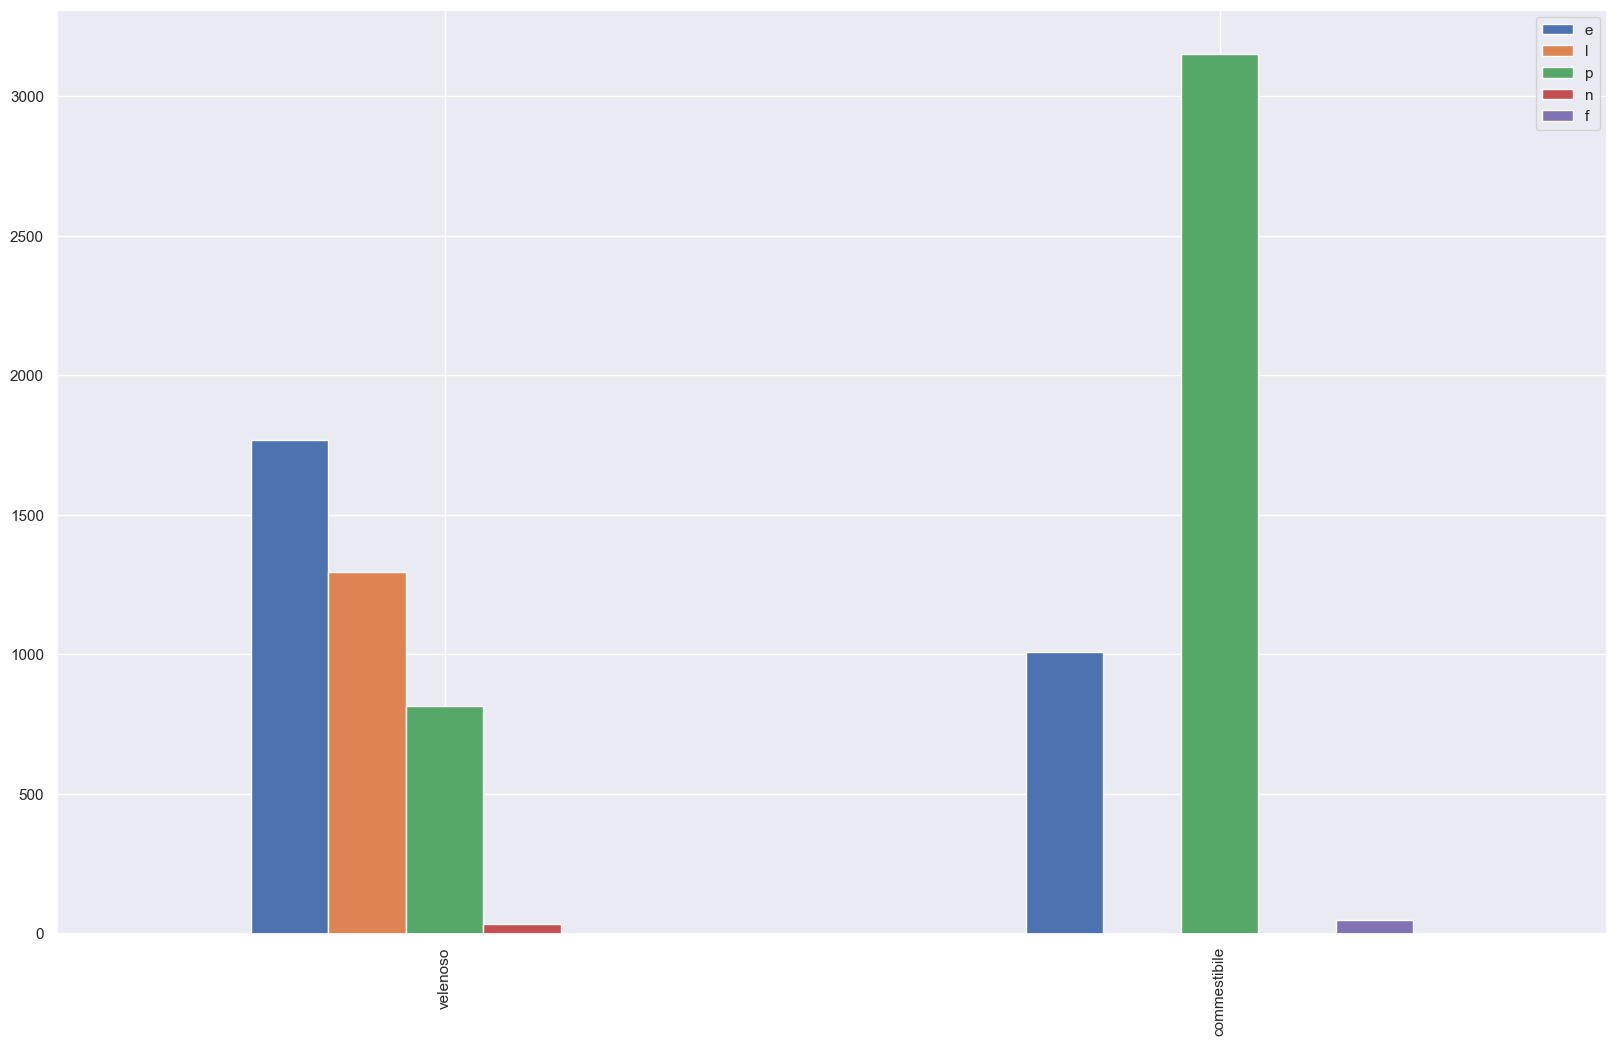

In [571]:
#Effettuiamo lo stesso procedimento per l'attributo ring-number
raffiguraCorrelazioniPer('ring-type').plot(kind="bar")
raffiguraCorrelazioniPer('ring-type')


#Prr quanto riguarda il ring type, se esso assume valori pari a l o n, allora il fungo è velenoso

,w,h,k,n,r,u,o,y,b
velenoso,1812.0,1584.0,224.0,224.0,72.0,0.0,0.0,0.0,0.0
commestibile,576.0,48.0,1648.0,1744.0,0.0,48.0,48.0,48.0,48.0


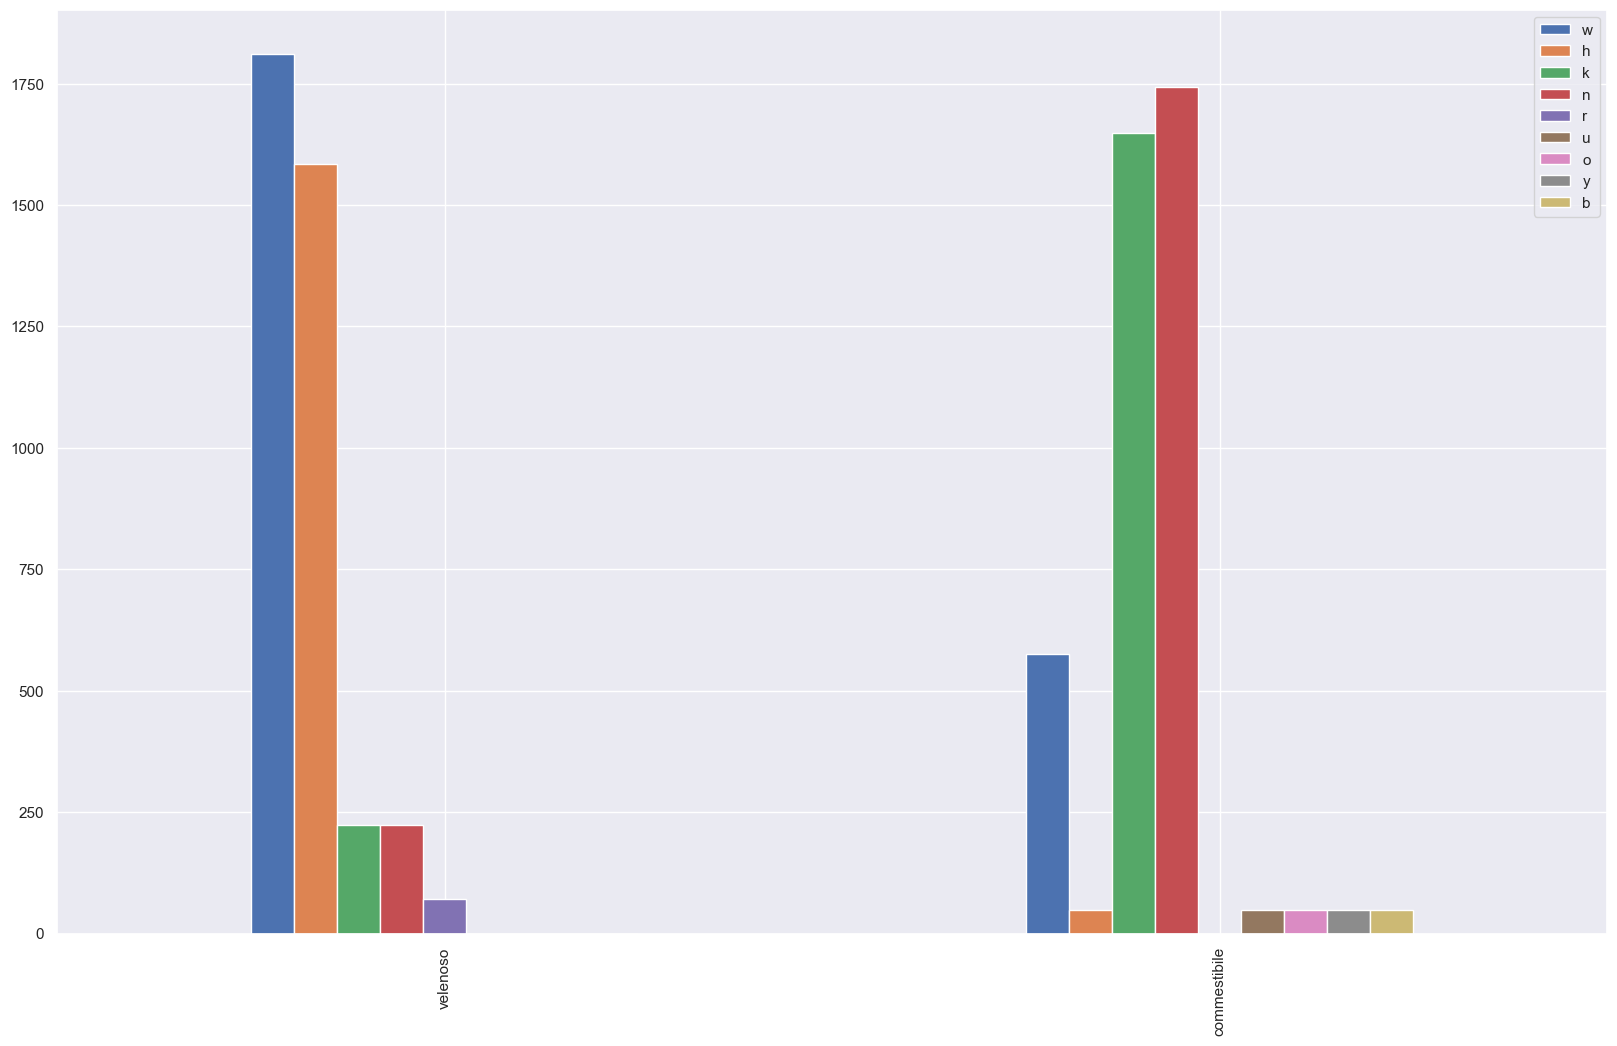

In [572]:
#Effettuiamo lo stesso procedimento per l'attributo spore-print-color
raffiguraCorrelazioniPer('spore-print-color').plot(kind="bar")
raffiguraCorrelazioniPer('spore-print-color')

,v,y,s,c,n,a
velenoso,2848.0,648.0,368.0,52.0,0.0,0.0
commestibile,1192.0,1064.0,880.0,288.0,400.0,384.0


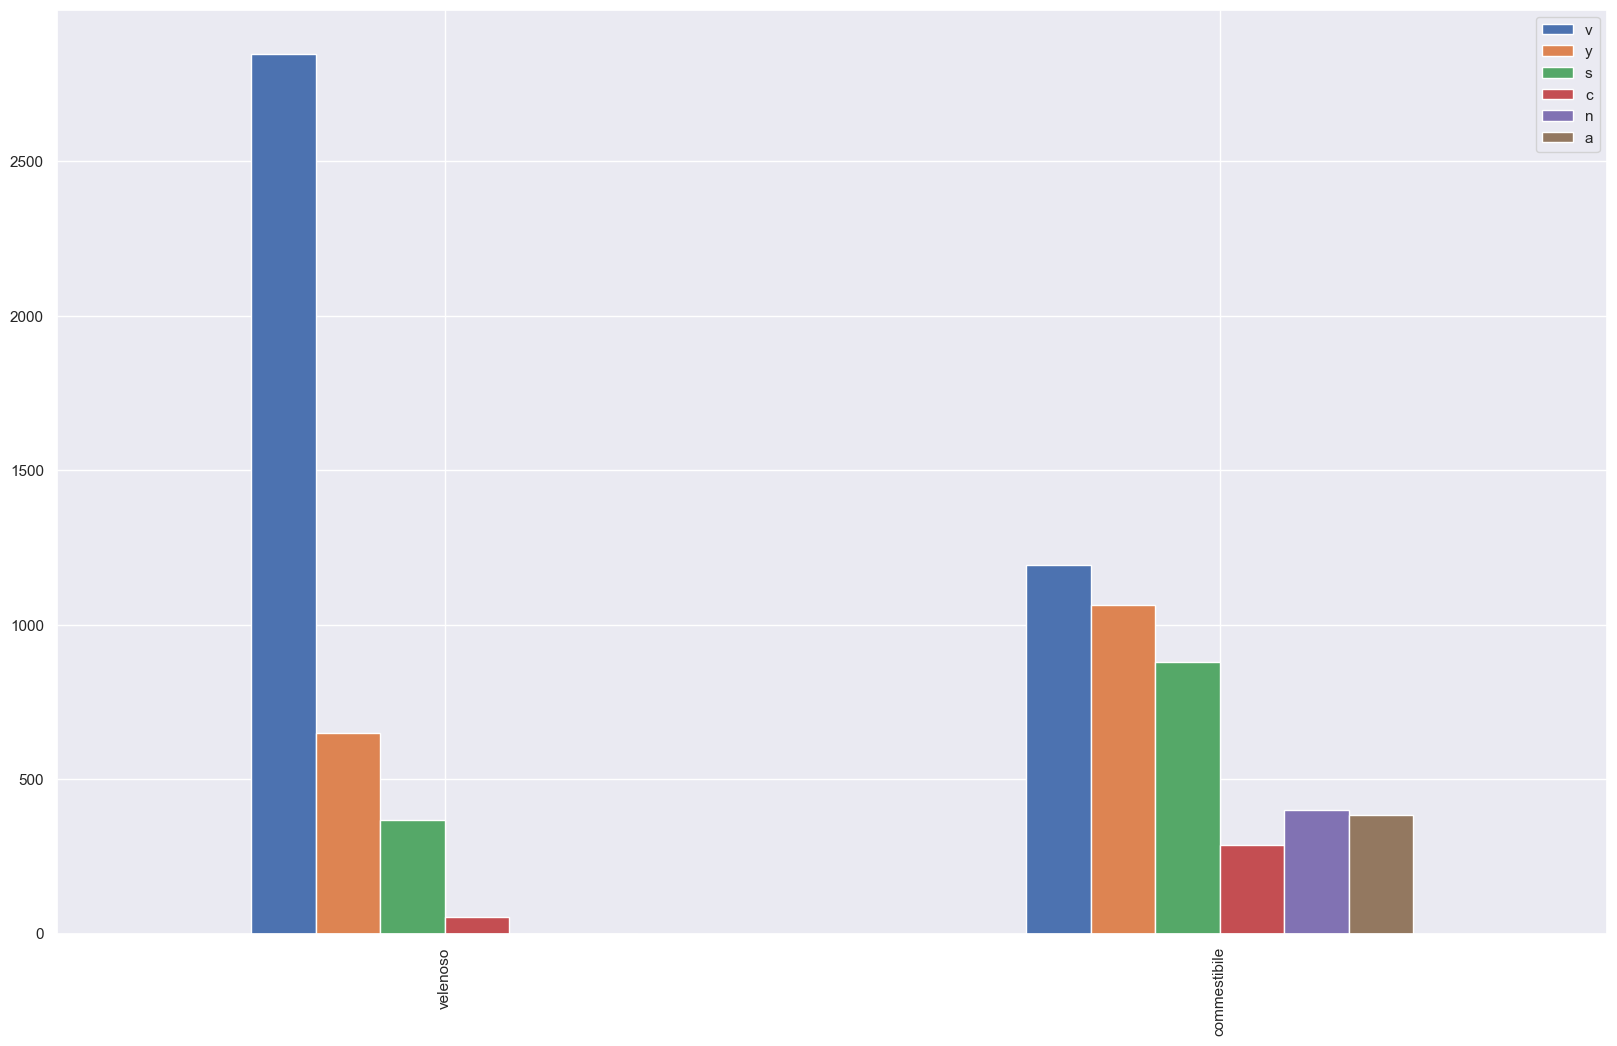

In [573]:
#Effettuiamo lo stesso procedimento per l'attributo population
raffiguraCorrelazioniPer('population').plot(kind="bar")
raffiguraCorrelazioniPer('population')


Se population è n (numerous) || a (abundant) => commestibile

,d,p,g,l,u,m,w
velenoso,1268.0,1008.0,740.0,592.0,272.0,36.0,0.0
commestibile,1880.0,136.0,1408.0,240.0,96.0,256.0,192.0


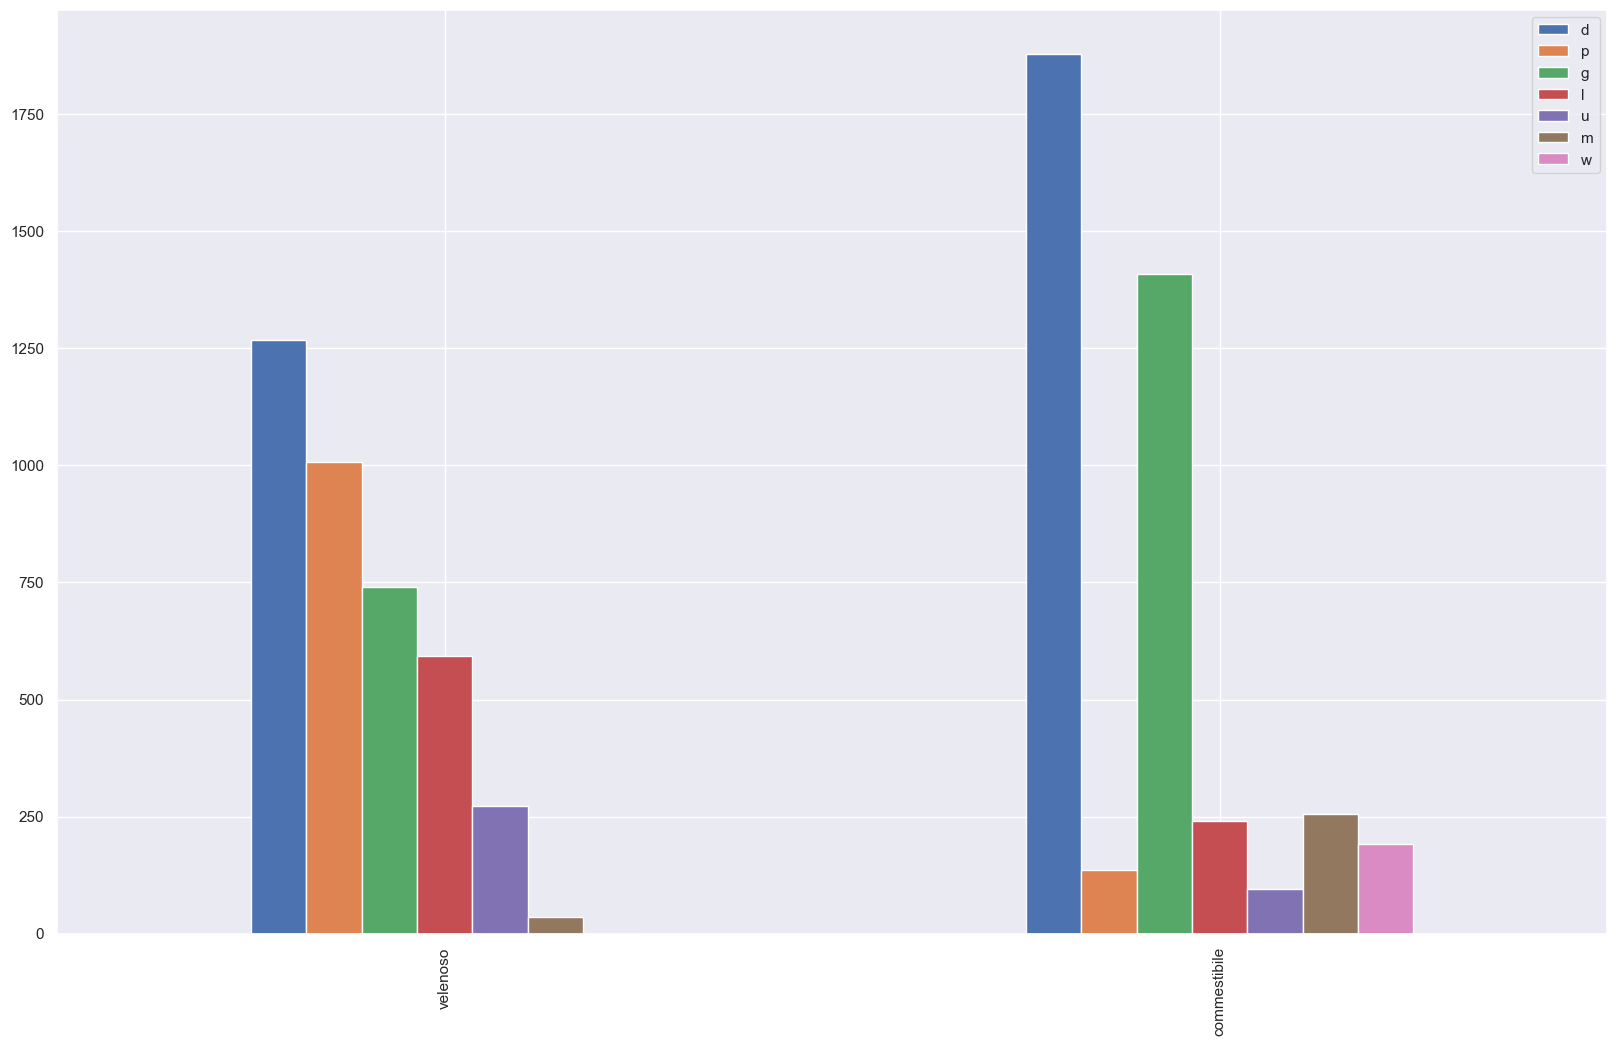

In [574]:
#Effettuiamo lo stesso procedimento per l'attributo habitat
raffiguraCorrelazioniPer('habitat').plot(kind="bar")
raffiguraCorrelazioniPer('habitat')


Se habitat == w (waste) => commestibile

Essenzialmente, possiamo ricavare delle regole base dall'analisi di questi dati:
Per quanto riguarda i funghi velenosi
1)(Odor != a || !=l || !=n) => velenoso
2)(ring type == l) => velenoso
3)(gill-color == b) => velenoso
Per quanto riguarda i funghi commestibili non sono presenti delle regole base molto solide.

L'unico attributo che presenta un numero di funghi commestibili molto alto e pochi velenosi è proprio ("odor" == n || == a || == l),
Il problema è che sono presenti 120 funghi che sono velenosi che assumono il valore di n, ovvero il non odore

Cerchiamo quindi l'esistenza di un attributo che legato al non odore possa ritornare un insieme di funghi solo commestibili

In [575]:
#In df_odor presenti i 120 funghi velenosi che hanno odore = 'n (inodore)
df_odor_velenosi = df[(df['odor'] == 'n') & (df['class'] == 'p')] 

#Verifichiamo quale è il valore di attributo singolo che renda il fungo velenoso
df_odor_velenosi['stalk-shape'].value_counts()
#Dopo aver effettuato alcuni test, notiamo che con il valore di stalk-shape = 'e', tutti i 120 funghi con odor = 'n' sono velenosi

#Eliminiamo quindi i valori che hanno stalk-shape = 'e', in modo da eliminare i funghi velenosi,
# e anche il numero minore possibile di funghi commestibili

df_odor_commestibili = df[(df['odor'] == 'n') & (df['class'] == 'e') & (~(df['stalk-shape'] == 'e'))]
df_odor_commestibili
#Osserviamo che la regola if (odor == 'n' && stalk-shape != 'e') => Commestibilità (Sono presenti 2496 specie commestibili con questa caratteristica)
#Succesivamente, possiamo concatenare anche i valori di 
# (odor == 'a' || 'l') che implicano commestibilità
df_odor_commestibili = df[((df['odor'] == 'n') & (df['class'] == 'e') & (~(df['stalk-shape'] == 'e'))) | (df['odor'] == 'a') | (df['odor'] == 'l')]
df_odor_commestibili
#e otterremo un dataset con 3296 tuple di funghi commestibili ovvero oltre il 78% del totale dei commestibili.
#N.B. Probabilmente esisteranno altri attributi (1 o più) che legati ad odor consentiranno di classificare i funghi commestibili, magari 
#eliminando anche meno tuple rispetto all'attributo stalk-shape = 'e'


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,w,o,p,n,n,m
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,w,o,p,k,n,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4862,e,f,f,g,t,n,f,c,b,u,t,b,s,s,p,p,w,o,p,n,v,d
4872,e,f,y,e,t,n,f,c,b,p,t,b,s,s,g,p,w,o,p,k,v,d
4876,e,f,f,e,t,n,f,c,b,n,t,b,s,s,p,w,w,o,p,n,v,d
4923,e,f,y,e,t,n,f,c,b,u,t,b,s,s,p,w,w,o,p,n,y,d


Quello che abbiamo ottenuto sono 3296 tuple di funghi commestibili, ovvero oltre il 78% del totale dei funghi di quella classe.

Abbiamo appurato che esistono degli attributi molto importanti per la classificazione della velenosità del fungo (ad esempio odor, ma ne abbiamo visti degli altri), in quanto dei singoli valori degli attributi sono condizione sufficiente per la corretta classificazione della velenosità e della la commestibilità del fungo.
Dopo aver analizzato per bene il dataset e visualizzato quali sono gli attributi importanti, effettuo la suddivisione del dataset per effettuare il training e il testing dei modelli.

Suddivido il dataset in 2 parti.
L'80% del dataset viene utilizzato per il training dei diversi modelli, mentre il
20% del dataset viene utilizzato per il testing del modello

In [576]:

#Partendo da questo insieme di dati, differenziamo in 2 il dataset, in modo che venga effettuato il training del modello su una percentuale del 
#dataset (80%), e lasciamo da parte una percentuale del dataset per effettuare il testing del modello (il restante 20%).
#Importiamo quindi sklearn per utilizzare una funzione che effettui la divisione del dataset in 2, ovvero la train_test_split:
train_set, test_set = train_test_split(df_number, test_size=0.2, random_state=42)
train_set.shape, test_set.shape
#Il dataset è stato diviso in train_set (6499 tuple) e test_set(1625 tuple)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df_number, df_number["odor"]):
    strat_train_set = df_number.loc[train_index]
    strat_test_set = df_number.loc[test_index]

compara_proporzioni = pd.DataFrame(
    {   "Overall" : df_number['odor'].value_counts()/len(df),  
        "Stratified" : strat_test_set['odor'].value_counts()/len(strat_test_set),
        "Random" : test_set['odor'].value_counts()/len(test_set)
    }
).sort_index()

compara_proporzioni['% Strat'] = 100*compara_proporzioni['Stratified']/compara_proporzioni['Overall'] -100
compara_proporzioni['% Rand'] = 100*compara_proporzioni['Random']/compara_proporzioni['Overall'] - 100
compara_proporzioni
    
#Notiamo che la stratifiedshufflesplit offre una rappresentazione migliore e più uniforme degli attributi di tipo 'odor'. 
#Per questo motivo opto per la soluzione stratified

,Overall,Stratified,Random,% Strat,% Rand
0,0.049237,0.049231,0.049231,-0.012308,-0.012308
1,0.023634,0.024000,0.022769,1.550000,-3.657692
2,0.265879,0.265846,0.264615,-0.012308,-0.475214
3,0.049237,0.049231,0.057231,-0.012308,16.235692
4,0.004431,0.004308,0.003077,-2.789744,-30.564103
5,0.434269,0.434462,0.427692,0.044375,-1.514390
6,0.031512,0.031385,0.035077,-0.402885,11.314423
7,0.070901,0.070769,0.064615,-0.185897,-8.865385
8,0.070901,0.070769,0.075692,-0.185897,6.757692


In [577]:
#Adesso Effettuiamo una copia del training set in modo che possano essere effettuate delle operazioni su di esso, senza modificare necessariamente
#quello originario.
train_copy = train_set.copy()
test_copy = test_set.copy()

#E selezioniamo i diversi insiemi dal training set e dal test set (nello specifico dividiamo le classi e le features di ogni insieme)
X_train = train_copy.iloc[:,1:]
y_train = train_copy.iloc[:,0]
X_test = test_copy.iloc[:,1:]
y_test = test_copy.iloc[:,0]





Creazione del Dataset per visualizzare i risultati in accuracy, precision e recall dei diversi modelli, sia per quanto riguarda il training e sia per quanto riguarda il testing.

Inserisco su un file csv i risultati di volta in volta, aggiungendo i risultati di ogni modello

In [578]:
nuovodataframe = pd.DataFrame(columns=['nome', 'accuracy', 'recall','precision', 'f1','set'] )
nuovodataframe.to_csv("C:/Users/matte/dataset/Progetto/risultati.csv",index=False)

def risultatoModello(nome, accuracy, precision, recall,f1,set):
    #Lettura del file dei risultati dal file csv
    risultati = pd.read_csv("C:/Users/matte/dataset/Progetto/risultati.csv")
    dict={ 
        'nome': [nome],
        'accuracy': [accuracy],
        'precision': [precision],
        'recall': [recall],
        'f1':[f1],
        'set':[set]  
    }
    temp = pd.DataFrame(dict)
    #Aggiunta del nuovo risultato
    #risultati = risultati.append(dict, ignore_index=True)
    risultati = pd.concat([temp,risultati], ignore_index=True)
    #Salvataggio del file csv
    risultati.to_csv("C:/Users/matte/dataset/Progetto/risultati.csv",index=False)
    return risultati


Applicazione dei diversi modelli di training.

Per effettuare la classificazione del fungo. Ricordiamo che l'attributo target è 'class', che può assumere valori 0 o 1, in base alla commestibilità o alla velenosità del fungo; mentre gli altri 21 sono attributi che rappresentano le caratteristiche del fungo.

Stochastic Gradient Descendent

Esso è un modello di learning supervisionato, quindi richiede dei dati etichettati in fase di training per essere applicato. Esso utilizza lo strumento matematico gradiente - ovvero il vettore delle derivate parziali per tutte le componenti della base canonica -per ricercare il minimo di una funzione di costo (anche chiamata di perdita o di errore). Il modo con cui si arriva al punto di minimo (molto spesso quel minimo non è globale vista la complessità della funzione di costo) è attraverso un parametro che consente di raggiungere prima o dopo quel punto. Questo modello è solitamente applicato in dataset molto grandi e sparsi.
- Vantaggi di questo modello sono l'efficienza e la rapidità.
- Svantaggio di questo modello è il numero di iperparametri che lo rende più complesso da trattare. Inoltre il rumore può inficiare sulle prestazioni da cui può conseguire una più lunga convergenza del gradiente verso il punto di minimo

In [579]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.calibration import cross_val_predict
from sklearn.linear_model import SGDClassifier

#Applicazione del modello Stochastic Gradient Descendent Classifier
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train)



SGDClassifier()

Verifico le prestazioni sul trainSet

In [580]:
y_train_sgd = sgd_clf.predict(X_train)

accuracy_train_sgd = 100*accuracy_score(y_train,y_train_sgd)
precision_train_sgd = 100*precision_score(y_train,y_train_sgd)
recall_train_sgd = 100*recall_score(y_train,y_train_sgd)
f1_train_sgd = 100*f1_score(y_train,y_train_sgd)
print("Accuracy SGD Train:", accuracy_train_sgd ,"%")
print("Precision SGD Train:", precision_train_sgd,"%")
print("Recall SGD Train:", recall_train_sgd,"%")
print("F score SGD Train:", f1_train_sgd,"%")

Accuracy SGD Train: 94.39913832897369 %
Precision SGD Train: 97.36662106703147 %
Recall SGD Train: 90.8423739629866 %
F score SGD Train: 93.99141630901288 %


Creazione curva precision-recall

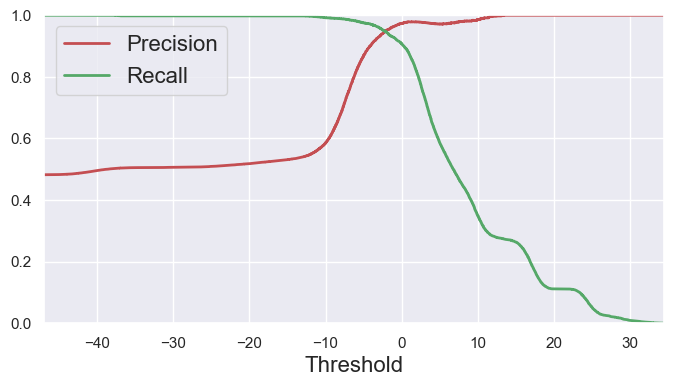

In [581]:
y_scores = sgd_clf.decision_function(X_train)
                             
#Attraverso la decision function, creiamo la precision_recall_curve, composta dai valori di precision e recall al variare
#della threshold, ovvero la soglia per cui un elemento viene caratterizzato come appartenente ad una o all'altra classe
from sklearn.metrics import precision_recall_curve

y_scores = sgd_clf.decision_function(X_train)

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "r-", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([thresholds.min(), thresholds.max()])

plt.show()

Creazione curva ROC

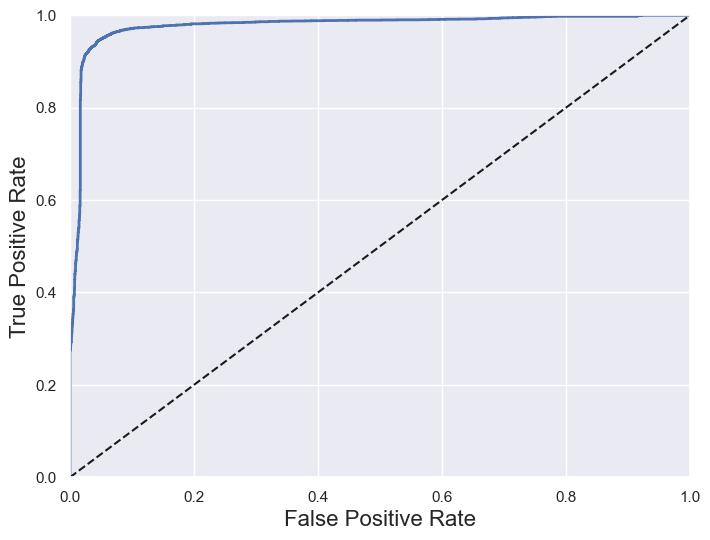

In [582]:
#Un'altra misura per valutare i classificatori binari è la curva ROC/AUC
#Creiamo quindi la curva ROC_AUC, 
#ovvero la curva tra il False Positive Rate - ovvero il rapporto tra Falsi positivi e la somma tra Falsi Positivi e Veri Negativi (che sarebbe
#la somma di tutti  i valori negativi reali) -
#e il True Positive Rate (Recall)

#Sfruttiamo la funzione roc_curve di sklearn per generare i valori di False Positive Rate e True Positive Rate.
from sklearn.metrics import roc_curve


fpr, tpr, thresholds = roc_curve(y_train, y_scores)


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

Stampa valore AUC

In [583]:
#E infine calcoliamo il valore dell'area sottesa la curva ROC, ovvero il valore AUC, che deve essere il più possibile vicino a 1
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train, y_scores)

0.9772432630280364

Verifico le prestazioni sul testSet

In [584]:

y_test_sgd = sgd_clf.predict(X_test)

accuracy_test_sgd = 100*accuracy_score(y_test,y_test_sgd)
precision_test_sgd = 100*precision_score(y_test,y_test_sgd)
recall_test_sgd = 100*recall_score(y_test,y_test_sgd)
f1_test_sgd = 100*f1_score(y_test,y_test_sgd)
print("Accuracy SGD Test:", accuracy_test_sgd ,"%")
print("Precision SGD Test:", precision_test_sgd,"%")
print("Recall SGD Test:", recall_test_sgd,"%")
print("F score SGD Test:", f1_test_sgd,"%")

Accuracy SGD Test: 94.15384615384616 %
Precision SGD Test: 96.35627530364373 %
Recall SGD Test: 91.30434782608695 %
F score SGD Test: 93.76231122783977 %


Salvataggio risultati SGD Base

In [585]:
risultatoModello("SGD",accuracy_train_sgd,precision_train_sgd,recall_train_sgd,f1_train_sgd,"Train")
risultatoModello("SGD",accuracy_test_sgd,precision_test_sgd,recall_test_sgd,f1_test_sgd,"Test")

,nome,accuracy,precision,recall,f1,set
0,SGD,94.153846,96.356275,91.304348,93.762311,Test
1,SGD,94.399138,97.366621,90.842374,93.991416,Train


Utilizzo dell'algoritmo grid-search su SGD, per ricercare i migliori iperparametri. Quello che Grid Search fa è quello di provare tutte le combinazioni di iperparametri, per verificare quale sia la migliore (può essere molto complesso computazionalmente)

Nell'SGD la quantità di iperparametri è molto elevata
Il parametro:
- alpha 
- class_weight
- eta0
- learning_rate rappresenta l'intensità spostamento nella singola iterazione
- loss
- penalty
- max_iter
- tol




In [586]:
from sklearn.model_selection import GridSearchCV

#loss = ['modified_huber','hinge', 'log',  'squared_hinge', 'perceptron']
#penalty = ['l1', 'l2', 'elasticnet']
#alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
#learning_rate = ['invscaling','constant', 'optimal',  'adaptive']
#class_weight = [{1:0.4, 0:0.6}, {1:0.5, 0:0.5},  {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
#eta0 = [1, 10, 100]
#max_iter=[1,5,10,100,500]
#tol=[None,0.001,0.01,0.1,1]
alpha=[0.0001]
class_weight=[{1:0.7, 0:0.3}]
eta0=[100]
learning_rate=['optimal']
loss=['hinge']
penalty=['l1']
max_iter=[500]
tol=[None]


#Effettuiamo il tuning degli iperparametri dell'SGD, per verificare quale offra le migliori prestazioni
param_distributions = dict(loss=loss,
                           penalty=penalty,
                           alpha=alpha,
                           learning_rate=learning_rate,
                           class_weight=class_weight,
                           eta0=eta0,
                           max_iter=max_iter,
                           tol=tol)

gs_SGD = GridSearchCV(sgd_clf, param_distributions, cv=6, verbose=3, n_jobs=-1)
gs_SGD.fit(X_train, y_train)

Fitting 6 folds for each of 1 candidates, totalling 6 fits


GridSearchCV(cv=6, estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [0.0001], 'class_weight': [{0: 0.3, 1: 0.7}],
                         'eta0': [100], 'learning_rate': ['optimal'],
                         'loss': ['hinge'], 'max_iter': [500],
                         'penalty': ['l1'], 'tol': [None]},
             verbose=3)

Visualizzazione degli iperparametri migliori SGD, dopo l'applicazione dell'algoritmo GridSearch.
Stampo anche il valore di accuracy ricavato dall'applicazione dell'SGD con quei determinati parametri

In [587]:
#Questi sono i valori degli iperparametri dell'SGD, e 
print('Parametri Migliori: ',gs_SGD.best_params_)
print('Valore accuracy: ',gs_SGD.best_score_)

Parametri Migliori:  {'alpha': 0.0001, 'class_weight': {1: 0.7, 0: 0.3}, 'eta0': 100, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 500, 'penalty': 'l1', 'tol': None}
Valore accuracy:  0.9847658206498963


Applicazione dei migliori valori degli iperparametri

In [588]:
#Riapplichiamo il modello con i nuovi iperparametri
sgd_clf = SGDClassifier(alpha=0.0001,
                                 class_weight={1:0.7, 0:0.3},
                                 eta0=100,
                                 learning_rate='optimal',
                                 loss='hinge',
                                 penalty='l1',
                                 max_iter=500,
                                 tol=None)
sgd_clf.fit(X_train, y_train)

y_test_sgd = sgd_clf.predict(X_test)

accuracy_test_sgd = 100*accuracy_score(y_test,y_test_sgd)
precision_test_sgd = 100*precision_score(y_test,y_test_sgd)
recall_test_sgd = 100*recall_score(y_test,y_test_sgd)
f1_test_sgd = 100*f1_score(y_test,y_test_sgd)
print("Accuracy SGD Test:", accuracy_test_sgd ,"%")
print("Precision SGD Test:", precision_test_sgd,"%")
print("Recall SGD Test:", recall_test_sgd,"%")
print("F score SGD Test:", f1_test_sgd,"%")

y_train_sgd = sgd_clf.predict(X_train)

accuracy_train_sgd = 100*accuracy_score(y_train,y_train_sgd)
precision_train_sgd = 100*precision_score(y_train,y_train_sgd)
recall_train_sgd = 100*recall_score(y_train,y_train_sgd)
f1_train_sgd = 100*f1_score(y_train,y_train_sgd)
print("Accuracy SGD Train:", accuracy_train_sgd ,"%")
print("Precision SGD Train:", precision_train_sgd,"%")
print("Recall SGD Train:", recall_train_sgd,"%")
print("F score SGD Train:", f1_train_sgd,"%")

Accuracy SGD Test: 98.46153846153847 %
Precision SGD Test: 97.13574097135741 %
Recall SGD Test: 99.74424552429667 %
F score SGD Test: 98.42271293375394 %
Accuracy SGD Train: 98.67671949530697 %
Precision SGD Train: 97.7144646211647 %
Recall SGD Train: 99.58519463943841 %
F score SGD Train: 98.6409608091024 %


Salvataggio dei risultati dopo tuning

In [589]:
risultatoModello("GridSGD",accuracy_train_sgd,precision_train_sgd,recall_train_sgd,f1_train_sgd,"Train")
risultatoModello("GridSGD",accuracy_test_sgd,precision_test_sgd,recall_test_sgd,f1_test_sgd,"Test")

,nome,accuracy,precision,recall,f1,set
0,GridSGD,98.461538,97.135741,99.744246,98.422713,Test
1,GridSGD,98.676719,97.714465,99.585195,98.640961,Train
2,SGD,94.153846,96.356275,91.304348,93.762311,Test
3,SGD,94.399138,97.366621,90.842374,93.991416,Train


Naive Bayes

È un tipo di modello supervisionato, che utilizza un approccio probabilistico per effettuare delle classificazioni. Nello specifico esso modella delle relazioni probabilistiche tra i diversi attributi presenti nel dataset e l'attributo di classificazione. 
- I vantaggi di questo tipo di modelli sono quelli di poter modellare le relazioni all'interno del dataset che sono già di per se non deterministiche, dovuta al rumore dei dati o alla presenza di caratteristiche non modellate dagli attributi.
- Gli svantaggi di questo modello è la limitatezza dei casi in cui può essere applicato, la conoscenza delle probabilità semplici e condizionate tra gli attributi (spesso molto costose), e l'approssimazione del problema.

In [590]:
from sklearn.naive_bayes import GaussianNB

#Implementiamo il modello Naive Bayes
nb=GaussianNB()
#Effettuiamo il fit sui dati in training
nb.fit(X_train,y_train)



GaussianNB()

Visualizzazione prestazioni training

In [591]:
#Il modello base del naive bayes offre le prestazioni peggiori rispetto all'SGD
#Cerchiamo quindi delle migliorie che consentano di migliorare le prestazioni in termini di accuracy, recall e precision.
#Prima di fare ciò effettuiamo delle verifiche sul training set e verifichiamo le performance sul training set

y_train_nb = nb.predict(X_train)

accuracy_train_nb = 100*accuracy_score(y_train,y_train_nb)
precision_train_nb = 100*precision_score(y_train,y_train_nb)
recall_train_nb = 100*recall_score(y_train,y_train_nb)
f1_train_nb = 100*f1_score(y_train,y_train_nb)

print("Accuracy NB Train:", accuracy_train_nb,"%")
print("Precision NB Train:",precision_train_nb,"%")
print("Recall NB Train:",recall_train_nb,"%")
print("F score NB Train:",f1_train_nb,"%")



Accuracy NB Train: 92.3526696414833 %
Precision NB Train: 92.24607497596924 %
Recall NB Train: 91.86343331206126 %
F score NB Train: 92.05435651478815 %


Visualizzazione prestazioni testset

In [592]:
y_test_nb = nb.predict(X_test)

accuracy_test_nb = 100*accuracy_score(y_test,y_test_nb)
precision_test_nb = 100*precision_score(y_test,y_test_nb)
recall_test_nb = 100*recall_score(y_test,y_test_nb)
f1_test_nb = 100*f1_score(y_test,y_test_nb)

print("Accuracy NB Test:", accuracy_test_nb,"%")
print("Precision NB Test:",precision_test_nb,"%")
print("Recall NB Test:",recall_test_nb,"%")
print("F score NB Test:",f1_test_nb,"%")


Accuracy NB Test: 92.18461538461538 %
Precision NB Test: 90.98873591989988 %
Recall NB Test: 92.96675191815856 %
F score NB Test: 91.96710942441493 %


Salvataggio risultati

In [593]:
risultatoModello("NB",accuracy_train_nb,precision_train_nb,recall_train_nb,f1_train_nb,"Train")
risultatoModello("NB",accuracy_test_nb,precision_test_nb,recall_test_nb,f1_test_nb,"Test")

,nome,accuracy,precision,recall,f1,set
0,NB,92.184615,90.988736,92.966752,91.967109,Test
1,NB,92.352670,92.246075,91.863433,92.054357,Train
2,GridSGD,98.461538,97.135741,99.744246,98.422713,Test
3,GridSGD,98.676719,97.714465,99.585195,98.640961,Train
4,SGD,94.153846,96.356275,91.304348,93.762311,Test
5,SGD,94.399138,97.366621,90.842374,93.991416,Train


Effettuiamo quindi un tuning dei parametri del NB attraverso il GridSearch

Il parametro da settare è 'var-smoothing', ovvero la porzione di varianza da aggiungere a tutte le probabilità delle features.

In [594]:

param_grid_nb = { 'var_smoothing': np.logspace(0,-9,num=100)}#10000)}

gs_NB = GridSearchCV(nb, param_grid_nb, cv=6, verbose=3, n_jobs=-1)
gs_NB.fit(X_train, y_train)

Fitting 6 folds for each of 100 candidates, totalling 600 fits


GridSearchCV(cv=6, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.8480358...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=3)

Visualizzazione risultati dopo grid-search

In [595]:
#e visualizziamo la 
print("Valore parametri: ",gs_NB.best_params_)
print(gs_NB.best_score_*100,'%')
#TODO al massimo si può fare un test con diverse priors a mano

Valore parametri:  {'var_smoothing': 0.0002310129700083158}
92.89125578236393 %


Visualizzazione Risultati dopo grid-search

In [596]:
#Riapplichiamo il modello con i nuovi parametri, dato che garantiscono dei migliori livelli di prestazioni
nb=GaussianNB(var_smoothing=2.310129700083158e-05)
#Ri-effettuiamo quindi il fit del training
nb.fit(X_train,y_train)

y_train_nb = nb.predict(X_train)

accuracy_train_nb = 100*accuracy_score(y_train,y_train_nb)
precision_train_nb = 100*precision_score(y_train,y_train_nb)
recall_train_nb = 100*recall_score(y_train,y_train_nb)
f1_train_nb = 100*f1_score(y_train,y_train_nb)

print("Accuracy NB Train:", accuracy_train_nb,"%")
print("Precision NB Train:",precision_train_nb,"%")
print("Recall NB Train:",recall_train_nb,"%")
print("F score NB Train:",f1_train_nb,"%")

#Verifichiamo quindi le metriche di misurazione della bontà della predizioni sul testset

y_test_nb = nb.predict(X_test)

accuracy_test_nb = 100*accuracy_score(y_test,y_test_nb)
precision_test_nb = 100*precision_score(y_test,y_test_nb)
recall_test_nb = 100*recall_score(y_test,y_test_nb)
f1_test_nb = 100*f1_score(y_test,y_test_nb)

print("Accuracy NB Test:", accuracy_test_nb,"%")
print("Precision NB Test:",precision_test_nb,"%")
print("Recall NB Test:",recall_test_nb,"%")
print("F score NB Test:",f1_test_nb,"%")



Accuracy NB Train: 92.59886136328666 %
Precision NB Train: 92.80413036463375 %
Recall NB Train: 91.76770899808552 %
F score NB Train: 92.2830097866196 %
Accuracy NB Test: 92.80000000000001 %
Precision NB Test: 92.14195183776933 %
Recall NB Test: 92.96675191815856 %
F score NB Test: 92.55251432208784 %


Salvataggio Risultati

In [597]:
risultatoModello("GridNB",accuracy_train_nb,precision_train_nb,recall_train_nb,f1_train_nb,"Train")
risultatoModello("GridNB",accuracy_test_nb,precision_test_nb,recall_test_nb,f1_test_nb,"Test")

,nome,accuracy,precision,recall,f1,set
0,GridNB,92.800000,92.141952,92.966752,92.552514,Test
1,GridNB,92.598861,92.804130,91.767709,92.283010,Train
2,NB,92.184615,90.988736,92.966752,91.967109,Test
3,NB,92.352670,92.246075,91.863433,92.054357,Train
4,GridSGD,98.461538,97.135741,99.744246,98.422713,Test
5,GridSGD,98.676719,97.714465,99.585195,98.640961,Train
6,SGD,94.153846,96.356275,91.304348,93.762311,Test
7,SGD,94.399138,97.366621,90.842374,93.991416,Train


SVC

SVC è un tipo di classificatore basato sulle Support Vector Machine (SVM). Il modus operandi di questo modello è la costruzione di un iperpiano di separazione tra le due (o più) classi che appartengono al dataset. Esso utilizza dei vettori di supporto per creare il miglior iperpiano di separazione, in quanto cerca di massimizzare il margine tra i 2 support vector, per ridurre al minimo gli errori di classificazione.
- I vantaggi di questo algoritmo sono la semplicità e la rapidità nel trattare alcuni tipi di problemi, anche con dataset in cui il numero di features è maggiore del numero di tuple, con dei livelli di efficienza molto alti.
- Gli svantaggi di questo tipo di algoritmo riguardano la difficoltà nel trattare dataset molto grandi (numero di tuple elevati), con alti livelli di rumore, e la difficoltà nel trattare dataset in cui la frontiera non può essere suddivisa attraverso degli iperpiani.

In [598]:
from sklearn.svm import SVC

#Dopo aver testato il modello naive bayes, istanziamo l'oggetto SVC che effettuerà una classificazioni utilizzando dei separatori lineari
svc=SVC()
#Effettuiamo quindi il fit del training
svc.fit(X_train,y_train)



SVC()

Verifico prestazioni del modello sul training set

In [599]:
y_train_svc = svc.predict(X_train)

accuracy_train_svc = 100*accuracy_score(y_train,y_train_svc)
precision_train_svc = 100*precision_score(y_train,y_train_svc)
recall_train_svc = 100*recall_score(y_train,y_train_svc)
f1_train_svc = 100*f1_score(y_train,y_train_svc)

print("Accuracy SVC Train:", accuracy_train_svc,"%")
print("Precision SVC Train:",precision_train_svc,"%")
print("Recall SVC Train:",recall_train_svc,"%")
print("F score SVC Train:",f1_train_svc,"%")

Accuracy SVC Train: 99.07678104323742 %
Precision SVC Train: 99.87021414665801 %
Recall SVC Train: 98.21314613911933 %
F score SVC Train: 99.03474903474903 %


Verifichiamo quindi le metriche di misurazione della bontà della predizioni

In [600]:
y_test_svc = svc.predict(X_test)

accuracy_test_svc = 100*accuracy_score(y_test,y_test_svc)
precision_test_svc = 100*precision_score(y_test,y_test_svc)
recall_test_svc = 100*recall_score(y_test,y_test_svc)
f1_test_svc = 100*f1_score(y_test,y_test_svc)

print("Accuracy SVC Test:", accuracy_test_svc,"%")
print("Precision SVC Test:",precision_test_svc,"%")
print("Recall SVC Test:",recall_test_svc,"%")
print("F score SVC Test:",f1_test_svc,"%")

Accuracy SVC Test: 99.38461538461539 %
Precision SVC Test: 99.87080103359173 %
Recall SVC Test: 98.84910485933503 %
F score SVC Test: 99.3573264781491 %


Salvataggio Risultati

In [601]:
risultatoModello("SVC",accuracy_train_svc,precision_train_svc,recall_train_svc,f1_train_svc,"Train")
risultatoModello("SVC",accuracy_test_svc,precision_test_svc,recall_test_svc,f1_test_svc,"Test")

,nome,accuracy,precision,recall,f1,set
0,SVC,99.384615,99.870801,98.849105,99.357326,Test
1,SVC,99.076781,99.870214,98.213146,99.034749,Train
2,GridNB,92.800000,92.141952,92.966752,92.552514,Test
3,GridNB,92.598861,92.804130,91.767709,92.283010,Train
4,NB,92.184615,90.988736,92.966752,91.967109,Test
5,NB,92.352670,92.246075,91.863433,92.054357,Train
6,GridSGD,98.461538,97.135741,99.744246,98.422713,Test
7,GridSGD,98.676719,97.714465,99.585195,98.640961,Train
8,SGD,94.153846,96.356275,91.304348,93.762311,Test
9,SGD,94.399138,97.366621,90.842374,93.991416,Train


Notiamo che i valori sono molto vicini al 100%. Proviamo quindi a raggiungere quella soglia cercando di effettuare il tuning dei parametri
- Utilizziamo quindi la grid search per effettuare una corretta ricerca dei miglior iperparametri
Il parametro kernel è quello che da la forma al separatore
e che consente di creare dei separatori non lineari all'interno del dataset.
Gamma è un parametro applicabile ai separatori con kernel non lineare, quindi rbf e poly, che si riferisce alla curvatura dell'iperpiano
non lineare

In [602]:
param_grid_svc = {  'kernel': ['linear','rbf','poly'],
                    'gamma':[0.1,1,10,100]}

gs_svc = GridSearchCV(svc, param_grid_svc, cv=6, verbose=3, n_jobs=-1)
gs_svc.fit(X_train, y_train)

Fitting 6 folds for each of 12 candidates, totalling 72 fits


GridSearchCV(cv=6, estimator=SVC(), n_jobs=-1,
             param_grid={'gamma': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'poly']},
             verbose=3)

Dopo aver effettuato il tuning, visualizziamo i valori di prestazioni raggiunti

In [603]:
print('Valore accuracy',gs_svc.best_score_*100,'%', 'con parametri', gs_svc.best_params_)

Valore accuracy 100.0 % con parametri {'gamma': 0.1, 'kernel': 'rbf'}


E riapplichiamo il modello con i nuovi parametri, dato che garantiscono dei migliori livelli di prestazioni

In [604]:
svc=SVC(gamma=0.1,kernel='rbf')
#Effettuiamo quindi il fit del training
svc.fit(X_train,y_train)
#e applichiamo il modello al test set
y_test_svc = svc.predict(X_test)
#Verifichiamo quindi le metriche di misurazione della bontà della predizioni sul testset
accuracy_test_svc = 100*accuracy_score(y_test,y_test_svc)
precision_test_svc = 100*precision_score(y_test,y_test_svc)
recall_test_svc = 100*recall_score(y_test,y_test_svc)
f1_test_svc = 100*f1_score(y_test,y_test_svc)

print("Accuracy SVC Test:", accuracy_test_svc,"%")
print("Precision SVC Test:",precision_test_svc,"%")
print("Recall SVC Test:",recall_test_svc,"%")
print("F score SVC Test:",f1_test_svc,"%")

#e sul training set
y_train_svc = svc.predict(X_train)

accuracy_train_svc = 100*accuracy_score(y_train,y_train_svc)
precision_train_svc = 100*precision_score(y_train,y_train_svc)
recall_train_svc = 100*recall_score(y_train,y_train_svc)
f1_train_svc = 100*f1_score(y_train,y_train_svc)

print("Accuracy SVC Train:", accuracy_train_svc,"%")
print("Precision SVC Train:",precision_train_svc,"%")
print("Recall SVC Train:",recall_train_svc,"%")
print("F score SVC Train:",f1_train_svc,"%")

Accuracy SVC Test: 100.0 %
Precision SVC Test: 100.0 %
Recall SVC Test: 100.0 %
F score SVC Test: 100.0 %
Accuracy SVC Train: 100.0 %
Precision SVC Train: 100.0 %
Recall SVC Train: 100.0 %
F score SVC Train: 100.0 %


Salvataggio Risultati

In [605]:
risultatoModello("GridSVC",accuracy_train_svc,precision_train_svc,recall_train_svc,f1_train_svc,"Train")
risultatoModello("GridSVC",accuracy_test_svc,precision_test_svc,recall_test_svc,f1_test_svc,"Test")

,nome,accuracy,precision,recall,f1,set
0,GridSVC,100.000000,100.000000,100.000000,100.000000,Test
1,GridSVC,100.000000,100.000000,100.000000,100.000000,Train
2,SVC,99.384615,99.870801,98.849105,99.357326,Test
3,SVC,99.076781,99.870214,98.213146,99.034749,Train
4,GridNB,92.800000,92.141952,92.966752,92.552514,Test
5,GridNB,92.598861,92.804130,91.767709,92.283010,Train
6,NB,92.184615,90.988736,92.966752,91.967109,Test
7,NB,92.352670,92.246075,91.863433,92.054357,Train
8,GridSGD,98.461538,97.135741,99.744246,98.422713,Test
9,GridSGD,98.676719,97.714465,99.585195,98.640961,Train


KNeighborClassifier

È un algoritmo di classificazione che classifica i punti in base alla classe di appartenenza dei K punti vicini. 
- Il vantaggio di questo algoritmo è la non presenza di alcun modello di classificazione, quindi si possono classificare anche classi che non sono linearmente separabili.
- Gli svantaggi di questo algoritmo risiedono tutto nella misura della distanza, e di tutti i problemi ad esso collegati (problematiche di scala e della giusta misura per cui un punto è più simile ad un altro). La classe di appartenenza è determinata in base al punto più vicino, quindi è suscettibile al rumore dei dati e agli outlier. Inoltre, presenta un costo di classificazione non indifferente (soprattutto se non sono utilizzate delle strutture dati con quad-tree, o KD-Tree), dovuto al calcolo della distanza.

In [606]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

knn_clf.fit(X_train,y_train)




KNeighborsClassifier()

Visualizzazione prestazioni training

In [607]:
y_train_knn = knn_clf.predict(X_train)

accuracy_train_knn = 100*accuracy_score(y_train,y_train_knn)
precision_train_knn = 100*precision_score(y_train,y_train_knn)
recall_train_knn = 100*recall_score(y_train,y_train_knn)
f1_train_knn = 100*f1_score(y_train,y_train_knn)

print("Accuracy KNN Train:", accuracy_train_knn,"%")
print("Precision KNN Train:",precision_train_knn,"%")
print("Recall KNN Train:",recall_train_knn,"%")
print("F score KNN Train:",f1_train_knn,"%")

Accuracy KNN Train: 99.98461301738729 %
Precision KNN Train: 99.96810207336523 %
Recall KNN Train: 100.0 %
F score KNN Train: 99.98404849258255 %


Visualizzazione prestazioni testing

In [608]:
y_test_knn =knn_clf.predict(X_test)

accuracy_test_knn = 100*accuracy_score(y_test,y_test_knn)
precision_test_knn = 100*precision_score(y_test,y_test_knn)
recall_test_knn = 100*recall_score(y_test,y_test_knn)
f1_test_knn = 100*f1_score(y_test,y_test_knn)

print("Accuracy KNN Test:", accuracy_test_knn,"%")
print("Precision KNN Test:",precision_test_knn,"%")
print("Recall KNN Test:",recall_test_knn,"%")
print("F score KNN Test:",f1_test_knn,"%")

Accuracy KNN Test: 99.63076923076923 %
Precision KNN Test: 99.23857868020305 %
Recall KNN Test: 100.0 %
F score KNN Test: 99.61783439490446 %


Salvataggio Risultati

In [609]:
risultatoModello("KNN",accuracy_train_knn,precision_train_knn,recall_train_knn,f1_train_knn,"Train")
risultatoModello("KNN",accuracy_test_knn,precision_test_knn,recall_test_knn,f1_test_knn,"Test")

,nome,accuracy,precision,recall,f1,set
0,KNN,99.630769,99.238579,100.000000,99.617834,Test
1,KNN,99.984613,99.968102,100.000000,99.984048,Train
2,GridSVC,100.000000,100.000000,100.000000,100.000000,Test
3,GridSVC,100.000000,100.000000,100.000000,100.000000,Train
4,SVC,99.384615,99.870801,98.849105,99.357326,Test
5,SVC,99.076781,99.870214,98.213146,99.034749,Train
6,GridNB,92.800000,92.141952,92.966752,92.552514,Test
7,GridNB,92.598861,92.804130,91.767709,92.283010,Train
8,NB,92.184615,90.988736,92.966752,91.967109,Test
9,NB,92.352670,92.246075,91.863433,92.054357,Train


Tuning dell'iperparametro (n_neighbor, che si riferisce al numero dei k punti vicini utilizzati per classificare il punto) del KNeighbor classifier

In [610]:
param_grid_knn = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10] }

gs_knn = GridSearchCV(knn_clf, param_grid_knn, cv=6, verbose=3, n_jobs=-1)
gs_knn.fit(X_train, y_train)

Fitting 6 folds for each of 10 candidates, totalling 60 fits


GridSearchCV(cv=6, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             verbose=3)

Visualizzazione delle prestazioni raggiunte

In [611]:
print('Valore accuracy',gs_knn.best_score_*100,'%', 'con parametri', gs_knn.best_params_)

Valore accuracy 99.96923549567906 % con parametri {'n_neighbors': 1}


Applicazione del modello con i parametri e visualizzazione delle prestazioni

In [612]:
knn_clf = KNeighborsClassifier(1)

knn_clf.fit(X_train,y_train)

y_train_knn = knn_clf.predict(X_train)

accuracy_train_knn = 100*accuracy_score(y_train,y_train_knn)
precision_train_knn = 100*precision_score(y_train,y_train_knn)
recall_train_knn = 100*recall_score(y_train,y_train_knn)
f1_train_knn = 100*f1_score(y_train,y_train_knn)

print("Accuracy KNN Train:", accuracy_train_knn,"%")
print("Precision KNN Train:",precision_train_knn,"%")
print("Recall KNN Train:",recall_train_knn,"%")
print("F score KNN Train:",f1_train_knn,"%")

y_test_knn =knn_clf.predict(X_test)

accuracy_test_knn = 100*accuracy_score(y_test,y_test_knn)
precision_test_knn = 100*precision_score(y_test,y_test_knn)
recall_test_knn = 100*recall_score(y_test,y_test_knn)
f1_test_knn = 100*f1_score(y_test,y_test_knn)

print("Accuracy KNN Test:", accuracy_test_knn,"%")
print("Precision KNN Test:",precision_test_knn,"%")
print("Recall KNN Test:",recall_test_knn,"%")
print("F score KNN Test:",f1_test_knn,"%")



Accuracy KNN Train: 100.0 %
Precision KNN Train: 100.0 %
Recall KNN Train: 100.0 %
F score KNN Train: 100.0 %
Accuracy KNN Test: 99.93846153846154 %
Precision KNN Test: 99.87228607918263 %
Recall KNN Test: 100.0 %
F score KNN Test: 99.93610223642173 %


Salvataggio Risultati

In [613]:
risultatoModello("GridKNN",accuracy_train_knn,precision_train_knn,recall_train_knn,f1_train_knn,"Train")
risultatoModello("GridKNN",accuracy_test_knn,precision_test_knn,recall_test_knn,f1_test_knn,"Test")

,nome,accuracy,precision,recall,f1,set
0,GridKNN,99.938462,99.872286,100.000000,99.936102,Test
1,GridKNN,100.000000,100.000000,100.000000,100.000000,Train
2,KNN,99.630769,99.238579,100.000000,99.617834,Test
3,KNN,99.984613,99.968102,100.000000,99.984048,Train
4,GridSVC,100.000000,100.000000,100.000000,100.000000,Test
5,GridSVC,100.000000,100.000000,100.000000,100.000000,Train
6,SVC,99.384615,99.870801,98.849105,99.357326,Test
7,SVC,99.076781,99.870214,98.213146,99.034749,Train
8,GridNB,92.800000,92.141952,92.966752,92.552514,Test
9,GridNB,92.598861,92.804130,91.767709,92.283010,Train


Decision Tree

Un Decision Tree è un algoritmo di classificazione che si basa sulla costruzione di strutture dati ad albero. Ciò che avviene all'interno dei dati è la scelta della classe in base al valore assunto dagli attributi non target. 
- I vantaggi di questo tipo di classificatore è il basso costo, la velocità di esecuzione (una volta costruito l'albero), la gestione degli outlier e degli attributi ridondanti.
- Lo svantaggio principale è il costo di costruzione dell'albero (soprattutto in termini di memoria), in quanto esso può crescere esponenzialmente con gli attributi (in quanto viene fatto un split sul singolo attributo di volta in volta).
Esso è consigliato quindi nell'analisi di dataset con quantità di attributi non molto elevato e con valori discreti(come nel nostro caso).

In [614]:
from sklearn.tree import DecisionTreeClassifier
#Applicazione del Decision Tree
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)



DecisionTreeClassifier()

Visualizzazione prestazioni train

In [615]:
y_train_dt = dt.predict(X_train)

accuracy_train_dt = 100*accuracy_score(y_train,y_train_dt)
precision_train_dt = 100*precision_score(y_train,y_train_dt)
recall_train_dt = 100*recall_score(y_train,y_train_dt)
f1_train_dt = 100*f1_score(y_train,y_train_dt)

print("Accuracy DT Train:", accuracy_train_dt,"%")
print("Precision DT Train:",precision_train_dt,"%")
print("Recall DT Train:",recall_train_dt,"%")
print("F score DT Train:",f1_train_dt,"%")

Accuracy DT Train: 100.0 %
Precision DT Train: 100.0 %
Recall DT Train: 100.0 %
F score DT Train: 100.0 %


Visualizzazione prestazioni test

In [616]:
y_test_dt = dt.predict(X_test)

accuracy_test_dt = 100*accuracy_score(y_test,y_test_dt)
precision_test_dt = 100*precision_score(y_test,y_test_dt)
recall_test_dt = 100*recall_score(y_test,y_test_dt)
f1_test_dt = 100*f1_score(y_test,y_test_dt)

print("Accuracy DT Test:", accuracy_test_dt,"%")
print("Precision DT Test:",precision_test_dt,"%")
print("Recall DT Test:",recall_test_dt,"%")
print("F score DT Test:",f1_test_dt,"%")

Accuracy DT Test: 100.0 %
Precision DT Test: 100.0 %
Recall DT Test: 100.0 %
F score DT Test: 100.0 %


Salvataggio Risultati

In [617]:
risultatoModello("DT",accuracy_train_dt,precision_train_dt,recall_train_dt,f1_train_dt,"Train")
risultatoModello("DT",accuracy_test_dt,precision_test_dt,recall_test_dt,f1_test_dt,"Test")

,nome,accuracy,precision,recall,f1,set
0,DT,100.000000,100.000000,100.000000,100.000000,Test
1,DT,100.000000,100.000000,100.000000,100.000000,Train
2,GridKNN,99.938462,99.872286,100.000000,99.936102,Test
3,GridKNN,100.000000,100.000000,100.000000,100.000000,Train
4,KNN,99.630769,99.238579,100.000000,99.617834,Test
5,KNN,99.984613,99.968102,100.000000,99.984048,Train
6,GridSVC,100.000000,100.000000,100.000000,100.000000,Test
7,GridSVC,100.000000,100.000000,100.000000,100.000000,Train
8,SVC,99.384615,99.870801,98.849105,99.357326,Test
9,SVC,99.076781,99.870214,98.213146,99.034749,Train


Regressione Logistica

La regressione logistica è un algoritmo di machine learning supervisionato, e partendo da un insieme di dati elabora una distribuzione di pesi w, in modo da classificare correttamente le classi. Successivamente crea la funzione di combinazione lineare tra x e, che sarà passata alla funzione sigmoidea f(z) =1/1+e^(-z), che servirà a classificare le istanze come appartenenti all'una o all'altra classe. Essenzialmente, se la funzione f(z) assumerà valori superiori a 0.5, allora classificherà le istanze come appartenenti alla classe 1, e, in caso contrario, le classificherà come classe 0.

- I vantaggi della regressione logistica sono la facilità di applicazione, la rapidità di predizione della classe di appartenenza ed è semplice da addestrare.

- Gli svantaggi sono la non applicabilità dell'algoritmo nel caso in cui ci fossero più features che tuple all'interno del dataset (andrebbe facilmente in overfitting); inoltre, non può essere applicato per dataset che non siano linearmente separabili e che non presentino delle features continue

In [618]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,y_train)

d:\Programmi\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Visualizzazione prestazioni training

In [619]:
y_train_lr = lr.predict(X_train)

accuracy_train_lr = 100*accuracy_score(y_train,y_train_lr)
precision_train_lr = 100*precision_score(y_train,y_train_lr)
recall_train_lr = 100*recall_score(y_train,y_train_lr)
f1_train_lr = 100*f1_score(y_train,y_train_lr)

print("Accuracy LR Train:", accuracy_train_lr,"%")
print("Precision LR Train:",precision_train_lr,"%")
print("Recall LR Train:",recall_train_lr,"%")
print("F score LR Train:",f1_train_lr,"%")

Accuracy LR Train: 95.27619633789813 %
Precision LR Train: 95.75914535448365 %
Recall LR Train: 94.38417358008935 %
F score LR Train: 95.06668809255986 %


Visualizzazione prestazioni testing

In [620]:
y_test_lr = lr.predict(X_test)

accuracy_test_lr = 100*accuracy_score(y_test,y_test_lr)
precision_test_lr = 100*precision_score(y_test,y_test_lr)
recall_test_lr = 100*recall_score(y_test,y_test_lr)
f1_test_lr = 100*f1_score(y_test,y_test_lr)

print("Accuracy LR Test:", accuracy_test_lr,"%")
print("Precision LR Test:",precision_test_lr,"%")
print("Recall LR Test:",recall_test_lr,"%")
print("F score LR Test:",f1_test_lr,"%")

Accuracy LR Test: 94.7076923076923 %
Precision LR Test: 94.27480916030534 %
Recall LR Test: 94.75703324808184 %
F score LR Test: 94.51530612244898 %


Salvataggio Risultati

In [621]:
risultatoModello("LR",accuracy_train_lr,precision_train_lr,recall_train_lr,f1_train_lr,"Train")
risultatoModello("LR",accuracy_test_lr,precision_test_lr,recall_test_lr,f1_test_lr,"Test")

,nome,accuracy,precision,recall,f1,set
0,LR,94.707692,94.274809,94.757033,94.515306,Test
1,LR,95.276196,95.759145,94.384174,95.066688,Train
2,DT,100.000000,100.000000,100.000000,100.000000,Test
3,DT,100.000000,100.000000,100.000000,100.000000,Train
4,GridKNN,99.938462,99.872286,100.000000,99.936102,Test
5,GridKNN,100.000000,100.000000,100.000000,100.000000,Train
6,KNN,99.630769,99.238579,100.000000,99.617834,Test
7,KNN,99.984613,99.968102,100.000000,99.984048,Train
8,GridSVC,100.000000,100.000000,100.000000,100.000000,Test
9,GridSVC,100.000000,100.000000,100.000000,100.000000,Train


Applicazione GridSearch

In [622]:
param_grid_lr = {'solver': ['newton-cg', 'lbfgs','liblinear', 'sag', 'saga'],
                 'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                 'C': [100, 10, 1.0, 0.1, 0.01]}

gs_lr = GridSearchCV(lr, param_grid_lr, cv=6, verbose=3, n_jobs=-1)
gs_lr.fit(X_train, y_train)

Fitting 6 folds for each of 100 candidates, totalling 600 fits


d:\Programmi\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
270 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Programmi\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Programmi\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "d:\Programmi\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py", line 71, in _check_solver
    raise ValueError("penalty='none' 

GridSearchCV(cv=6, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=3)

In [623]:
print('Valore accuracy',gs_lr.best_score_*100,'%', 'con parametri', gs_lr.best_params_)

Valore accuracy 96.61486815699183 % con parametri {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}


Creo il nuovo modello con i nuovi iperparametri, e stampo i valori sia per il test set e sia per il training set.

In [624]:
lr = LogisticRegression(C=100, penalty='l2', solver= 'liblinear')

lr.fit(X_train,y_train)

y_train_lr = lr.predict(X_train)

accuracy_train_lr = 100*accuracy_score(y_train,y_train_lr)
precision_train_lr = 100*precision_score(y_train,y_train_lr)
recall_train_lr = 100*recall_score(y_train,y_train_lr)
f1_train_lr = 100*f1_score(y_train,y_train_lr)

print("Accuracy LR Train:", accuracy_train_lr,"%")
print("Precision LR Train:",precision_train_lr,"%")
print("Recall LR Train:",recall_train_lr,"%")
print("F score LR Train:",f1_train_lr,"%")

y_test_lr = lr.predict(X_test)

accuracy_test_lr = 100*accuracy_score(y_test,y_test_lr)
precision_test_lr = 100*precision_score(y_test,y_test_lr)
recall_test_lr = 100*recall_score(y_test,y_test_lr)
f1_test_lr = 100*f1_score(y_test,y_test_lr)

print("Accuracy LR Test:", accuracy_test_lr,"%")
print("Precision LR Test:",precision_test_lr,"%")
print("Recall LR Test:",recall_test_lr,"%")
print("F score LR Test:",f1_test_lr,"%")

Accuracy LR Train: 96.73795968610555 %
Precision LR Train: 96.52866242038216 %
Recall LR Train: 96.71346522016592 %
F score LR Train: 96.62097545425566 %
Accuracy LR Test: 96.55384615384615 %
Precision LR Test: 95.71788413098237 %
Recall LR Test: 97.18670076726342 %
F score LR Test: 96.44670050761421 %


Salvataggio Risultati

In [625]:
risultatoModello("GridLR",accuracy_train_lr,precision_train_lr,recall_train_lr,f1_train_lr,"Train")
risultatoModello("GridLR",accuracy_test_lr,precision_test_lr,recall_test_lr,f1_test_lr,"Test")

,nome,accuracy,precision,recall,f1,set
0,GridLR,96.553846,95.717884,97.186701,96.446701,Test
1,GridLR,96.737960,96.528662,96.713465,96.620975,Train
2,LR,94.707692,94.274809,94.757033,94.515306,Test
3,LR,95.276196,95.759145,94.384174,95.066688,Train
4,DT,100.000000,100.000000,100.000000,100.000000,Test
5,DT,100.000000,100.000000,100.000000,100.000000,Train
6,GridKNN,99.938462,99.872286,100.000000,99.936102,Test
7,GridKNN,100.000000,100.000000,100.000000,100.000000,Train
8,KNN,99.630769,99.238579,100.000000,99.617834,Test
9,KNN,99.984613,99.968102,100.000000,99.984048,Train


Voting Classifier

Esso è un algoritmo ensemble, ovvero un algoritmo che mette insieme diversi tipi di algoritmi di machine learning, e utilizza delle tecniche di voting per classificare gli oggetti presenti nel dataset. Sono presenti 2 tipi di votazioni: Hard e Soft.

Hard voting classifica attraverso un sistema maggioritario, quindi un oggetto viene classificato in base alla frequenza delle classificazioni dei singoli modelli. Ad esempio, se un oggetto viene classificato di tipo 1 da 2 modelli su 3, allora la classe di appartenza predetta dal classificatore sarà 1.

Soft voting è basato sulla probabilità di classificazione di ogni singolo modello per ogni singola classe, e combina le probabilità di tutte le classi per effettuare le classificazioni.

- I vantaggi del Voting classifier sono la riduzione dell'errore di classificazione del singolo modello, in quanto gli altri modelli possono "aggiustare" le predizioni del singolo.
- Gli svantaggi derivano proprio dal voting, in quanto se fosse presente un algoritmo che riuscisse a classifcare per bene un particolare dataset, gli altri potrebbero annullare la corretta classificazione effettuata da quell'algoritmo (soprattutto nel caso dell'hard voting); in secondo luogo, il solo fatto di dover addestrare più modelli lo rende più computazionalmente complesso.

In [626]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=[('lr',lr),('nb',nb),('sgd',sgd_clf)],voting='hard')

vc.fit(X_train,y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=100, solver='liblinear')),
                             ('nb',
                              GaussianNB(var_smoothing=2.310129700083158e-05)),
                             ('sgd',
                              SGDClassifier(class_weight={0: 0.3, 1: 0.7},
                                            eta0=100, max_iter=500,
                                            penalty='l1', tol=None))])

Verifico le prestazioni in training

In [627]:
y_train_vc = vc.predict(X_train)

accuracy_train_vc = 100*accuracy_score(y_train,y_train_vc)
precision_train_vc = 100*precision_score(y_train,y_train_vc)
recall_train_vc = 100*recall_score(y_train,y_train_vc)
f1_train_vc = 100*f1_score(y_train,y_train_vc)

print("Accuracy VC Train:", accuracy_train_vc,"%")
print("Precision VC Train:",precision_train_vc,"%")
print("Recall Vc Train:",recall_train_vc,"%")
print("F score VC Train:",f1_train_vc,"%")

Accuracy VC Train: 96.98415140790891 %
Precision VC Train: 96.93290734824281 %
Recall Vc Train: 96.80918953414167 %
F score VC Train: 96.87100893997446 %


Verifico le prestazioni in testing

In [628]:
y_test_vc = vc.predict(X_test)

accuracy_test_vc = 100*accuracy_score(y_test,y_test_vc)
precision_test_vc = 100*precision_score(y_test,y_test_vc)
recall_test_vc = 100*recall_score(y_test,y_test_vc)
f1_test_vc = 100*f1_score(y_test,y_test_vc)

print("Accuracy VC Train:", accuracy_test_vc,"%")
print("Precision VC Train:",precision_test_vc,"%")
print("Recall Vc Train:",recall_test_vc,"%")
print("F score VC Train:",f1_test_vc,"%")

Accuracy VC Train: 96.73846153846154 %
Precision VC Train: 95.96469104665826 %
Recall Vc Train: 97.3145780051151 %
F score VC Train: 96.63492063492063 %


Salvataggio Risultati

In [629]:
risultatoModello("Voting",accuracy_train_vc,precision_train_vc,recall_train_vc,f1_train_vc,"Train")
risultatoModello("Voting",accuracy_test_vc,precision_test_vc,recall_test_vc,f1_test_vc,"Test")

,nome,accuracy,precision,recall,f1,set
0,Voting,96.738462,95.964691,97.314578,96.634921,Test
1,Voting,96.984151,96.932907,96.809190,96.871009,Train
2,GridLR,96.553846,95.717884,97.186701,96.446701,Test
3,GridLR,96.737960,96.528662,96.713465,96.620975,Train
4,LR,94.707692,94.274809,94.757033,94.515306,Test
5,LR,95.276196,95.759145,94.384174,95.066688,Train
6,DT,100.000000,100.000000,100.000000,100.000000,Test
7,DT,100.000000,100.000000,100.000000,100.000000,Train
8,GridKNN,99.938462,99.872286,100.000000,99.936102,Test
9,GridKNN,100.000000,100.000000,100.000000,100.000000,Train


Random Forest

Esso è un classificatore di tipo ensemble, il quale costruisce un insieme di classificatori in fase di training, che saranno poi combinati per effettuare le predizioni sulla classe del test set. Quello che viene effettuato è un bagging di alberi decisionali (decision tree), ovvero una suddivisione del dataset in più parti, in cui viene applicato su ognuno di essi un diverso albero decisionale.
- I vantaggi di questo algoritmo sono la riduzione del overfit del decision tree, il miglioramento dell accuracy e la possibilità di lavorare su attributi non discreti.
- Gli svantaggi sono la più alta complessità di calcolo e consumo di memoria (in quanto devono venir creati più modelli), e la minor interpretabilità dei dati, dato che, aggiungendo dei livelli di astrazione e aggregazione dei dati, è più difficile individuare le relazioni tra essi.

In [630]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train,y_train)

#rf.feature_importances_.argsort()


RandomForestClassifier()

Visualizzazione prestazioni train

In [631]:
y_train_rf = rf.predict(X_train)

accuracy_train_rf = 100*accuracy_score(y_train,y_train_rf)
precision_train_rf = 100*precision_score(y_train,y_train_rf)
recall_train_rf = 100*recall_score(y_train,y_train_rf)
f1_train_rf = 100*f1_score(y_train,y_train_rf)

print("Accuracy RF Train:", accuracy_train_rf,"%")
print("Precision RF Train:",precision_train_rf,"%")
print("Recall RF Train:",recall_train_rf,"%")
print("F score RF Train:",f1_train_rf,"%")

Accuracy RF Train: 100.0 %
Precision RF Train: 100.0 %
Recall RF Train: 100.0 %
F score RF Train: 100.0 %


Visualizzazione prestazioni test

In [632]:
y_test_rf = rf.predict(X_test)

accuracy_test_rf = 100*accuracy_score(y_test,y_test_rf)
precision_test_rf = 100*precision_score(y_test,y_test_rf)
recall_test_rf = 100*recall_score(y_test,y_test_rf)
f1_test_rf = 100*f1_score(y_test,y_test_rf)

print("Accuracy RF Test:", accuracy_test_rf,"%")
print("Precision RF Test:",precision_test_rf,"%")
print("Recall RF Test:",recall_test_rf,"%")
print("F score RF Test:",f1_test_rf,"%")

Accuracy RF Test: 100.0 %
Precision RF Test: 100.0 %
Recall RF Test: 100.0 %
F score RF Test: 100.0 %


Salvataggio Risultati

In [633]:
risultatoModello("RF",accuracy_train_rf,precision_train_rf,recall_train_rf,f1_train_rf,"Train")
risultatoModello("RF",accuracy_test_rf,precision_test_rf,recall_test_rf,f1_test_rf,"Test")

,nome,accuracy,precision,recall,f1,set
0,RF,100.000000,100.000000,100.000000,100.000000,Test
1,RF,100.000000,100.000000,100.000000,100.000000,Train
2,Voting,96.738462,95.964691,97.314578,96.634921,Test
3,Voting,96.984151,96.932907,96.809190,96.871009,Train
4,GridLR,96.553846,95.717884,97.186701,96.446701,Test
5,GridLR,96.737960,96.528662,96.713465,96.620975,Train
6,LR,94.707692,94.274809,94.757033,94.515306,Test
7,LR,95.276196,95.759145,94.384174,95.066688,Train
8,DT,100.000000,100.000000,100.000000,100.000000,Test
9,DT,100.000000,100.000000,100.000000,100.000000,Train


Rete Neurale (MLP)

Una rete neurale è un modello di machine learning che cerca di simulare il comportamento dei neuroni presenti all'interno del cervello umano. Esso è formato da un insieme da nodi (chiamati percettroni) che ad un'insieme di input, restituisce un output in base alla funzione di attivazione, ovvero quella funzione che dati in input i diversi ingressi moltiplicati per i pesi corrispondenti, restituisce un valore tra 0 e 1. Una rete neurale è formata da più livelli, ognuno di essi composto da un insieme di nodi. Tra il livello di Input e il livello di Output esistono una serie di strati nascosti , che sono collegati agli output dei livelli precedenti. Ogni collegamento tra un neurone e l'altro è pesato, e viene utilizzato anche un valore di errore (bias) da inserire in input. Ogni nodo funzione come un percettrone, ovvero al valore di input viene dato in pasto ad una funzione di attivazione, che poi restituirà al livello successivo. In fase di training ciò che l'algoritmo fa è quello di modificare i valori dei pesi e dei bias (utilizzando, ad esempio, il metodo del gradiente stocastico, che serve a minimizzare la funzione di costo, ovvero la funzione contenente tutti gli errori di attivazione).

N.B. Per funzioni molto complesse arrivare a un punto di minimo globale con SGD risulta essere molto difficile 

In [634]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='sgd',hidden_layer_sizes=(5), max_iter=1000)
mlp.fit(X_train,y_train)


MLPClassifier(hidden_layer_sizes=5, max_iter=1000, solver='sgd')

E verifico le prestazioni in Training e Testing

In [635]:
y_train_mlp = mlp.predict(X_train)

accuracy_train_mlp = 100*accuracy_score(y_train,y_train_mlp)
precision_train_mlp = 100*precision_score(y_train,y_train_mlp)
recall_train_mlp = 100*recall_score(y_train,y_train_mlp)
f1_train_mlp = 100*f1_score(y_train,y_train_mlp)

print("Accuracy MLP Train:", accuracy_train_mlp,"%")
print("Precision MLP Train:",precision_train_mlp,"%")
print("Recall MLP Train:",recall_train_mlp,"%")
print("F score MLP Train:",f1_train_mlp,"%")

y_test_mlp = mlp.predict(X_test)

accuracy_test_mlp = 100*accuracy_score(y_test,y_test_mlp)
precision_test_mlp = 100*precision_score(y_test,y_test_mlp)
recall_test_mlp = 100*recall_score(y_test,y_test_mlp)
f1_test_mlp = 100*f1_score(y_test,y_test_mlp)

print("Accuracy MLP Test:", accuracy_test_mlp,"%")
print("Precision MLP Test:",precision_test_mlp,"%")
print("Recall MLP Test:",recall_test_mlp,"%")
print("F score MLP Test:",f1_test_mlp,"%")



Accuracy MLP Train: 98.70749346053239 %
Precision MLP Train: 99.28894634776988 %
Recall MLP Train: 98.02169751116784 %
F score MLP Train: 98.65125240847784 %
Accuracy MLP Test: 98.76923076923076 %
Precision MLP Test: 98.97172236503856 %
Recall MLP Test: 98.46547314578005 %
F score MLP Test: 98.71794871794873 %


salvataggio dei risultati

In [636]:
risultatoModello("MLP(5)",accuracy_train_mlp,precision_train_mlp,recall_train_mlp,f1_train_mlp,"Train")
risultatoModello("MLP(5)",accuracy_test_mlp,precision_test_mlp,recall_test_mlp,f1_test_mlp,"Test")

,nome,accuracy,precision,recall,f1,set
0,MLP(5),98.769231,98.971722,98.465473,98.717949,Test
1,MLP(5),98.707493,99.288946,98.021698,98.651252,Train
2,RF,100.000000,100.000000,100.000000,100.000000,Test
3,RF,100.000000,100.000000,100.000000,100.000000,Train
4,Voting,96.738462,95.964691,97.314578,96.634921,Test
5,Voting,96.984151,96.932907,96.809190,96.871009,Train
6,GridLR,96.553846,95.717884,97.186701,96.446701,Test
7,GridLR,96.737960,96.528662,96.713465,96.620975,Train
8,LR,94.707692,94.274809,94.757033,94.515306,Test
9,LR,95.276196,95.759145,94.384174,95.066688,Train


Notiamo che utilizzando 1 solo hidden layer di 5 neuroni , le prestazioni sono oltre il 95%, quindi proviamo a utilizzare diverse configurazioni di hidden layer in modo da arrivare al 100%.
Utilizziamo Grid Search per ricercare il numero migliore di Hidden Layer. 

In [637]:
param_grid_mlp = {'hidden_layer_sizes':[(8),(10),(8,8),(10,10),(8,8,8),(10,10,10),(20),(20,20),(20,20,20),(100)],
                    'solver': ['sgd','adam','lbfgs']}

gs_mlp = GridSearchCV(mlp, param_grid_mlp, cv=6, verbose=3, n_jobs=-1)
gs_mlp.fit(X_train, y_train)

Fitting 6 folds for each of 30 candidates, totalling 180 fits


GridSearchCV(cv=6,
             estimator=MLPClassifier(hidden_layer_sizes=5, max_iter=1000,
                                     solver='sgd'),
             n_jobs=-1,
             param_grid={'hidden_layer_sizes': [8, 10, (8, 8), (10, 10),
                                                (8, 8, 8), (10, 10, 10), 20,
                                                (20, 20), (20, 20, 20), 100],
                         'solver': ['sgd', 'adam', 'lbfgs']},
             verbose=3)

In [638]:
print('Valore accuracy',gs_mlp.best_score_*100,'%', 'con parametri', gs_mlp.best_params_)

Valore accuracy 100.0 % con parametri {'hidden_layer_sizes': 8, 'solver': 'adam'}


In [639]:
mlp = MLPClassifier(hidden_layer_sizes=(8,8), solver='adam', max_iter=1000)

mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(8, 8), max_iter=1000)

In [640]:
y_train_mlp = mlp.predict(X_train)

accuracy_train_mlp = 100*accuracy_score(y_train,y_train_mlp)
precision_train_mlp = 100*precision_score(y_train,y_train_mlp)
recall_train_mlp = 100*recall_score(y_train,y_train_mlp)
f1_train_mlp = 100*f1_score(y_train,y_train_mlp)

print("Accuracy MLP Train:", accuracy_train_mlp,"%")
print("Precision MLP Train:",precision_train_mlp,"%")
print("Recall MLP Train:",recall_train_mlp,"%")
print("F score MLP Train:",f1_train_mlp,"%")

y_test_mlp = mlp.predict(X_test)

accuracy_test_mlp = 100*accuracy_score(y_test,y_test_mlp)
precision_test_mlp = 100*precision_score(y_test,y_test_mlp)
recall_test_mlp = 100*recall_score(y_test,y_test_mlp)
f1_test_mlp = 100*f1_score(y_test,y_test_mlp)

print("Accuracy MLP Test:", accuracy_test_mlp,"%")
print("Precision MLP Test:",precision_test_mlp,"%")
print("Recall MLP Test:",recall_test_mlp,"%")
print("F score MLP Test:",f1_test_mlp,"%")


Accuracy MLP Train: 100.0 %
Precision MLP Train: 100.0 %
Recall MLP Train: 100.0 %
F score MLP Train: 100.0 %
Accuracy MLP Test: 100.0 %
Precision MLP Test: 100.0 %
Recall MLP Test: 100.0 %
F score MLP Test: 100.0 %


Salvataggio dei risultati

In [641]:
risultatoModello("MLP(8,8)",accuracy_train_mlp,precision_train_mlp,recall_train_mlp,f1_train_mlp,"Train")
risultatoModello("MLP(8,8)",accuracy_test_mlp,precision_test_mlp,recall_test_mlp,f1_test_mlp,"Test")

,nome,accuracy,precision,recall,f1,set
0,"MLP(8,8)",100.000000,100.000000,100.000000,100.000000,Test
1,"MLP(8,8)",100.000000,100.000000,100.000000,100.000000,Train
2,MLP(5),98.769231,98.971722,98.465473,98.717949,Test
3,MLP(5),98.707493,99.288946,98.021698,98.651252,Train
4,RF,100.000000,100.000000,100.000000,100.000000,Test
5,RF,100.000000,100.000000,100.000000,100.000000,Train
6,Voting,96.738462,95.964691,97.314578,96.634921,Test
7,Voting,96.984151,96.932907,96.809190,96.871009,Train
8,GridLR,96.553846,95.717884,97.186701,96.446701,Test
9,GridLR,96.737960,96.528662,96.713465,96.620975,Train


- Data Processing 2

Prima di procedere alla visualizzazione dei risultati, noto che nel Decision Tree sono presenti degli attributi che non vengono presi in considerazione dall'algoritmo per la classificazione. 


Importanza delle features dt : [0.         0.00362644 0.         0.02777269 0.03746317 0.
 0.         0.11671717 0.33692629 0.02322861 0.00970566 0.
 0.00189668 0.02235987 0.         0.         0.00265157 0.
 0.21302621 0.18064443 0.02398121]
Ordine di importanza delle features dt : [ 0  2 17  5  6 15 14 11 12 16  1 10 13  9 20  3  4  7 19 18  8]


[Text(0.43478260869565216, 0.9375, 'x[8] <= 3.5\ngini = 0.499\nsamples = 6499\nvalue = [3365, 3134]'),
 Text(0.21739130434782608, 0.8125, 'x[19] <= 3.5\ngini = 0.279\nsamples = 2644\nvalue = [443, 2201]'),
 Text(0.08695652173913043, 0.6875, 'x[18] <= 1.5\ngini = 0.214\nsamples = 476\nvalue = [418, 58]'),
 Text(0.043478260869565216, 0.5625, 'gini = 0.0\nsamples = 39\nvalue = [0, 39]'),
 Text(0.13043478260869565, 0.5625, 'x[20] <= 0.5\ngini = 0.083\nsamples = 437\nvalue = [418, 19]'),
 Text(0.08695652173913043, 0.4375, 'gini = 0.0\nsamples = 19\nvalue = [0, 19]'),
 Text(0.17391304347826086, 0.4375, 'gini = 0.0\nsamples = 418\nvalue = [418, 0]'),
 Text(0.34782608695652173, 0.6875, 'x[10] <= 2.0\ngini = 0.023\nsamples = 2168\nvalue = [25, 2143]'),
 Text(0.30434782608695654, 0.5625, 'x[12] <= 0.5\ngini = 0.008\nsamples = 2152\nvalue = [9, 2143]'),
 Text(0.2608695652173913, 0.4375, 'x[1] <= 2.5\ngini = 0.453\nsamples = 26\nvalue = [9, 17]'),
 Text(0.21739130434782608, 0.3125, 'gini = 0.0\nsa

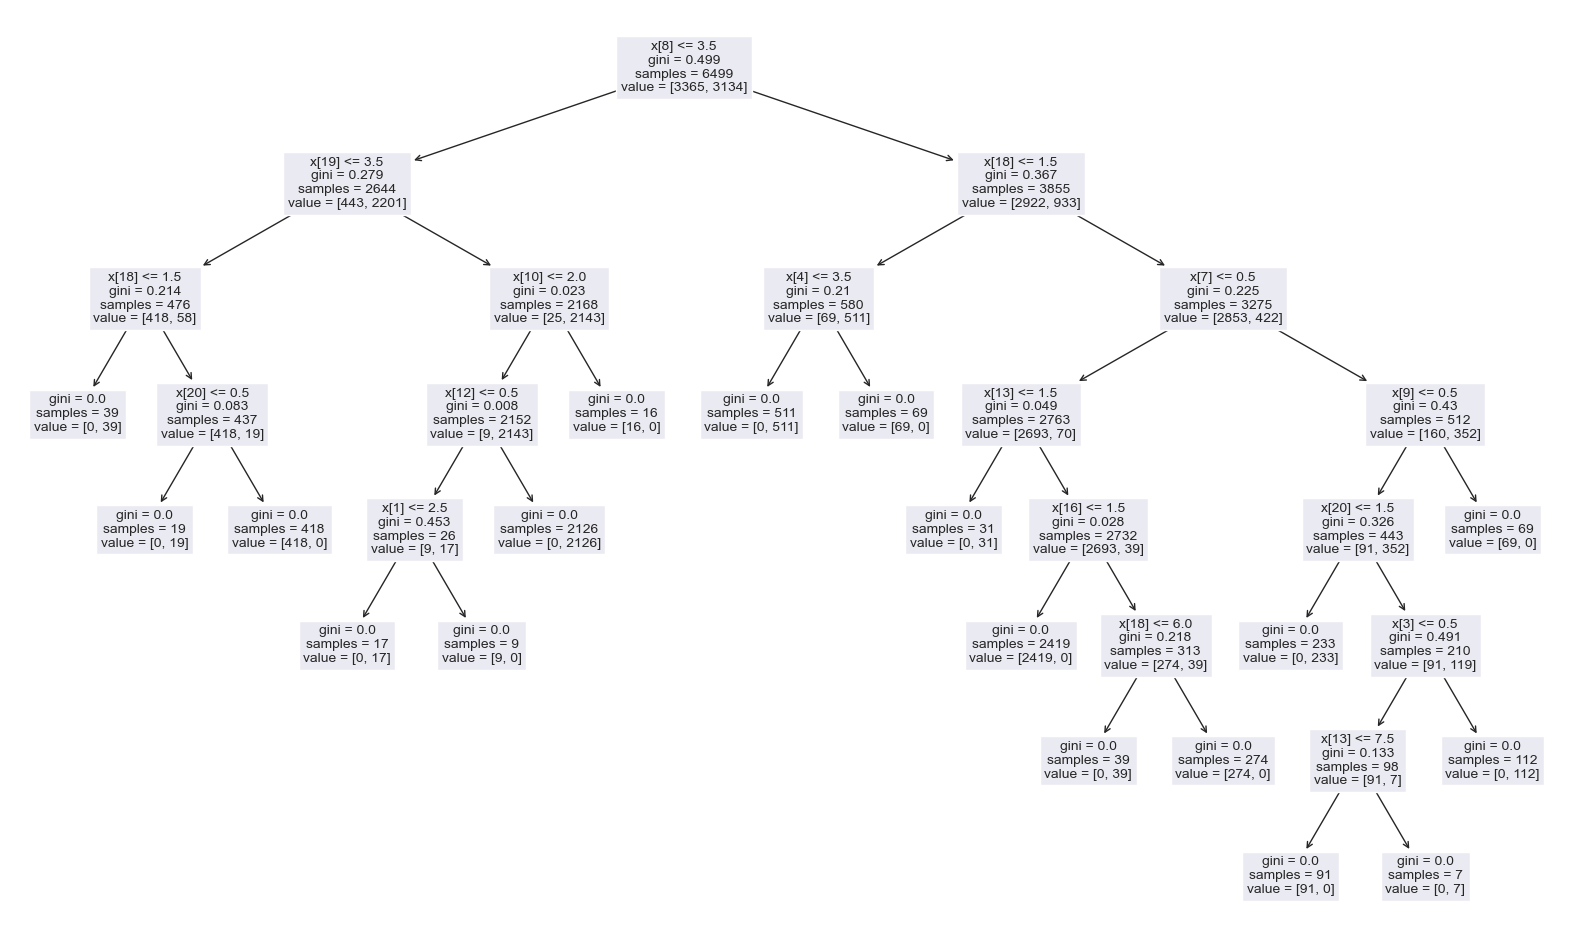

In [642]:
from sklearn import tree
print("Importanza delle features dt :",dt.feature_importances_)
print("Ordine di importanza delle features dt :",dt.feature_importances_.argsort())

tree.plot_tree(dt)

Per questo motivo, verifico le prestazioni dei differenti modelli utilizzando un dataset in cui sono state eliminate le 8 features con importance pari a 0 (ovvero quelle che non sono prese in considerazione dall'albero decisionale nel suo processo di classificazione).

Effettuo quindi lo split del dataset

In [643]:
train_set2, test_set2 = train_test_split(df_number, test_size=0.2, random_state=44)

#train_copy2 = train_set2.copy()
#test_copy2 = test_set2.copy()

train_copy2 = train_set2.drop(train_set2.columns[[1, 2,  3, 18,  5,  6,  7, 12, 14]],axis=1)
test_copy2 = test_set2.drop(test_set2.columns[[1, 2,  3, 18,  5,  6,  7, 12, 14]],axis=1)

X_train2 = train_copy2.iloc[:,1:]
y_train2 = train_copy2.iloc[:,0]
X_test2 = test_copy2.iloc[:,1:]
y_test2 = test_copy2.iloc[:,0]

print(train_copy2.shape, test_copy2.shape)

(6499, 13) (1625, 13)


- E riapplico i modelli di ML, a cui ho aggiunto una dicitura "2" per indicare l'analisi del dataset con 13 features 

Applicazione Gaussian Naive Bayes

In [644]:
nb2=GaussianNB()
#Ri-effettuiamo quindi il fit del training set
nb2.fit(X_train2,y_train2)

y_train_nb2 = nb2.predict(X_train2)

accuracy_train_nb2 = 100*accuracy_score(y_train2,y_train_nb2)
precision_train_nb2 = 100*precision_score(y_train2,y_train_nb2)
recall_train_nb2 = 100*recall_score(y_train2,y_train_nb2)
f1_train_nb2 = 100*f1_score(y_train2,y_train_nb2)

print("Accuracy NB Train:", accuracy_train_nb2,"%")
print("Precision NB Train:",precision_train_nb2,"%")
print("Recall NB Train:",recall_train_nb2,"%")
print("F score NB Train:",f1_train_nb2,"%")

#Verifichiamo quindi le metriche di misurazione della bontà della predizioni sul testset

y_test_nb2 = nb2.predict(X_test2)

accuracy_test_nb2 = 100*accuracy_score(y_test2,y_test_nb2)
precision_test_nb2 = 100*precision_score(y_test2,y_test_nb2)
recall_test_nb2 = 100*recall_score(y_test2,y_test_nb2)
f1_test_nb2 = 100*f1_score(y_test2,y_test_nb2)

print("Accuracy NB Test:", accuracy_test_nb2,"%")
print("Precision NB Test:",precision_test_nb2,"%")
print("Recall NB Test:",recall_test_nb2,"%")
print("F score NB Test:",f1_test_nb2,"%")

Accuracy NB Train: 91.8756731804893 %
Precision NB Train: 92.42724867724867 %
Recall NB Train: 90.33613445378151 %
F score NB Train: 91.36972866949984 %
Accuracy NB Test: 92.86153846153846 %
Precision NB Test: 92.83980582524272 %
Recall NB Test: 93.06569343065694 %
F score NB Test: 92.95261239368166 %


Salvataggio dei risultati

In [645]:
risultatoModello("NB2",accuracy_train_nb2,precision_train_nb2,recall_train_nb2,f1_train_nb2,"Train")
risultatoModello("NB2",accuracy_test_nb2,precision_test_nb2,recall_test_nb2,f1_test_nb2,"Test")

,nome,accuracy,precision,recall,f1,set
0,NB2,92.861538,92.839806,93.065693,92.952612,Test
1,NB2,91.875673,92.427249,90.336134,91.369729,Train
2,"MLP(8,8)",100.000000,100.000000,100.000000,100.000000,Test
3,"MLP(8,8)",100.000000,100.000000,100.000000,100.000000,Train
4,MLP(5),98.769231,98.971722,98.465473,98.717949,Test
5,MLP(5),98.707493,99.288946,98.021698,98.651252,Train
6,RF,100.000000,100.000000,100.000000,100.000000,Test
7,RF,100.000000,100.000000,100.000000,100.000000,Train
8,Voting,96.738462,95.964691,97.314578,96.634921,Test
9,Voting,96.984151,96.932907,96.809190,96.871009,Train


Applicazione Support Vector Classification

In [646]:
svc2=SVC(gamma=0.1,kernel='rbf')
#Effettuiamo quindi il fit del training
svc2.fit(X_train2,y_train2)
#e applichiamo il modello al test set
y_test_svc2 = svc2.predict(X_test2)
#Verifichiamo quindi le metriche di misurazione della bontà della predizioni sul testset
accuracy_test_svc2 = 100*accuracy_score(y_test2,y_test_svc2)
precision_test_svc2 = 100*precision_score(y_test2,y_test_svc2)
recall_test_svc2 = 100*recall_score(y_test2,y_test_svc2)
f1_test_svc2 = 100*f1_score(y_test2,y_test_svc2)

print("Accuracy SVC Test:", accuracy_test_svc2,"%")
print("Precision SVC Test:",precision_test_svc2,"%")
print("Recall SVC Test:",recall_test_svc2,"%")
print("F score SVC Test:",f1_test_svc2,"%")

#e sul training set
y_train_svc2 = svc2.predict(X_train2)

accuracy_train_svc2 = 100*accuracy_score(y_train2,y_train_svc2)
precision_train_svc2 = 100*precision_score(y_train2,y_train_svc2)
recall_train_svc2 = 100*recall_score(y_train2,y_train_svc2)
f1_train_svc2 = 100*f1_score(y_train2,y_train_svc2)

print("Accuracy SVC Train:", accuracy_train_svc2,"%")
print("Precision SVC Train:",precision_train_svc2,"%")
print("Recall SVC Train:",recall_train_svc2,"%")
print("F score SVC Train:",f1_train_svc2,"%")

Accuracy SVC Test: 100.0 %
Precision SVC Test: 100.0 %
Recall SVC Test: 100.0 %
F score SVC Test: 100.0 %
Accuracy SVC Train: 100.0 %
Precision SVC Train: 100.0 %
Recall SVC Train: 100.0 %
F score SVC Train: 100.0 %


salvataggio dei risultati

In [647]:
risultatoModello("SVC2",accuracy_train_svc2,precision_train_svc2,recall_train_svc2,f1_train_svc2,"Train")
risultatoModello("SVC2",accuracy_test_svc2,precision_test_svc2,recall_test_svc2,f1_test_svc2,"Test")

,nome,accuracy,precision,recall,f1,set
0,SVC2,100.000000,100.000000,100.000000,100.000000,Test
1,SVC2,100.000000,100.000000,100.000000,100.000000,Train
2,NB2,92.861538,92.839806,93.065693,92.952612,Test
3,NB2,91.875673,92.427249,90.336134,91.369729,Train
4,"MLP(8,8)",100.000000,100.000000,100.000000,100.000000,Test
5,"MLP(8,8)",100.000000,100.000000,100.000000,100.000000,Train
6,MLP(5),98.769231,98.971722,98.465473,98.717949,Test
7,MLP(5),98.707493,99.288946,98.021698,98.651252,Train
8,RF,100.000000,100.000000,100.000000,100.000000,Test
9,RF,100.000000,100.000000,100.000000,100.000000,Train


Applicazione Modello Logistic Regression

In [648]:
lr2 = LogisticRegression(C=100, penalty='l2', solver= 'liblinear')

lr2.fit(X_train2,y_train2)

y_train_lr2 = lr2.predict(X_train2)

accuracy_train_lr2 = 100*accuracy_score(y_train2,y_train_lr2)
precision_train_lr2 = 100*precision_score(y_train2,y_train_lr2)
recall_train_lr2 = 100*recall_score(y_train2,y_train_lr2)
f1_train_lr2 = 100*f1_score(y_train2,y_train_lr2)

print("Accuracy LR Train:", accuracy_train_lr2,"%")
print("Precision LR Train:",precision_train_lr2,"%")
print("Recall LR Train:",recall_train_lr2,"%")
print("F score LR Train:",f1_train_lr2,"%")

y_test_lr2 = lr2.predict(X_test2)

accuracy_test_lr2 = 100*accuracy_score(y_test2,y_test_lr2)
precision_test_lr2 = 100*precision_score(y_test2,y_test_lr2)
recall_test_lr2 = 100*recall_score(y_test2,y_test_lr2)
f1_test_lr2 = 100*f1_score(y_test2,y_test_lr2)

print("Accuracy LR Test:", accuracy_test_lr2,"%")
print("Precision LR Test:",precision_test_lr2,"%")
print("Recall LR Test:",recall_test_lr2,"%")
print("F score LR Test:",f1_test_lr2,"%")


Accuracy LR Train: 92.38344360670872 %
Precision LR Train: 93.53433835845895 %
Recall LR Train: 90.23917259211377 %
F score LR Train: 91.85721335746011 %
Accuracy LR Test: 92.80000000000001 %
Precision LR Test: 94.11764705882352 %
Recall LR Test: 91.48418491484185 %
F score LR Test: 92.78223318938926 %


salvataggio dei risultati

In [649]:
risultatoModello("LR2",accuracy_train_lr2,precision_train_lr2,recall_train_lr2,f1_train_lr2,"Train")
risultatoModello("LR2",accuracy_test_lr2,precision_test_lr2,recall_test_lr2,f1_test_lr2,"Test")

,nome,accuracy,precision,recall,f1,set
0,LR2,92.800000,94.117647,91.484185,92.782233,Test
1,LR2,92.383444,93.534338,90.239173,91.857213,Train
2,SVC2,100.000000,100.000000,100.000000,100.000000,Test
3,SVC2,100.000000,100.000000,100.000000,100.000000,Train
4,NB2,92.861538,92.839806,93.065693,92.952612,Test
5,NB2,91.875673,92.427249,90.336134,91.369729,Train
6,"MLP(8,8)",100.000000,100.000000,100.000000,100.000000,Test
7,"MLP(8,8)",100.000000,100.000000,100.000000,100.000000,Train
8,MLP(5),98.769231,98.971722,98.465473,98.717949,Test
9,MLP(5),98.707493,99.288946,98.021698,98.651252,Train


Applicazione K-Nearest Neighbor

In [650]:
knn_clf2 = KNeighborsClassifier(1)

knn_clf2.fit(X_train2,y_train2)

y_train_knn2 = knn_clf2.predict(X_train2)

accuracy_train_knn2 = 100*accuracy_score(y_train2,y_train_knn2)
precision_train_knn2 = 100*precision_score(y_train2,y_train_knn2)
recall_train_knn2 = 100*recall_score(y_train2,y_train_knn2)
f1_train_knn2 = 100*f1_score(y_train2,y_train_knn2)

print("Accuracy KNN Train:", accuracy_train_knn2,"%")
print("Precision KNN Train:",precision_train_knn2,"%")
print("Recall KNN Train:",recall_train_knn2,"%")
print("F score KNN Train:",f1_train_knn2,"%")

y_test_knn2 =knn_clf2.predict(X_test2)

accuracy_test_knn2 = 100*accuracy_score(y_test2,y_test_knn2)
precision_test_knn2 = 100*precision_score(y_test2,y_test_knn2)
recall_test_knn2 = 100*recall_score(y_test2,y_test_knn2)
f1_test_knn2 = 100*f1_score(y_test2,y_test_knn2)

print("Accuracy KNN Test:", accuracy_test_knn2,"%")
print("Precision KNN Test:",precision_test_knn2,"%")
print("Recall KNN Test:",recall_test_knn2,"%")
print("F score KNN Test:",f1_test_knn2,"%")


Accuracy KNN Train: 100.0 %
Precision KNN Train: 100.0 %
Recall KNN Train: 100.0 %
F score KNN Train: 100.0 %
Accuracy KNN Test: 100.0 %
Precision KNN Test: 100.0 %
Recall KNN Test: 100.0 %
F score KNN Test: 100.0 %


salvataggio dei risultati

In [651]:
risultatoModello("KNN2",accuracy_train_knn2,precision_train_knn2,recall_train_knn2,f1_train_knn2,"Train")
risultatoModello("KNN2",accuracy_test_knn2,precision_test_knn2,recall_test_knn2,f1_test_knn2,"Test")

,nome,accuracy,precision,recall,f1,set
0,KNN2,100.000000,100.000000,100.000000,100.000000,Test
1,KNN2,100.000000,100.000000,100.000000,100.000000,Train
2,LR2,92.800000,94.117647,91.484185,92.782233,Test
3,LR2,92.383444,93.534338,90.239173,91.857213,Train
4,SVC2,100.000000,100.000000,100.000000,100.000000,Test
5,SVC2,100.000000,100.000000,100.000000,100.000000,Train
6,NB2,92.861538,92.839806,93.065693,92.952612,Test
7,NB2,91.875673,92.427249,90.336134,91.369729,Train
8,"MLP(8,8)",100.000000,100.000000,100.000000,100.000000,Test
9,"MLP(8,8)",100.000000,100.000000,100.000000,100.000000,Train


Applicazione Stochastic Gradient Descendent

In [652]:
sgd_clf2 = SGDClassifier(alpha=0.0001,
                                 class_weight={1:0.7, 0:0.3},
                                 eta0=100,
                                 learning_rate='optimal',
                                 loss='hinge',
                                 penalty='l1',
                                 max_iter=500,
                                 tol=None)
sgd_clf2.fit(X_train2, y_train2)

y_test_sgd2 = sgd_clf2.predict(X_test2)

accuracy_test_sgd2 = 100*accuracy_score(y_test2,y_test_sgd2)
precision_test_sgd2 = 100*precision_score(y_test2,y_test_sgd2)
recall_test_sgd2 = 100*recall_score(y_test2,y_test_sgd2)
f1_test_sgd2 = 100*f1_score(y_test2,y_test_sgd2)
print("Accuracy SGD Test:", accuracy_test_sgd2 ,"%")
print("Precision SGD Test:", precision_test_sgd2,"%")
print("Recall SGD Test:", recall_test_sgd2 ,"%")
print("F score SGD Test:", f1_test_sgd2 ,"%")

y_train_sgd2 = sgd_clf2.predict(X_train2)

accuracy_train_sgd2 = 100*accuracy_score(y_train2,y_train_sgd2)
precision_train_sgd2 = 100*precision_score(y_train2,y_train_sgd2)
recall_train_sgd2 = 100*recall_score(y_train2,y_train_sgd2)
f1_train_sgd2 = 100*f1_score(y_train2,y_train_sgd2)
print("Accuracy SGD Train:", accuracy_train_sgd2 ,"%")
print("Precision SGD Train:", precision_train_sgd2,"%")
print("Recall SGD Train:", recall_train_sgd2,"%")
print("F score SGD Train:", f1_train_sgd2,"%")

Accuracy SGD Test: 94.39999999999999 %
Precision SGD Test: 93.05064782096584 %
Recall SGD Test: 96.10705596107056 %
F score SGD Test: 94.55415918611611 %
Accuracy SGD Train: 94.19910755500847 %
Precision SGD Train: 92.78740157480316 %
Recall SGD Train: 95.21654815772462 %
F score SGD Train: 93.98628170362099 %


salvataggio dei risultati

In [653]:
risultatoModello("SGD2",accuracy_train_sgd2,precision_train_sgd2,recall_train_sgd2,f1_train_sgd2,"Train")
risultatoModello("SGD2",accuracy_test_sgd2,precision_test_sgd2,recall_test_sgd2,f1_test_sgd2,"Test")

,nome,accuracy,precision,recall,f1,set
0,SGD2,94.400000,93.050648,96.107056,94.554159,Test
1,SGD2,94.199108,92.787402,95.216548,93.986282,Train
2,KNN2,100.000000,100.000000,100.000000,100.000000,Test
3,KNN2,100.000000,100.000000,100.000000,100.000000,Train
4,LR2,92.800000,94.117647,91.484185,92.782233,Test
5,LR2,92.383444,93.534338,90.239173,91.857213,Train
6,SVC2,100.000000,100.000000,100.000000,100.000000,Test
7,SVC2,100.000000,100.000000,100.000000,100.000000,Train
8,NB2,92.861538,92.839806,93.065693,92.952612,Test
9,NB2,91.875673,92.427249,90.336134,91.369729,Train


Applicazione Random Forest

In [654]:
rf2 = RandomForestClassifier()

rf2.fit(X_train2,y_train2)

y_train_rf2 = rf2.predict(X_train2)

accuracy_train_rf2 = 100*accuracy_score(y_train2,y_train_rf2)
precision_train_rf2 = 100*precision_score(y_train2,y_train_rf2)
recall_train_rf2 = 100*recall_score(y_train2,y_train_rf2)
f1_train_rf2 = 100*f1_score(y_train2,y_train_rf2)

print("Accuracy RF Train:", accuracy_train_rf2,"%")
print("Precision RF Train:",precision_train_rf2,"%")
print("Recall RF Train:",recall_train_rf2,"%")
print("F score RF Train:",f1_train_rf2,"%")

y_test_rf2 = rf2.predict(X_test2)

accuracy_test_rf2 = 100*accuracy_score(y_test2,y_test_rf2)
precision_test_rf2 = 100*precision_score(y_test2,y_test_rf2)
recall_test_rf2 = 100*recall_score(y_test2,y_test_rf2)
f1_test_rf = 100*f1_score(y_test2,y_test_rf2)

print("Accuracy RF Test:", accuracy_test_rf2,"%")
print("Precision RF Test:",precision_test_rf2,"%")
print("Recall RF Test:",recall_test_rf2,"%")
print("F score RF Test:",f1_test_rf2,"%")

Accuracy RF Train: 100.0 %
Precision RF Train: 100.0 %
Recall RF Train: 100.0 %
F score RF Train: 100.0 %
Accuracy RF Test: 100.0 %
Precision RF Test: 100.0 %
Recall RF Test: 100.0 %
F score RF Test: 100.0 %


salvataggio dei risultati

In [655]:
risultatoModello("RF2",accuracy_train_rf2,precision_train_rf2,recall_train_rf2,f1_train_rf2,"Train")
risultatoModello("RF2",accuracy_test_rf2,precision_test_rf2,recall_test_rf2,f1_test_rf2,"Test")

,nome,accuracy,precision,recall,f1,set
0,RF2,100.000000,100.000000,100.000000,100.000000,Test
1,RF2,100.000000,100.000000,100.000000,100.000000,Train
2,SGD2,94.400000,93.050648,96.107056,94.554159,Test
3,SGD2,94.199108,92.787402,95.216548,93.986282,Train
4,KNN2,100.000000,100.000000,100.000000,100.000000,Test
5,KNN2,100.000000,100.000000,100.000000,100.000000,Train
6,LR2,92.800000,94.117647,91.484185,92.782233,Test
7,LR2,92.383444,93.534338,90.239173,91.857213,Train
8,SVC2,100.000000,100.000000,100.000000,100.000000,Test
9,SVC2,100.000000,100.000000,100.000000,100.000000,Train


Applicazione Rete Neurale (MLP)

In [656]:

mlp2 = MLPClassifier(solver='adam',hidden_layer_sizes=(8,8), max_iter=1000)
mlp2.fit(X_train2,y_train2)

y_train_mlp2 = mlp2.predict(X_train2)

accuracy_train_mlp2 = 100*accuracy_score(y_train2,y_train_mlp2)
precision_train_mlp2 = 100*precision_score(y_train2,y_train_mlp2)
recall_train_mlp2 = 100*recall_score(y_train2,y_train_mlp2)
f1_train_mlp2 = 100*f1_score(y_train2,y_train_mlp2)

print("Accuracy MLP Train:", accuracy_train_mlp2,"%")
print("Precision MLP Train:",precision_train_mlp2,"%")
print("Recall MLP Train:",recall_train_mlp2,"%")
print("F score MLP Train:",f1_train_mlp2,"%")

y_test_mlp2 = mlp2.predict(X_test2)

accuracy_test_mlp2 = 100*accuracy_score(y_test2,y_test_mlp2)
precision_test_mlp2 = 100*precision_score(y_test2,y_test_mlp2)
recall_test_mlp2 = 100*recall_score(y_test2,y_test_mlp2)
f1_test_mlp2 = 100*f1_score(y_test2,y_test_mlp2)

print("Accuracy MLP Test:", accuracy_test_mlp2,"%")
print("Precision MLP Test:",precision_test_mlp2,"%")
print("Recall MLP Test:",recall_test_mlp2,"%")
print("F score MLP Test:",f1_test_mlp2,"%")



Accuracy MLP Train: 100.0 %
Precision MLP Train: 100.0 %
Recall MLP Train: 100.0 %
F score MLP Train: 100.0 %
Accuracy MLP Test: 100.0 %
Precision MLP Test: 100.0 %
Recall MLP Test: 100.0 %
F score MLP Test: 100.0 %


salvataggio dei risultati

In [657]:
risultatoModello("MLP2(8,8)",accuracy_train_mlp2,precision_train_mlp2,recall_train_mlp2,f1_train_mlp2,"Train")
risultatoModello("MLP2(8,8)",accuracy_test_mlp2,precision_test_mlp2,recall_test_mlp2,f1_test_mlp2,"Test")

,nome,accuracy,precision,recall,f1,set
0,"MLP2(8,8)",100.000000,100.000000,100.000000,100.000000,Test
1,"MLP2(8,8)",100.000000,100.000000,100.000000,100.000000,Train
2,RF2,100.000000,100.000000,100.000000,100.000000,Test
3,RF2,100.000000,100.000000,100.000000,100.000000,Train
4,SGD2,94.400000,93.050648,96.107056,94.554159,Test
5,SGD2,94.199108,92.787402,95.216548,93.986282,Train
6,KNN2,100.000000,100.000000,100.000000,100.000000,Test
7,KNN2,100.000000,100.000000,100.000000,100.000000,Train
8,LR2,92.800000,94.117647,91.484185,92.782233,Test
9,LR2,92.383444,93.534338,90.239173,91.857213,Train


- Visualizzazione dei risultati

,nome,accuracy
13,NB2,91.875673
39,NB,92.352670
9,LR2,92.383444
37,GridNB,92.598861
5,SGD2,94.199108
43,SGD,94.399138
25,LR,95.276196
23,GridLR,96.737960
21,Voting,96.984151
41,GridSGD,98.676719


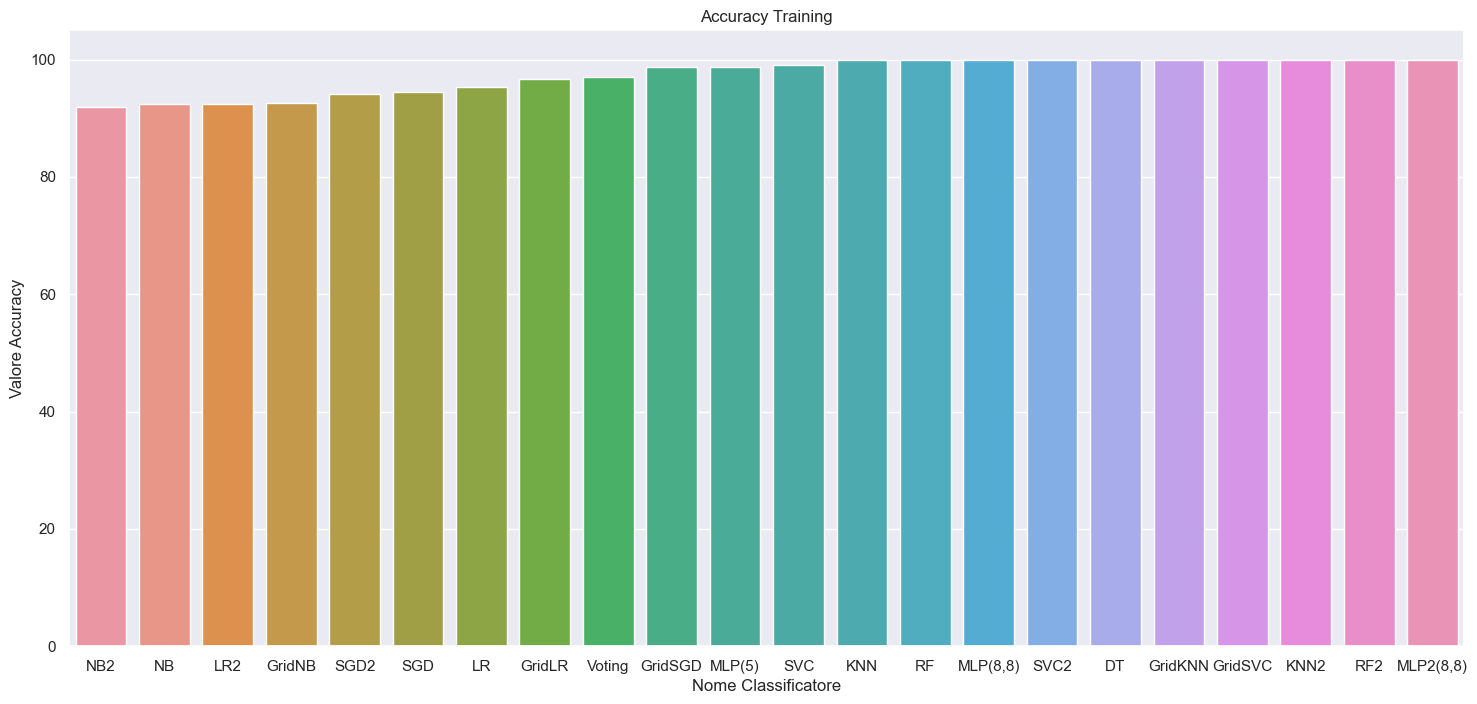

In [658]:
from matplotlib.backend_tools import SaveFigureBase


risultati = pd.read_csv("C:/Users/matte/dataset/Progetto/risultati.csv")

risultati_accuracy_train = risultati[risultati['set']=='Train']
risultati_accuracy_train = risultati_accuracy_train.sort_values(by=['accuracy'])
plt.figure(figsize=(18,8))
figura = sns.barplot(x=risultati_accuracy_train['nome'], y=risultati_accuracy_train['accuracy'])
plt.xlabel('Nome Classificatore')
plt.ylabel("Valore Accuracy")
plt.title("Accuracy Training")
SaveFigureBase(figura,"Accuracy Training")
risultati_accuracy_train[['nome','accuracy']]


,nome,precision
39,NB,92.246075
13,NB2,92.427249
5,SGD2,92.787402
37,GridNB,92.804130
9,LR2,93.534338
25,LR,95.759145
23,GridLR,96.528662
21,Voting,96.932907
43,SGD,97.366621
41,GridSGD,97.714465


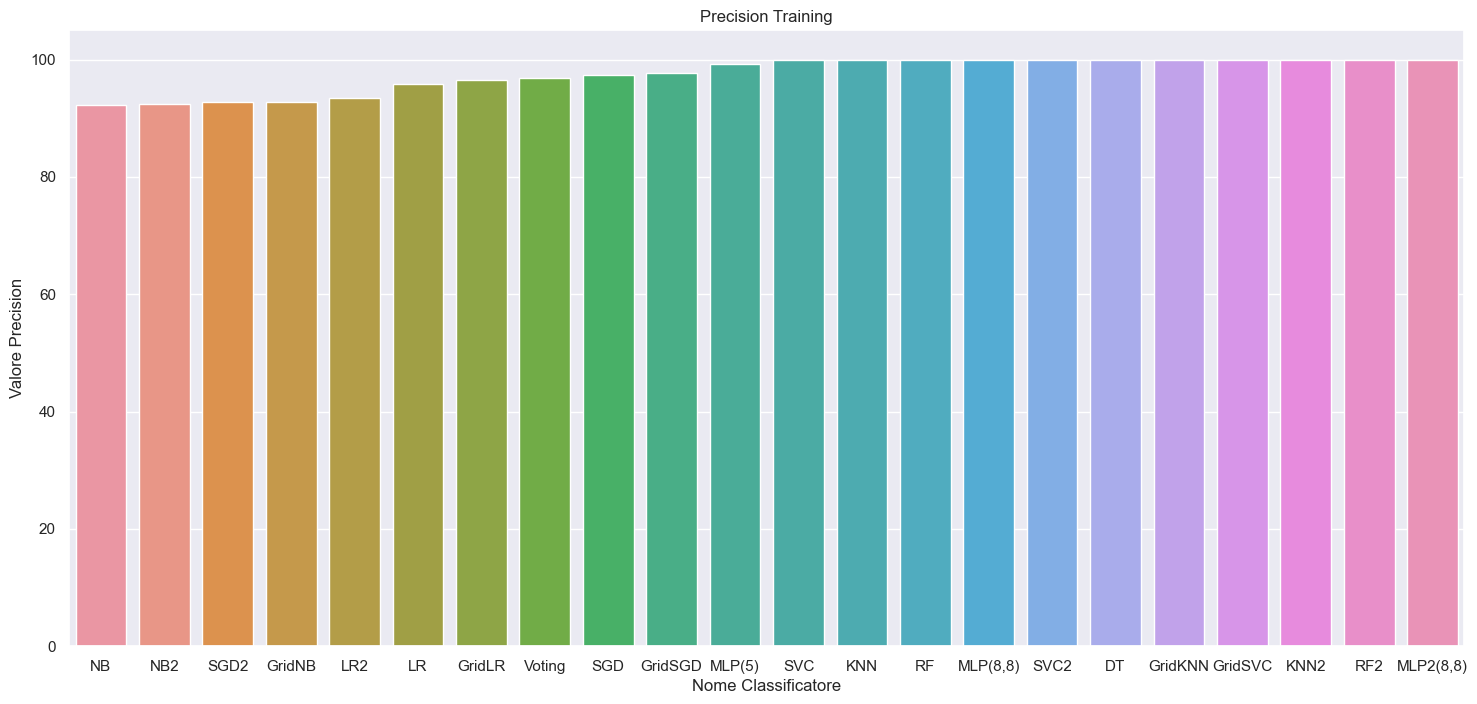

In [659]:
risultati_precision_train = risultati[risultati['set']=='Train']
risultati_precision_train = risultati_precision_train.sort_values(by=['precision'])
plt.figure(figsize=(18,8))
figura = sns.barplot(x=risultati_precision_train['nome'], y=risultati_precision_train['precision'])
plt.xlabel('Nome Classificatore')
plt.ylabel("Valore Precision")
plt.title("Precision Training")
SaveFigureBase(figura,"Precision Training")
risultati_precision_train[['nome','precision']]

,nome,recall
9,LR2,90.239173
13,NB2,90.336134
43,SGD,90.842374
37,GridNB,91.767709
39,NB,91.863433
25,LR,94.384174
5,SGD2,95.216548
23,GridLR,96.713465
21,Voting,96.809190
17,MLP(5),98.021698


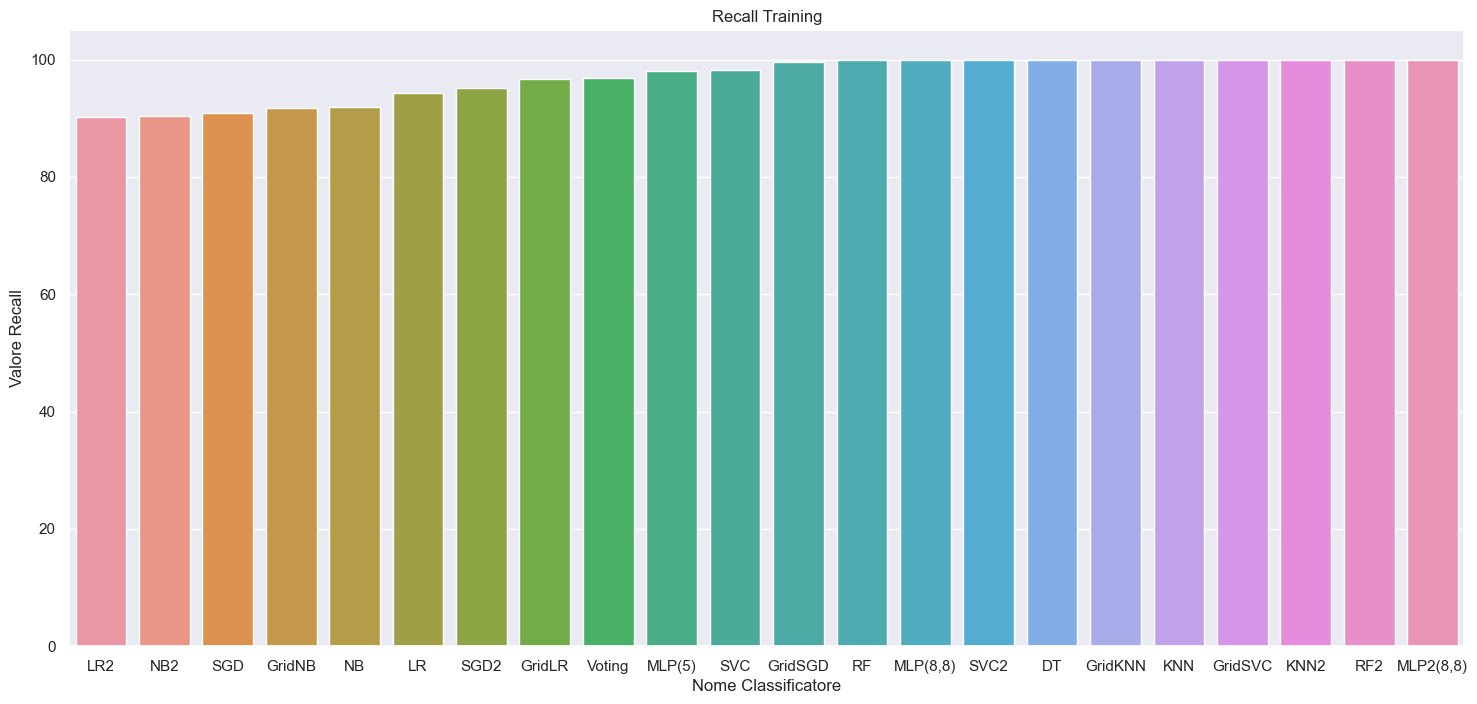

In [660]:
risultati_recall_train = risultati[risultati['set']=='Train']
risultati_recall_train = risultati_recall_train.sort_values(by=['recall'])
plt.figure(figsize=(18,8))
figura = sns.barplot(x=risultati_recall_train['nome'], y=risultati_recall_train['recall'])
plt.xlabel('Nome Classificatore')
plt.ylabel("Valore Recall")
plt.title("Recall Training")
SaveFigureBase(figura,"Recall Training")
risultati_recall_train[['nome','recall']]

,nome,f1
13,NB2,91.369729
9,LR2,91.857213
39,NB,92.054357
37,GridNB,92.283010
5,SGD2,93.986282
43,SGD,93.991416
25,LR,95.066688
23,GridLR,96.620975
21,Voting,96.871009
41,GridSGD,98.640961


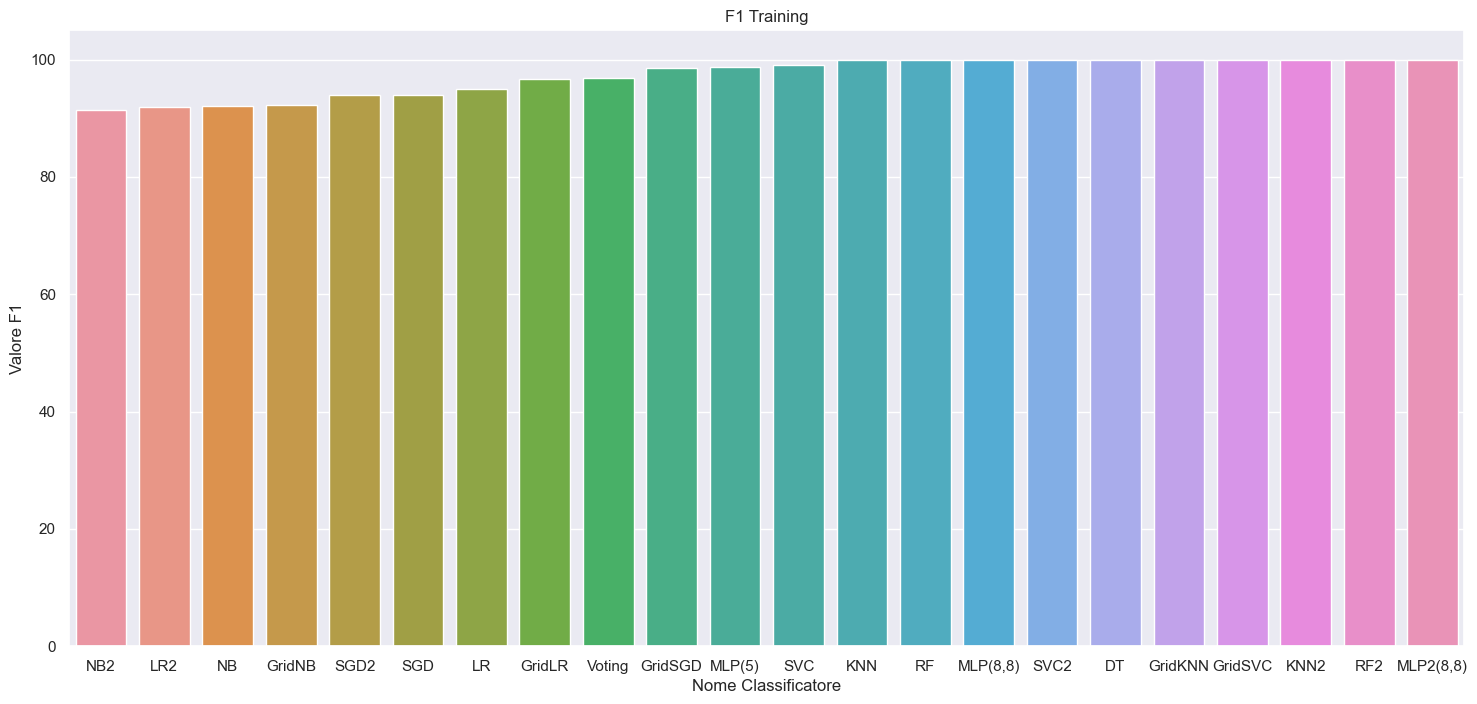

In [661]:
risultati_f1_train = risultati[risultati['set']=='Train']
risultati_f1_train = risultati_f1_train.sort_values(by=['f1'])
plt.figure(figsize=(18,8))
figura = sns.barplot(x=risultati_f1_train['nome'], y=risultati_f1_train['f1'])
plt.xlabel('Nome Classificatore')
plt.ylabel("Valore F1")
plt.title("F1 Training")
SaveFigureBase(figura,"F1 Training")
risultati_f1_train[['nome','f1']]

Visualizzazione risultati testing

,nome,accuracy
38,NB,92.184615
36,GridNB,92.800000
8,LR2,92.800000
12,NB2,92.861538
42,SGD,94.153846
4,SGD2,94.400000
24,LR,94.707692
22,GridLR,96.553846
20,Voting,96.738462
40,GridSGD,98.461538


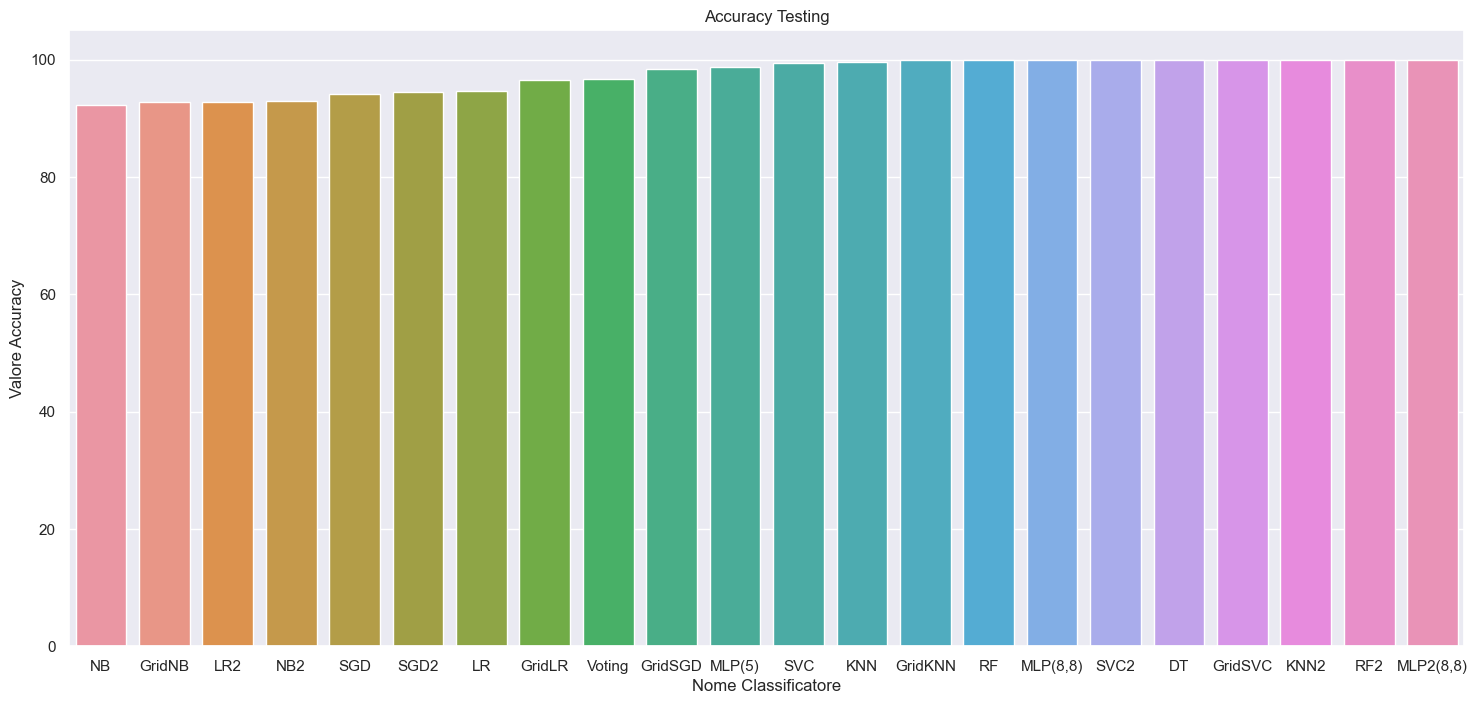

In [662]:
risultati_accuracy_test = risultati[risultati['set']=='Test']
risultati_accuracy_test = risultati_accuracy_test.sort_values(by=['accuracy'])
plt.figure(figsize=(18,8))
figura = sns.barplot(x=risultati_accuracy_test['nome'], y=risultati_accuracy_test['accuracy'])
plt.xlabel('Nome Classificatore')
plt.ylabel("Valore Accuracy")
plt.title("Accuracy Testing")
SaveFigureBase(figura,"Accuracy Testing")
risultati_accuracy_test[['nome','accuracy']]

,nome,precision
38,NB,90.988736
36,GridNB,92.141952
12,NB2,92.839806
4,SGD2,93.050648
8,LR2,94.117647
24,LR,94.274809
22,GridLR,95.717884
20,Voting,95.964691
42,SGD,96.356275
40,GridSGD,97.135741


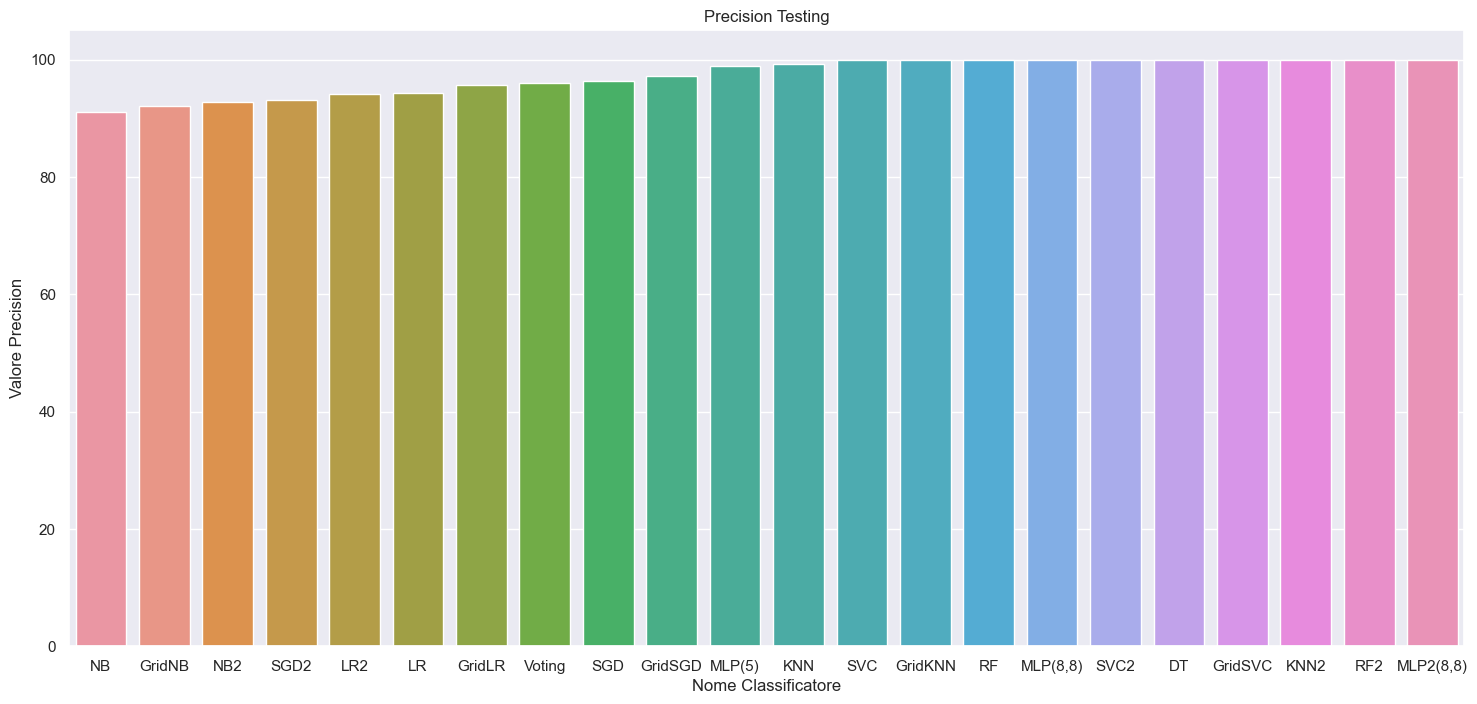

In [663]:
risultati_precision_test = risultati[risultati['set']=='Test']
risultati_precision_test = risultati_precision_test.sort_values(by=['precision'])
plt.figure(figsize=(18,8))
figura = sns.barplot(x=risultati_precision_test['nome'], y=risultati_precision_test['precision'])
plt.xlabel('Nome Classificatore')
plt.ylabel("Valore Precision")
plt.title("Precision Testing")
SaveFigureBase(figura,"F1 Testing")
risultati_precision_test[['nome','precision']]

,nome,recall
42,SGD,91.304348
8,LR2,91.484185
38,NB,92.966752
36,GridNB,92.966752
12,NB2,93.065693
24,LR,94.757033
4,SGD2,96.107056
22,GridLR,97.186701
20,Voting,97.314578
16,MLP(5),98.465473


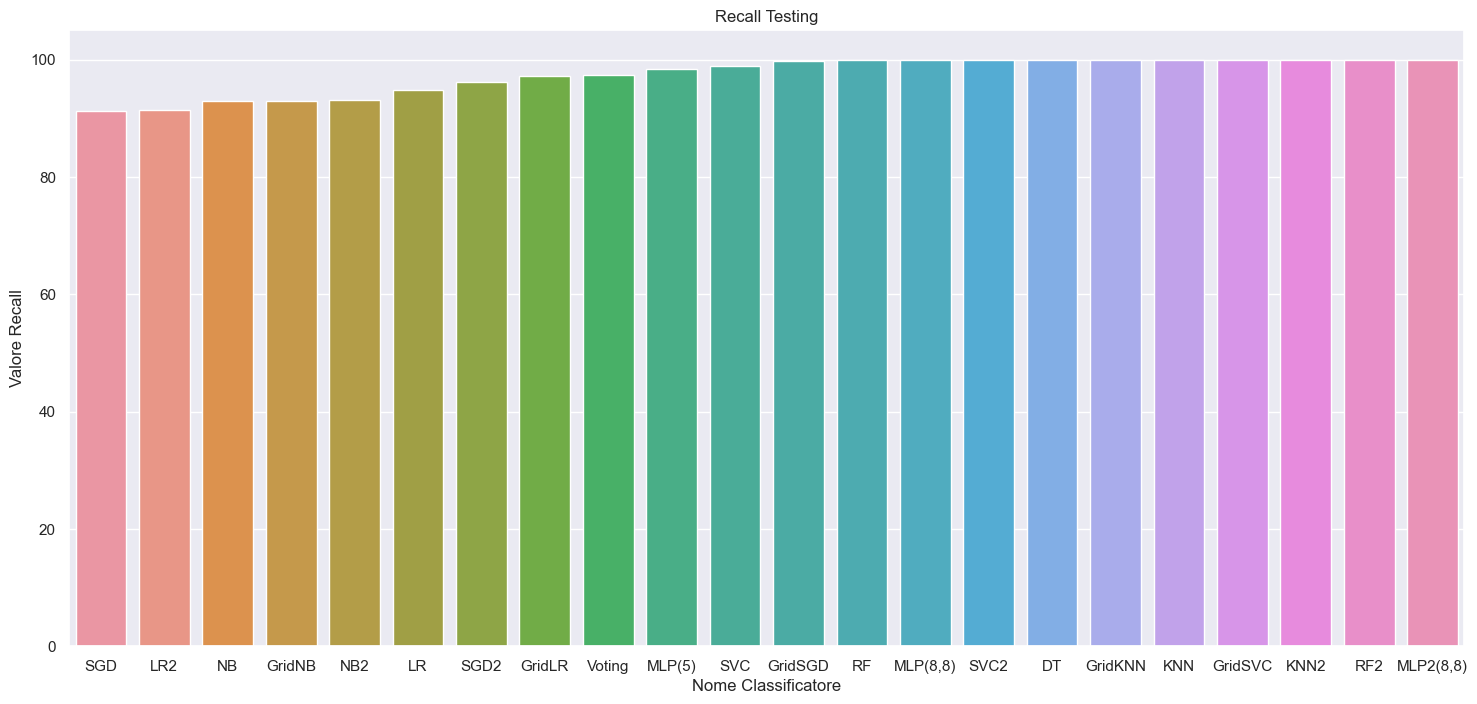

In [664]:
risultati_recall_test = risultati[risultati['set']=='Test']
risultati_recall_test = risultati_recall_test.sort_values(by=['recall'])
plt.figure(figsize=(18,8))
figura = sns.barplot(x=risultati_recall_test['nome'], y=risultati_recall_test['recall'])
plt.xlabel('Nome Classificatore')
plt.ylabel("Valore Recall")
plt.title("Recall Testing")
SaveFigureBase(figura,"Recall Testing")
risultati_recall_test[['nome','recall']]

,nome,f1
38,NB,91.967109
36,GridNB,92.552514
8,LR2,92.782233
12,NB2,92.952612
42,SGD,93.762311
24,LR,94.515306
4,SGD2,94.554159
22,GridLR,96.446701
20,Voting,96.634921
40,GridSGD,98.422713


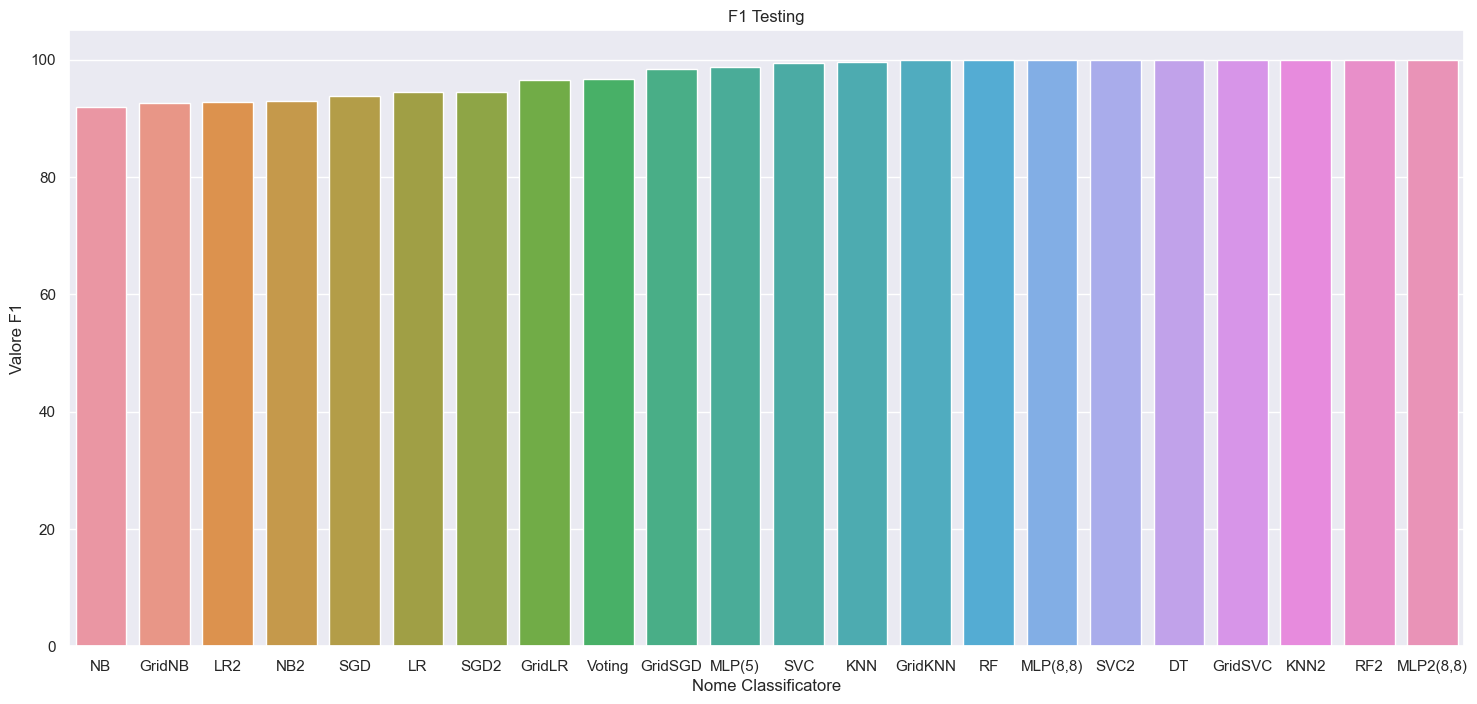

In [665]:
risultati_f1_test = risultati[risultati['set']=='Test']
risultati_f1_test = risultati_f1_test.sort_values(by=['f1'])
plt.figure(figsize=(18,8))
figura = sns.barplot(x=risultati_f1_test['nome'], y=risultati_f1_test['f1'])
plt.xlabel('Nome Classificatore')
plt.ylabel("Valore F1")
plt.title("F1 Testing")
SaveFigureBase(figura,"F1 Testing")
risultati_f1_test[['nome','f1']]

- Stampa delle prestazioni di tutti i modelli in un dataframe

In [666]:
risultati

,nome,accuracy,precision,recall,f1,set
0,"MLP2(8,8)",100.000000,100.000000,100.000000,100.000000,Test
1,"MLP2(8,8)",100.000000,100.000000,100.000000,100.000000,Train
2,RF2,100.000000,100.000000,100.000000,100.000000,Test
3,RF2,100.000000,100.000000,100.000000,100.000000,Train
4,SGD2,94.400000,93.050648,96.107056,94.554159,Test
5,SGD2,94.199108,92.787402,95.216548,93.986282,Train
6,KNN2,100.000000,100.000000,100.000000,100.000000,Test
7,KNN2,100.000000,100.000000,100.000000,100.000000,Train
8,LR2,92.800000,94.117647,91.484185,92.782233,Test
9,LR2,92.383444,93.534338,90.239173,91.857213,Train


- Considerazioni Finali

Le prestazioni di tutti i modelli sono alte per qualsiasi metrica utilizzata, sia in fase di training e sia in fase di testing. Alcuni algoritmi come il decision tree o il random forest offrono con i valori base delle prestazioni perfette (del 100%) in tutte e 4 le metriche analizzate - ovvero accuracy, precision, recall, f1 - mentre altri algoritmi, pur offrendo prestazioni ottime, non riescono ad arrivare a quel livello. 
Il motivo per cui i valori di prestazioni sono elevati si può notare nell'analisi e nel processing dei dati. Esse infatti, sono dovute al fatto che alcune features hanno uno sbilanciamento della classe target (ad esempio odor, ma non solo) e ciò rende semplice la predizione della classe per quegli algoritmi che analizzano le feature una ad una (come nel caso del decision tree), in quanto essendo sbilanciate, esse presentano valori di Gini Index (nel mio caso specifico l'albero decisionale utilizza l'indice di Gini per effettuare delle scelte, ma si potrebbero utilizzare altre metriche come l'entropia) distanti da 0.5 (ovvero il valore di perfetto bilanciamento tra le classi di scelta).

Le prestazioni del modello KNN sono anch'esse ottime, in quanto il dataset non presenta dati rumorosi, ed è l'unico algoritmo che migliora utilizzando il dataset2 - quello in cui sono state eliminate 8 features - in quanto si avvantaggia della rimozione di attributi irrilevanti per la classificazione.

Le prestazioni del modello SVC, sono prossime al 100% nella versione base, e migliorano fino a raggiungere il 100% con il kernel radial basis function.

Stesse considerazioni si possono fare per la rete neurale MLP, che dopo una serie di accorgimenti sul numero di strati nascosti e sul algoritmo di minimizzazione della funzione di costo, abbiamo raggiunto prestazioni prossime al 100%.

Per quanto riguarda gli altri modelli, l'utilizzo del Grid Search per la ricerca dei migliori iperparametri ha sempre migliorato le prestazioni sia in training che in testing.

Notiamo inoltre che le prestazioni dei modelli sul dataset in cui non sono presenti le 8 features che non vengono considerate dal decision tree peggiorano le prestazioni di quei modelli che non avevano raggiunto il 100% dell'accuracy/precision/recall, ma sono irrilevanti in quei modelli che avevano raggiunto quella soglia.
